In [2]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.lines as mlines
import read_mist_models
import matplotlib as mpl
import pandas as pd
import kiauhoku as kh

# uncomment before saving a figure
mpl.rcParams['figure.dpi'] = 1200



Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


# <span style='background:yellow'> LOAD ALL DATA </span>

In [3]:
## Kepler Legacy sample stars (putting Papayu in context)
aguirre = np.loadtxt('/Users/vanshree/asterosei/aguirre.txt',skiprows=20)

# #---Details of Columns:
#     KIC              (I8)    Kepler Input Catalog Identifier [ucd=meta.id;meta.main]
#     numax (uHz)      (F6.1)  [884/4198] Frequency of maximum power [ucd=em.freq;src.var]
#     E_numax (uHz)    (F4.1)  Upper confidence interval of numax [ucd=stat.error;stat.max]
#     e_numax (uHz)    (F4.1)  Lower confidence interval of numax [ucd=stat.error]
#     <dnu> (uHz)      (F7.3)  [48.4/173.6] Average large frequency separation [ucd=em.freq;src.var]
#     E_<dnu> (uHz)    (F6.3)  Upper confidence interval of <dnu> [ucd=stat.error;stat.max]
#     e_<dnu> (uHz)    (F6.3)  Lower confidence interval of <dnu> [ucd=stat.error]
#     Teff (K)         (I4)    [5180/6642] Effective temperature [ucd=phys.temperature.effective]
#     e_Teff (K)       (I3)    Uncertainty in Teff [ucd=stat.error;phys.temperature.effective]
#     [Fe/H] ([Sun])   (F5.2)  [-1/0.4] Metallicity [ucd=phys.abund.Z]
#     e_[Fe/H] ([Sun]) (F5.2)  Uncertainty in [Fe/H] [ucd=stat.error;phys.abund.Fe]
#     _RA (deg)        (F9.5)  Right Ascension (J2000) from SIMBAD (not part of the original data) [ucd=pos.eq.ra;meta.main]
#     _DE (deg)        (F9.5)  Declination (J2000) from SIMBAD (not part of the original d

ag_kicid = aguirre[:,0]

ag_numax = aguirre[:,1]
ag_Enumax = aguirre[:,2]
ag_enumax = aguirre[:,3]

ag_dnu = aguirre[:,4]
ag_Ednu = aguirre[:,5]
ag_enu = aguirre[:,6]

ag_teff = aguirre[:,7]
ag_eteff = aguirre[:,8]

ag_feh = aguirre[:,9]
ag_efeh = aguirre[:,10]

ag_ra = aguirre[:,11]
ag_dec = aguirre[:,12]


# print(ag_kicid)


In [4]:
# load aguirre ages
## Kepler Legacy sample AGE stars (putting Papayu in context)
aguirreages = np.loadtxt('/Users/vanshree/asterosei/aguirre_ages_basta.txt',skiprows=62)

# Kicid 
#  Mass (Msun)        (F7.4)  [0.7/1.9] Mass [ucd=phys.mass]
#     E_Mass (Msun)      (F7.4)  Positive uncertainty in Mass [ucd=stat.error;stat.max]
#     e_Mass (Msun)      (F7.4)  Negative uncertainty in Mass [ucd=stat.error;phys.mass]
#   Rad (Rsun)         (F7.4)  [0.7/2.4] Radius [ucd=phys.size.radius]
#     E_Rad (Rsun)       (F7.4)  Positive uncertainty in Rad [ucd=stat.error;stat.max]
#     e_Rad (Rsun)       (F7.4)  Negative uncertainty in Rad [ucd=stat.error]
#   log(g) ([cm/s2])   (F7.4)  [3.9/4.6] Log surface gravity [ucd=phys.gravity]
#     E_log(g) ([cm/s2]) (F7.4)  Positive uncertainty in log(g) [ucd=stat.error;stat.max]
#     e_log(g) ([cm/s2]) (F7.4)  Negative uncertainty in log(g) [ucd=stat.error]
#   Age (Gyr)          (F7.4)  [0.2/13] Age [ucd=time.age]
#     E_Age (Gyr)        (F7.4)  Positive uncertainty in Age [ucd=stat.error;stat.max]
#     e_Age (Gyr)        (F7.4)  Negative uncertainty in Age [ucd=stat.error;time.age]
#   Lum (Lsun)         (F7.4)  [0.03/9.8] Luminosity [ucd=phys.luminosity]
#     E_Lum (Lsun)       (F7.4)  ? Positive uncertainty in Lum [ucd=stat.error;stat.max]
#     e_Lum (Lsun)       (F7.4)  ? Negative uncertainty in Lum [ucd=stat.error]

agage_kicid = aguirreages[:,0]

ag_mass = aguirreages[:,1]
ag_Emass = aguirreages[:,2] #+ve 
ag_emass = aguirreages[:,3]

ag_rad = aguirreages[:,4]
ag_Erad = aguirreages[:,5]
ag_erad = aguirreages[:,6]

ag_logg = aguirreages[:,7]
ag_Elogg = aguirreages[:,8]
ag_elogg = aguirreages[:,9]

agage_age = aguirreages[:,10]
agage_Eage = aguirreages[:,11]
agage_eage = aguirreages[:,12]

ag_lum = aguirreages[:,13]
ag_Elum = aguirreages[:,14]
ag_elum = aguirreages[:,15]


In [5]:
# load aguirre2 data +ages

aguirre2 =  np.loadtxt('/Users/vanshree/asterosei/aguirre_2.txt',skiprows=89)

# #---Details of Columns:
#     KIC       0       (I8)    KIC number [ucd=meta.id;meta.main]
#     Teff (K)   1      (I4)    Effective temperature [ucd=phys.temperature.effective]
#     e_Teff (K)     2  (I3)    rms uncertainty on Teff (1) [ucd=stat.error;phys.temperature.effective]
#     [Fe/H] ([-])  3   (F5.2)  Metallicity [ucd=phys.abund.Z]
#     e_[Fe/H] ([-]) 4  (F5.2)  rms uncertainty on [Fe/H] (1) [ucd=stat.error;phys.abund.Fe]
#     Mass (Msun)    5  (F6.3)  Mass [ucd=phys.mass]
#     E_Mass (Msun)   6 (F6.3)  rms uncertainty on Mass (1) [ucd=stat.error;stat.max]
#     e_Mass (Msun)  7  (F6.3)  Radius (1) [ucd=stat.error;phys.mass]
#     Radius (Rsun) 8   (F6.3)  rms uncertainty on Radius [ucd=phys.angSize;src]
#     E_Radius (Rsun)  9(F6.3)  Error on radius (upper value) (1) [ucd=stat.error;stat.max]
#     e_Radius (Rsun) 10 (F6.3)  Error on radius (lower value) (1) [ucd=stat.error;phys.size.radius]
#     rho (g/cm3)    11  (F6.3)  Density [ucd=src.density]
#     E_rho (g/cm3)  12  (F6.3)  Error on rho (upper value) (1) [ucd=stat.error;stat.max]
#     e_rho (g/cm3)  13  (F6.3)  Error on rho (lower value) (1) [ucd=stat.error]
#     logg ([cm/s2]) 14  (F6.3)  Surface gravity [ucd=phys.gravity]
#     E_logg ([cm/s2])15 (F6.3)  Error on logg (upper value) (1) [ucd=stat.error;stat.max]
#     e_logg ([cm/s2]) 16(F6.3)  Error on logg (lower value) (1) [ucd=stat.error]
#     L (Lsun)      17   (F6.3)  Luminosity (2) [ucd=phys.luminosity]
#     E_L (Lsun)  18     (F6.3)  Error on L (upper value) (1) [ucd=stat.error;stat.max]
#     e_L (Lsun)   19    (F6.3)  Error on L (lower value) (1) [ucd=stat.error]
#     Age (Gyr)   20     (F5.2)  Age [ucd=time.age]
#     E_Age (Gyr)  21    (F5.2)  Error on Age (upper value) (1) [ucd=stat.error;stat.max]
#     e_Age (Gyr)  22    (F5.2)  Error on Age (lower value) (1) [ucd=stat.error;time.age]
#     Dist (pc)        (F6.2)  Distance [ucd=pos.distance]
#     E_Dist (pc)      (F5.2)  Error on Dist (upper value) (1) [ucd=stat.error;stat.max]
#     e_Dist (pc)      (F5.2)  Error on Dist (lower value) (1) [ucd=stat.error]

ag2full_kicid = aguirre2[:,0]

ag2_teff = aguirre2[:,1]
ag2_eteff = aguirre2[:,2]

ag2_feh = aguirre2[:,3]
ag2_efeh = aguirre2[:,4]

ag2_mass = aguirre2[:,5]
ag2_Emass = aguirre2[:,6] #+ve 
ag2_emass = aguirre2[:,7]

ag2_rad = aguirre2[:,8]
ag2_Erad = aguirre2[:,9]
ag2_erad = aguirre2[:,10]

ag2_logg = aguirre2[:,14]
ag2_Elogg = aguirre2[:,15]
ag2_elogg = aguirre2[:,16]

ag2_lum = aguirre2[:,17]
ag2_Elum = aguirre2[:,18]
ag2_elum = aguirre2[:,19]

ag2full_age = aguirre2[:,20]
ag2full_Eage = aguirre2[:,21]
ag2full_eage = aguirre2[:,22]

print(ag2full_kicid)


[10666592.  8554498. 11853905.  6521045.  8866102.  3544595. 11904151.
  5866724.  4914423.  8349582.  5094751.  4349452.  8478994. 11295426.
  8292840. 11807274. 10514430.  3425851.  7670943.  8077137. 10586004.
 11133306. 11401755.  4141376.  4143755.  6196457.  9592705.  8494142.
  9414417.  3632418. 10963065.  9955598.  6278762.]


In [6]:
# load mcquillan catalog
#load rotation period data : Table 1 of http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/211/24

mcq = np.loadtxt('/Users/vanshree/asterosei/mcquillan.txt',skiprows=22) 

# Rotation periods of Kepler MS stars (McQuillan+, 2014)
# The rotation period measurements for the 34030 stars presented in this work
# #---Details of Columns:
#     KIC              (I8)    Kepler Input Catalog identifier (Cat. V/133) [ucd=meta.id;meta.main]
#     Teff (K)         (I4)    [3197/6499] Star effective temperature [ucd=phys.temperature.effective]
#     log(g) ([cm/s2]) (F5.2)  [3.5/5.4] Star surface gravity (log) [ucd=phot.sb]
#     Mass (Msun)      (F7.4)  [0.2/1.3] Star mass (1) [ucd=phys.mass]
#     Prot (d)         (F6.3)  [0.2/70]? Rotation period [ucd=time.period]
#     e_Prot (d)       (F6.3)  [0/51]? Error in Prot [ucd=stat.error]
#     Ref              (I1)    ? T_eff_ and log(g) source flag (3) [NULL integer written as an empty string] [ucd=meta.bib]
#     _RA (deg)        (F9.5)  Positions from Kepler Input Catalog (Cat. V/133) (right ascension part) [ucd=pos.eq.ra;meta.main]
#     _DE (deg)        (F9.5)  Positions from Kepler Input Catalog (Cat. V/133) (declination part) [ucd=pos.eq.dec;meta.main]

mcq_kicid = mcq[:,0]

mcq_teff = mcq[:,1]
mcq_logg = mcq[:,2]

mcq_mass = mcq[:,3] #msun

mcq_prot = mcq[:,4] #days ... rotation period
mcq_eprot = mcq[:,5] #days ... err prot

mcq_ref = mcq[:,6] # where did we get teff and log g? see http://vizier.u-strasbg.fr/viz-bin/VizieR?-6N&-out.form=H0&//*&%3C%22Note%22&catid%3D22110024&notid%3D3&-out.emph%3D1

mcq_ra = mcq[:,7]
mcq_dec = mcq[:,8]

# print(len(mcq_kicid)) # equals 34030

papayu_kic = mcq[np.where(mcq_kicid==11029516),0][0][0]
papayu_mcqmass = mcq[np.where(mcq_kicid==11029516),3][0][0]
papayu_prot = mcq[np.where(mcq_kicid==11029516),4][0][0]
papayu_eprot = mcq[np.where(mcq_kicid==11029516),5][0][0]
print(papayu_kic,papayu_prot,papayu_eprot,papayu_mcqmass)

print(pd.__version__)


11029516.0 21.139 0.82 1.003
1.1.0


In [7]:
# load jen data 
jendfinit = pd.read_csv('/Users/vanshree/asterosei/jenstars.txt',skiprows=37,header=None,sep='\s+')
jeninit = jendfinit.to_numpy()

#### from Jen's Nature paper -- https://arxiv.org/pdf/1601.02631.pdf
# Col 0: kicid
# 
# Col 1: AMP Mass
# Col 2: AMP eMass
# Col 3: AMP Age
# Col 4: AMP eAge
# Col 5: AMP logg (g/cm^2)
# Col 6: AMP_ZAMS_Teff (K)
# 
# Col 7: BASTA_Mass (Msun)
# Col 8: BASTA_eMass 
# Col 9: BASTA_Age (Gyr)
# Col 10: BASTA_eAge 
# Col 11: BASTA_ZAMS_Teff 
#
# Col 12: Spec_Teff 
# Col 13: Spec_eTeff 
# Col 14: Spec_FeH 
# Col 15: Spec_eFeH 
#
# Col 16: Prot (days)
# Col 17: eProt 
#
# Col 18: Note
####

jen_kicid = jeninit[:,0]

jen_teff = jeninit[:,12] #teff
jen_eteff = jeninit[:,13] #eteff

jen_feh = jeninit[:,14] #feh
jen_efeh = jeninit[:,15] #feh

jen_mass = jeninit[:,7] #mass_basta.

jen_age = jeninit[:,9] #basta
jen_eage = jeninit[:,10] #e_basta

jen_prot = jeninit[:,16] #days ... rotation period
jen_eprot = jeninit[:,17] #days ... err prot

jen_note = np.array(jeninit[:,18])

print(jen_kicid) 

#both are seismic 
# both ages not avl through aguirre



['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '6196457'
 '6521045' '7680114' '7871531' '8006161' '8349582' '9098294' '9139151'
 '9955598' '10454113' '10586004' '10644253' '10963065' '11244118'
 '11401755']


In [8]:
jen16cyg_age =[]
jen16cyg_eage = []

jen16cyg_feh=[]
jen16cyg_efeh=[]
    
jen16cyg_teff=[]
jen16cyg_eteff=[]

jen16cyg_prot=[]
jen16cyg_eprot=[]

jen16cyg_mass =[]


jen_16cyg = ['16CygA','16CygB']
jen_initkic = np.array(['16CygA','16CygB','3427720','3656476','5184732','6116048','6196457','6521045','7680114','7871531','8006161','8349582','9098294','9139151','9955598','10454113','10586004','10644253','10963065','11244118','11401755'])
jen_initkic = jen_kicid
print(jen_initkic)

for kicid in jen_16cyg:
    row_jen = jeninit[np.where(jen_initkic==kicid),:][0][0]
    print(row_jen)
    jen_kicid_16cygi = jeninit[np.where(jen_initkic==kicid),0][0][0]

    jen_teff_16cygi = jeninit[np.where(jen_initkic==kicid),12][0][0] #teff
    
    jen_eteff_16cygi = jeninit[np.where(jen_initkic==kicid),13][0][0] #eteff

    jen_feh_16cygi = jeninit[np.where(jen_initkic==kicid),14][0][0] #feh
    jen_efeh_16cygi = jeninit[np.where(jen_initkic==kicid),15][0][0] 
    
    jen_mass_16cygi = jeninit[np.where(jen_initkic==kicid),7][0][0] #mass_basta.
    
    jen_age_16cygi = jeninit[np.where(jen_initkic==kicid),9][0][0]  #basta
    jen_eage_16cygi = jeninit[np.where(jen_initkic==kicid),10][0][0] #e_basta

    jen_prot_16cygi = jeninit[np.where(jen_initkic==kicid),16][0][0] 
    jen_eprot_16cygi = jeninit[np.where(jen_initkic==kicid),17][0][0]#days ... err prot
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jen16cyg_age.append(jen_age_16cygi)
    jen16cyg_eage.append(jen_eage_16cygi)
    
    jen16cyg_feh.append(jen_feh_16cygi)
    jen16cyg_efeh.append(jen_efeh_16cygi)
    
    jen16cyg_teff.append(jen_teff_16cygi)
    jen16cyg_eteff.append(jen_eteff_16cygi)

    jen16cyg_prot.append(jen_prot_16cygi)
    jen16cyg_eprot.append(jen_eprot_16cygi)
    
    jen16cyg_mass.append(jen_mass_16cygi)

print("jen16cyg_age",jen16cyg_age)
print("+/-",jen16cyg_eage)

print("jen_prot = ",jen16cyg_prot)
print("+/-",jen16cyg_eprot)

    

['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '6196457'
 '6521045' '7680114' '7871531' '8006161' '8349582' '9098294' '9139151'
 '9955598' '10454113' '10586004' '10644253' '10963065' '11244118'
 '11401755']
['16CygA' 1.1 0.02 7.07 0.46 4.295 5677 1.04 0.01 6.95 0.26 5668 5825 50
 0.09 0.02 23.8 1.7 'seismic']
['16CygB' 1.06 0.02 6.82 0.28 4.36 5629 0.998 0.005 7.02 0.14 5592 5750 50
 0.05 0.02 23.2 7.4 'seismic']
jen16cyg_age [6.95, 7.02]
+/- [0.26, 0.14]
jen_prot =  [23.8, 23.2]
+/- [1.7, 7.4]


In [9]:
# load jen data AGAIN 
jendf = pd.read_csv('/Users/vanshree/asterosei/jenstars.txt',skiprows=39,header=None,sep='\s+')
# print(jendf)
jen = jendf.to_numpy()
# print(jen)

#### from Jen's Nature paper -- https://arxiv.org/pdf/1601.02631.pdf
# Col 0: kicid
# 
# Col 1: AMP Mass
# Col 2: AMP eMass
# Col 3: AMP Age
# Col 4: AMP eAge
# Col 5: AMP logg (g/cm^2)
# Col 6: AMP_ZAMS_Teff (K)
# 
# Col 7: BASTA_Mass (Msun)
# Col 8: BASTA_eMass 
# Col 9: BASTA_Age (Gyr)
# Col 10: BASTA_eAge 
# Col 11: BASTA_ZAMS_Teff 
#
# Col 12: Spec_Teff 
# Col 13: Spec_eTeff 
# Col 14: Spec_FeH 
# Col 15: Spec_eFeH 
#
# Col 16: Prot (days)
# Col 17: eProt 
#
# Col 18: Note
####

jen_kicid = jen[:,0]

jen_teff = jen[:,12] #teff
jen_eteff = jen[:,13] #eteff

jen_feh = jen[:,14] #feh
jen_efeh = jen[:,15] #feh

jen_mass = jen[:,7] #mass_basta.

jen_age = jen[:,9] #basta
jen_eage = jen[:,10] #e_basta

jen_prot = jen[:,16] #days ... rotation period
jen_eprot = jen[:,17] #days ... err prot

jen_note = np.array(jen[:,18])

print(jen_kicid)


[3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
 8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
 11244118 11401755]


In [10]:
## load Ollie data 
ati = pd.read_csv('/Users/vanshree/asterosei/ollie.csv',skiprows=1,header=None,sep=',')
# ati = ati[ati.eye_flag != 3]
# ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
# ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
# ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
# print(ati)
ollie = ati.to_numpy()

#### from Ollie's email 
# Col 0: row number
# 
# Col 1: KIC ID
# Col 2: Teff
# Col 3: Age
# Col 4: dnu
# Col 5: eTeff
# Col 6: ednu
# Col 7: efeh
# Col 9: Feh
# Col 10: eAge  (lower age)
# Col 11: EAge (upper age)
#
# Col 54: eProt (low)
# Col 55: Prot
# Col 56: EProt (high)
####

ollie_kicid = ollie[:,1]

ollie_teff = ollie[:,2] #teff
ollie_eteff = ollie[:,5] #eteff

ollie_feh = ollie[:,9] #feh
ollie_efeh = ollie[:,7] #feh

ollie_age = ollie[:,3] #basta
ollie_Eage = ollie[:,19] # E -< pos unc
ollie_eage = ollie[:,10] #e -< neg unc

ollie_dnu = ollie[:,4] #basta
ollie_ednu = ollie[:,6] #basta

ollie_mass = ollie[:,15]#mass

ollie_prot = ollie[:,55] #days ... rotation period
ollie_eprot = ollie[:,54] #days ... err prot
ollie_Eprot = ollie[:,56] #days ... err prot

# print(ollie_prot, ollie_eprot, ollie_Eprot)
print(len(ollie_kicid))


95


In [11]:
## jen KOIs 
#The KOI have periods detected via spot modulation6
#7 of which have an AMP ZAMS Teff < 6200 K.

row_jen_koi = jen[np.where(jen_note=='KOI'),:][0]

jen_kicid_koi = jen[np.where(jen_note=='KOI'),0][0]
    
jen_teff_koi = jen[np.where(jen_note=='KOI'),12][0] #teff
jen_eteff_koi = jen[np.where(jen_note=='KOI'),13][0]#eteff

jen_feh_koi = jen[np.where(jen_note=='KOI'),14][0]#feh
jen_efeh_koi = jen[np.where(jen_note=='KOI'),15][0]#feh

jen_age_koi = jen[np.where(jen_note=='KOI'),9][0] #basta
jen_eage_koi = jen[np.where(jen_note=='KOI'),10][0]#e_basta

jen_prot_koi = jen[np.where(jen_note=='KOI'),16][0] #days ... rotation period
jen_eprot_koi = jen[np.where(jen_note=='KOI'),17][0]#days ... err prot

jen_mass_koi = jen[np.where(jen_note=='KOI'),7][0]

# print(row_jen_koi)
# print(jen_kicid_koi)

jen_kicid_koi=np.array(jen_kicid_koi).astype(int) 
print(jen_kicid_koi)

# print(jenprot_koi)



[ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]


In [12]:
## jen seismic  
# Periods detected via spot modulation6

row_jen_seismic = jen[np.where(jen_note=='seismic'),:][0]

jen_kicid_seismic = jen[np.where(jen_note=='seismic'),0][0]
    
jen_teff_seismic = jen[np.where(jen_note=='seismic'),12][0] #teff
jen_eteff_seismic = jen[np.where(jen_note=='seismic'),13][0]#eteff

jen_feh_seismic = jen[np.where(jen_note=='seismic'),14][0]#feh
jen_efeh_seismic = jen[np.where(jen_note=='seismic'),15][0]#feh

jen_age_seismic = jen[np.where(jen_note=='seismic'),9][0] #basta
jen_eage_seismic = jen[np.where(jen_note=='seismic'),10][0]#e_basta

jen_prot_seismic = jen[np.where(jen_note=='seismic'),16][0] #days ... rotation period
jen_eprot_seismic = jen[np.where(jen_note=='seismic'),17][0]#days ... err prot

jen_mass_seismic = jen[np.where(jen_note=='seismic'),7][0]


print(jen_kicid_seismic)



[3427720 3656476 5184732 6116048 7680114 7871531 8006161 9098294 9139151
 10454113 10644253 11244118]


In [13]:
###### just checking 16Cyg in Aguirre 1&2 & mcq
kag2=[]
ba=mcq_kicid
for i in range(0,len(ba)):
    kam = np.where(ba[i]=='16CygA',ba[i],0)
#         print(kam)
    if (kam==0): # selecting *s that have a rotation period 
        continue
    print(kam)
    kag2.append(kam)
kag2_kicid = np.array(kag2).astype(str)
print(kag2_kicid)
print(len(kag2_kicid))

##### verifying it is not present.. so they are only in jen's sample
    

[]
0


In [14]:
# select mcqag sample 
# print(jen_kicid)
# print(jen_kicid[2:])
# oli_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])
# print(ollie_kicid)
# print(len(ollie_kicid))
aa = [3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151]
bb = [10666592,8554498,11853905,6521045,8866102,3544595,11904151,5866724,4914423,8349582,5094751,4349452,8478994,11295426,8292840,11807274,10514430,3425851,7670943,8077137,10586004,11133306,11401755,4141376,4143755,6196457,9592705,8494142,6278762]
print(ag2full_kicid)
# jen_kicidx=np.array(jen_kicid[2:]).astype(int) #ignoring 16CygA & B and converting to Ints
# jen_kicidx_seismic=np.array(jen_kicid_seismic[2:]).astype(int) #ignoring 16CygA & B and converting to Ints
# print(jen_kicid_seismic)
# print(jen_kicidx_seismic)
# am = np.array([7871531,9098294,10454113])
kag2=[]
am = ag2full_kicid
ba = bb#jen_kicid_koi #ag2full_kicid
for i in range(0,len(ba)):
    for j in range(0,len(am)):
        kam = np.where(am[j]==ba[i],am[j],0)
#         print(kam)
        if (kam==0): # selecting *s that have a rotation period 
            continue
#         print(kam)
        kag2.append(kam)
kag2_kicid = np.array(kag2).astype(int)
print(kag2_kicid)
print(len(kag2_kicid))

[10666592.  8554498. 11853905.  6521045.  8866102.  3544595. 11904151.
  5866724.  4914423.  8349582.  5094751.  4349452.  8478994. 11295426.
  8292840. 11807274. 10514430.  3425851.  7670943.  8077137. 10586004.
 11133306. 11401755.  4141376.  4143755.  6196457.  9592705.  8494142.
  9414417.  3632418. 10963065.  9955598.  6278762.]
[10666592  8554498 11853905  6521045  8866102  3544595 11904151  5866724
  4914423  8349582  5094751  4349452  8478994 11295426  8292840 11807274
 10514430  3425851  7670943  8077137 10586004 11133306 11401755  4141376
  4143755  6196457  9592705  8494142  6278762]
29


# <span style='background:yellow'> MAKE ALL THE ARRAYS (excluding those that overlap)</span>

In [15]:
## outputs 
# kicids in common

# Mcquillan-Aguirre 
#  [ 7103006  7206837  7771282  7871531  8379927  9098294 10079226 10162436
#  10454113 12009504]


# Mcquillan-Aguirre2 
# 0000 aka None 

# Aguirre-Aguirre2 
#  [ 3632418  9414417  9955598 10963065]



# ( full Jen KOI == [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755])

# Jen KOI - Aguirre  
# [ 9955598 10963065]

# Jen KOI - Aguirre2 
# [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]


## Mcq Jen (Also mcqagjen)
# [ 7871531  9098294 10454113]

##MAJ 
# [ 7871531  9098294 10454113]


# ( full Jen Seis == ['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '7680114'
# '7871531' '8006161' '9098294' '9139151' '10454113' '10644253' '11244118']

# Jen seismic - Aguirre
# [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
#   9139151 10454113 10644253]

# Jen seismic - Aguirre2 
# 0000 aka None

#### ages from Jen's --> 16 Cyg A & B && 11244118


## 
# Jen-Aguirre
# [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
#   9139151  9955598 10454113 10644253 10963065]

# Jen-Aguirre2
# [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]




##### 
# Ollie-Aguirre 
# [ 1435467  2837475  3427720  3456181  3632418  3656476  3735871  4914923
#   5184732  5773345  5950854  6106415  6116048  6225718  6508366  6603624
#   6679371  6933899  7103006  7106245  7206837  7296438  7510397  7680114
#   7771282  7871531  7940546  7970740  8006161  8150065  8179536  8228742
#   8379927  8394589  8424992  8694723  8760414  8938364  9025370  9098294
#   9139151  9139163  9206432  9353712  9410862  9414417  9812850  9955598
#   9965715 10068307 10079226 10162436 10454113 10516096 10644253 10730618
#  10963065 11081729 11253226 11772920 12009504 12069127 12069424 12069449
#  12258514 12317678]

# oli-Mcq = none

## ollie Ag2 common
# [10666592  8554498 11853905  6521045  8866102  3544595 11904151  5866724
#   4914423  8349582  5094751  4349452  8478994 11295426  8292840 11807274
#  10514430  3425851  7670943  8077137 10586004 11133306 11401755  4141376
#   4143755  6196457  9592705  8494142  6278762]

# oliag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])

### oli X jen 
# [ 6196457  6521045  8349582 10586004 11401755]
# all koi's 
# (remove these)
# <-- these are the only rotation samples in Aguirre 2. Ollie's sample will add to that. 

# oli (ag) new pts 
# [ 1435467  2837475   3456181  3632418   3735871  4914923
#    5773345  5950854  6106415    6225718  6508366  6603624
#   6679371  6933899   7106245   7296438  7510397  
#     7940546  7970740   8150065  8179536  8228742
#    8394589  8424992  8694723  8760414  8938364  9025370  
#    9139163  9206432  9353712  9410862  9414417  9812850  
#   9965715 10068307 10516096 10730618
#  11081729 11253226 11772920 12069127 12069424 12069449
#  12258514 12317678]


# oli (ag2) new pts 
# [ 3425851  3544595  4141376  4143755  4349452  4914423  5094751  5866724
#     6278762    7670943  8077137  8292840    8478994
#   8494142  8554498  8866102  9592705 10514430  10666592 11133306
#  11295426  11807274 11853905 11904151]

In [16]:
mcqag_kicid = np.array([7103006,7206837,7771282,7871531,8379927,9098294,10079226,10162436,10454113,12009504])
# mcqag2_kicid = np.array([])
mcqjen_kicid = np.array([7871531,9098294,10454113])

agag2_kicid = np.array([3632418,9414417,9955598,10963065])

jenkoiag_kicid = np.array([9955598,10963065])
jenkoiag2_kicid = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755])

jenseismicag_kicid = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,10454113,10644253])
# jenseismicag2_kicid = np.array([])

jenag_kicid = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,9955598,10454113,10644253,10963065])
jenag2_kicid = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755])

ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,807713,8292840,8478994,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151])
#all of aguirre 2 minus any in ag2 and any measured by jen

# <span style='background:yellow'> OG ARRAYS (unfiltered but excluding those that overlap)</span>

In [17]:
# mcqag_kicid = np.array([7103006,7206837,7771282,7871531,8379927,9098294,10079226,10162436,10454113,12009504])

# need to remove # [ 7871531  9098294 10454113] coz its included in jen's sample
mcqag_kicid_OG = np.array([7103006,7206837,7771282,8379927,10079226,10162436,12009504])


# logg and teff at mcqag ? 
mcqag_teff_OG =[]
mcqag_eteff_OG =[]

mcqag_dnu_OG =[]
mcqag_numax_OG =[]

mcqag_prot_OG=[]
mcqag_eprot_OG=[]

mcqagage_age_OG=[]
mcqagage_Eage_OG=[]
mcqagage_eage_OG=[]

mcqag_mass_OG=[]
mcqag_Emass_OG=[]
mcqag_emass_OG=[]

mcqag_feh_OG=[]
mcqag_efeh_OG=[]

mcqag_rad_OG = []
mcqag_Erad_OG = []
mcqag_erad_OG = []
    
mcqag_logg_OG = []
mcqag_Elogg_OG = []
mcqag_elogg_OG = []
    
mcqag_lum_OG = []
mcqag_Elum_OG = []
mcqag_elum_OG = []

for kicid in mcqag_kicid_OG:
    
    # Rotation periods from McQuillan 2014+
    mcqproti_OG = mcq[np.where(mcq_kicid==kicid),4][0][0] #days
    mcqeproti_OG = mcq[np.where(mcq_kicid==kicid),5][0][0] #days.. #err
    
    # Teff, FeH, mass, radius, Age, logg, dnu all from Aguirre
    agnumaxi_OG = aguirre[np.where(ag_kicid==kicid),1][0][0]
    agEnumaxi_OG = aguirre[np.where(ag_kicid==kicid),2][0][0]
    agenumaxi_OG = aguirre[np.where(ag_kicid==kicid),3][0][0]

    agdnui_OG = aguirre[np.where(ag_kicid==kicid),4][0][0]
    agEdnui_OG = aguirre[np.where(ag_kicid==kicid),5][0][0]
    agednui_OG = aguirre[np.where(ag_kicid==kicid),6][0][0]

    agteffi_OG = aguirre[np.where(ag_kicid==kicid),7][0][0]
    ageteffi_OG = aguirre[np.where(ag_kicid==kicid),8][0][0]

    agfehi_OG = aguirre[np.where(ag_kicid==kicid),9][0][0]
    agefehi_OG = aguirre[np.where(ag_kicid==kicid),10][0][0]

    ag_massi_OG = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    ag_Emassi_OG = aguirreages[np.where(agage_kicid==kicid),2][0][0] #+ve 
    ag_emassi_OG = aguirreages[np.where(agage_kicid==kicid),3][0][0]

    ag_radi_OG = aguirreages[np.where(agage_kicid==kicid),4][0][0]
    ag_Eradi_OG = aguirreages[np.where(agage_kicid==kicid),5][0][0]
    ag_eradi_OG = aguirreages[np.where(agage_kicid==kicid),6][0][0]

    ag_loggi_OG = aguirreages[np.where(agage_kicid==kicid),7][0][0]
    ag_Eloggi_OG = aguirreages[np.where(agage_kicid==kicid),8][0][0]
    ag_eloggi_OG = aguirreages[np.where(agage_kicid==kicid),9][0][0]

    agage_agei_OG = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agage_Eagei_OG = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agage_eagei_OG = aguirreages[np.where(agage_kicid==kicid),12][0][0]

    ag_lumi_OG = aguirreages[np.where(agage_kicid==kicid),13][0][0]
    ag_Elumi_OG = aguirreages[np.where(agage_kicid==kicid),14][0][0]
    ag_elumi_OG = aguirreages[np.where(agage_kicid==kicid),15][0][0]

    #### append 
        
    mcqag_prot_OG.append(mcqproti_OG)
    mcqag_eprot_OG.append(mcqeproti_OG)
    
    mcqag_dnu_OG.append(agdnui_OG)
    mcqag_numax_OG.append(agnumaxi_OG)
    
    mcqag_teff_OG.append(agteffi_OG)
    mcqag_eteff_OG.append(ageteffi_OG)
    
    mcqag_feh_OG.append(agfehi_OG)
    mcqag_efeh_OG.append(agefehi_OG)
    
    mcqag_mass_OG.append(ag_massi_OG)
    mcqag_Emass_OG.append(ag_Emassi_OG)
    mcqag_emass_OG.append(ag_emassi_OG)
    
    mcqag_rad_OG.append(ag_radi_OG)
    mcqag_Erad_OG.append(ag_Eradi_OG)
    mcqag_erad_OG.append(ag_eradi_OG)
    
    mcqag_logg_OG.append(ag_loggi_OG)
    mcqag_Elogg_OG.append(ag_Eloggi_OG)
    mcqag_elogg_OG.append(ag_eloggi_OG)

    mcqagage_age_OG.append(agage_agei_OG)
    mcqagage_Eage_OG.append(agage_Eagei_OG)
    mcqagage_eage_OG.append(agage_eagei_OG)
    
    mcqag_lum_OG.append(ag_lumi_OG)
    mcqag_Elum_OG.append(ag_Elumi_OG)
    mcqag_elum_OG.append(ag_elumi_OG)

print(mcqag_mass_OG)

[1.4177, 1.298, 1.2885, 1.1194, 1.1194, 1.4481, 1.1688]


In [18]:
jenkoiag_kicid_OG = np.array([9955598,10963065]) ## remove these 2 from the next array
# jenkoiag2_kicid = np.array([6196457,6521045,8349582,10586004,11401755]) ## this is all of the koisS
jenkoiag2_kicid_OG = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755]) ## this is all of the koisS
jen_kicidx_OG= np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])
# print(jen_kicidx)
# jen_kicids = np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])

print("jenkoiag2_kicid",jenkoiag2_kicid)

# print("jen_kicid",jen_kicid)
# print("jen_prot",jen_prot)

# Since aguirre ages are more precise
jenkoi_ag_age_OG =[]
jenkoi_ag_Eage_OG =[]
jenkoi_ag_eage_OG =[]

jenkoi_ag2_age_OG =[]
jenkoi_ag2_Eage_OG =[]
jenkoi_ag2_eage_OG =[]

jenkoi_ag2_feh_OG =[]
jenkoi_ag2_efeh_OG =[]
jenkoi_ag2_teff_OG=[]
jenkoi_ag2_eteff_OG=[]
jenkoi_ag2_prot_OG=[]
jenkoi_ag2_eprot_OG=[]

jenkoi_ag2_mass_OG=[]

for kicid in jenkoiag2_kicid_OG:
# #     print(kicid)
#     #### aguirre2 ages 
#     jen_prot_koii_OG = jen[np.where(jen_kicidx==kicid),16][0][0] 
#     jen_eprot_koii_OG = jen[np.where(jen_kicidx==kicid),17][0][0]#days ... err prot
    
# #     agageagei2 = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
# #     agageEagei2 = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
# #     agageeagei2 = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]
    
    
#     if jen_eprot_koii>.1*jen_prot_koii: ### that don't converge
#         continue
    
#     if agageEagei2>.15*agageagei2: ### that don't converge
#         continue
        
#     if agageeagei2>.15*agageagei2: ### that don't converge
#         continue
        
    row_agage2_OG = aguirre2[np.where(ag2full_kicid==kicid),:]
    
    agagekicidi2_OG = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

    agageagei2_OG = aguirre2[np.where(ag2full_kicid==kicid),20][0][0]
    agageEagei2_OG = aguirre2[np.where(ag2full_kicid==kicid),21][0][0]
    agageeagei2_OG = aguirre2[np.where(ag2full_kicid==kicid),22][0][0]
    
    jen_teff_koii_OG = aguirre2[np.where(jen_kicidx_OG==kicid),1][0][0] #teff
    jen_eteff_koii_OG = aguirre2[np.where(jen_kicidx_OG==kicid),2][0][0] #eteff

    jen_feh_koii_OG = aguirre2[np.where(jen_kicidx_OG==kicid),3][0][0] #feh
    jen_efeh_koii_OG = aguirre2[np.where(jen_kicidx_OG==kicid),4][0][0] 

    jen_prot_koii_OG = jen[np.where(jen_kicidx_OG==kicid),16][0][0] 
    jen_eprot_koii_OG = jen[np.where(jen_kicidx_OG==kicid),17][0][0]#days ... err prot
    
    jen_mass_koii_OG = aguirre2[np.where(jen_kicidx_OG==kicid),5][0][0]
    


#     ag2_feh = aguirre2[:,3]
#     ag2_efeh = aguirre2[:,4]

#     ag2_mass = aguirre2[:,5]
#     ag2_Emass = aguirre2[:,6] #+ve 
#     ag2_emass = aguirre2[:,7]

#     ag2_rad = aguirre2[:,8]
#     ag2_Erad = aguirre2[:,9]
#     ag2_erad = aguirre2[:,10]

#     ag2_logg = aguirre2[:,14]
#     ag2_Elogg = aguirre2[:,15]
#     ag2_elogg = aguirre2[:,16]
    
#     ag2_lum = aguirre2[:,17]
#     ag2_Elum = aguirre2[:,18]
#     ag2_elum = aguirre2[:,19]

#     ag2full_age = aguirre2[:,20]
#     ag2full_Eage = aguirre2[:,21]
#     ag2full_eage = aguirre2[:,22]
    
#         ##### jen roation periods
#     jenprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),16][0][0] #days ... rotation period
#     jeneprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),17][0][0] #days ... err prot
#     jen_notei = jen[np.where(jen_kicids.astype('float64')==kicid),18][0][0]
#     print(jenprot_maj)

    row_jen_koii_OG = jen[np.where(jen_kicidx_OG==kicid),:][0][0]
    jen_kicid_koii_OG = jen[np.where(jen_kicidx_OG==kicid),0][0][0]

    
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jenkoi_ag2_age_OG.append(agageagei2_OG)
    jenkoi_ag2_Eage_OG.append(agageEagei2_OG)
    jenkoi_ag2_eage_OG.append(agageeagei2_OG)
    
    jenkoi_ag2_feh_OG.append(jen_feh_koii_OG)
    jenkoi_ag2_efeh_OG.append(jen_efeh_koii_OG)
    
    jenkoi_ag2_teff_OG.append(jen_teff_koii_OG)
    jenkoi_ag2_eteff_OG.append(jen_eteff_koii_OG)

    jenkoi_ag2_prot_OG.append(jen_prot_koii_OG)
    jenkoi_ag2_eprot_OG.append(jen_eprot_koii_OG)
    
    jenkoi_ag2_mass_OG.append(jen_mass_koii_OG)
    

print("jenag2_age",jenkoi_ag2_age_OG)
print("+",jenkoi_ag2_Eage_OG)
print("-",jenkoi_ag2_eage_OG)

print("jen_prot = ",jenkoi_ag2_prot_OG)
print("+/-",jenkoi_ag2_eprot_OG)

# print("jenag2_prot",jenkoi_ag2_prot)
# print("+/-",jenkoi_ag2_eprot)

# ## ## ## ## ## ## 
for kicid in jenkoiag_kicid_OG:
#     print(kicid)


    # aguirre ages 
    row_agage_OG = aguirreages[np.where(agage_kicid==kicid),:]
    print(row_agage_OG)
    agagekicidi_OG = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei_OG = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agageEagei_OG = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agageeagei_OG = aguirreages[np.where(agage_kicid==kicid),12][0][0]
    
    
    jenkoi_ag_age_OG.append(agageagei_OG)
    jenkoi_ag_Eage_OG.append(agageEagei_OG)
    jenkoi_ag_eage_OG.append(agageeagei_OG)

print("ag_age",jenkoi_ag_age_OG)
print("+",jenkoi_ag_Eage_OG)
print("-",jenkoi_ag_eage_OG)

# jenkoi_age = np.concatenate([])
# jenkoi_Eage = []
# jenkoi_eage = []

# note huge diff for age of 10586004

jenkoiag2_kicid [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]
jenag2_age [5.52, 6.5, 8.03, 6.98, 6.43, 4.18, 7.1]
+ [0.51, 0.46, 0.8, 0.4, 0.64, 0.53, 0.61]
- [0.48, 0.56, 0.7, 0.5, 0.61, 0.35, 0.59]
jen_prot =  [16.4, 25.3, 51.0, 34.7, 29.8, 12.4, 17.2]
+/- [1.2, 2.8, 1.5, 6.3, 1.0, 1.2, 1.4]
[[[9.955598e+06 8.990000e-01 3.990000e-02 3.040000e-02 8.857000e-01
   1.200000e-02 1.200000e-02 4.496800e+00 5.500000e-03 6.600000e-03
   6.290200e+00 1.948300e+00 1.836500e+00 6.180000e-01 4.700000e-02
   4.000000e-02 1.820967e+00 2.621100e-02 2.682400e-02 6.663000e+01
   2.190000e+00 2.190000e+00 6.980000e-01 1.100000e-02 6.000000e-03
   2.800000e-01 4.000000e-03 6.000000e-03 7.320000e-01 1.400000e-02
   1.500000e-02 2.500000e-01 1.200000e-02 1.100000e-02 3.550000e-01
   6.900000e-02 6.400000e-02 6.240000e-01 6.300000e-02 7.300000e-02
   0.000000e+00 0.000000e+00 0.000000e+00 6.880000e-01 9.000000e-03
   8.000000e-03 1.791000e+00 1.402820e+01]]]
[[[1.0963065e+07 9.8830000e-0

In [19]:
jenseismicag_kicid_OG = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,10454113,10644253])
jen_kicidx_OG= np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])
# print(jen_kicidx)
# jen_kicids = np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])

print("jenseismicag_kicid",jenseismicag_kicid_OG)

# print("jen_kicid",jen_kicid)
# print("jen_prot",jen_prot)

# Since aguirre ages are more precise
jenseismic_ag_age_OG =[]
jenseismic_ag_Eage_OG =[]
jenseismic_ag_eage_OG =[]

jenseismic_ag_feh_OG =[]
jenseismic_ag_efeh_OG =[]
jenseismic_ag_teff_OG=[]
jenseismic_ag_eteff_OG=[]
jenseismic_ag_prot_OG=[]
jenseismic_ag_eprot_OG=[]
jenseismic_ag_mass_OG=[]


for kicid in jenseismicag_kicid_OG:
# #     print(kicid)
#  #     # aguirre ages 
#     jen_prot_seismici = jen[np.where(jen_kicidx==kicid),16][0][0] 
#     jen_eprot_seismici = jen[np.where(jen_kicidx==kicid),17][0][0]#days ... err prot
    
# #     agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
# #     agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
# #     agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]

    
#     if jen_eprot_seismici>.1*jen_prot_seismici: ### that don't converge
#         continue
# #     if agageEagei>.15*agageagei: ### that don't converge
# #         continue
# #     if agageeagei>.15*agageagei: ### that don't converge
# #         continue
    
    row_agage_OG = aguirreages[np.where(agage_kicid==kicid),:]
    
    agagekicidi_OG = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei_OG = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agageEagei_OG = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agageeagei_OG = aguirreages[np.where(agage_kicid==kicid),12][0][0]


#         ##### jen roation periods
#     jenprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),16][0][0] #days ... rotation period
#     jeneprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),17][0][0] #days ... err prot
#     jen_notei = jen[np.where(jen_kicids.astype('float64')==kicid),18][0][0]
#     print(jenprot_maj)

    row_jen_seismici_OG = jen[np.where(jen_kicidx_OG==kicid),:][0][0]
    jen_kicid_seismici_OG = jen[np.where(jen_kicidx_OG==kicid),0][0][0]
    

    jen_teff_seismici_OG = aguirre[np.where(jen_kicidx_OG==kicid),7][0][0] #teff
    jen_eteff_seismici_OG = aguirre[np.where(jen_kicidx_OG==kicid),8][0][0] #eteff

    jen_feh_seismici_OG = aguirre[np.where(jen_kicidx_OG==kicid),9][0][0] #feh
    jen_efeh_seismici_OG = aguirre[np.where(jen_kicidx_OG==kicid),10][0][0] 

    jen_prot_seismici_OG = jen[np.where(jen_kicidx_OG==kicid),16][0][0] 
    jen_eprot_seismici_OG = jen[np.where(jen_kicidx_OG==kicid),17][0][0]#days ... err prot
    
    jen_mass_seismici_OG = aguirreages[np.where(jen_kicidx_OG==kicid),1][0][0]
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jenseismic_ag_age_OG.append(agageagei_OG)
    jenseismic_ag_Eage_OG.append(agageEagei_OG)
    jenseismic_ag_eage_OG.append(agageeagei_OG)
    
    jenseismic_ag_feh_OG.append(jen_feh_seismici_OG)
    jenseismic_ag_efeh_OG.append(jen_efeh_seismici_OG)
    
    jenseismic_ag_teff_OG.append(jen_teff_seismici_OG)
    jenseismic_ag_eteff_OG.append(jen_eteff_seismici_OG)

    jenseismic_ag_prot_OG.append(jen_prot_seismici_OG)
    jenseismic_ag_eprot_OG.append(jen_eprot_seismici_OG)
    
    jenseismic_ag_mass_OG.append(jen_mass_seismici_OG)

    

# print("jenag2_age",jenseismic_ag_age)
# print("+",jenseismic_ag_Eage)
# print("-",jenseismic_ag_eage)

# print("jen_prot = ",jenseismic_ag_prot)
# print("+/-",jenseismic_ag_eprot)

jenseismicag_kicid [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
  9139151 10454113 10644253]


In [20]:
# # 
print("jen16cyg_age",jen16cyg_age)
print("+/-",jen16cyg_eage)

print("jen_prot = ",jen16cyg_prot)
print("+/-",jen16cyg_eprot)
#

# jenlast_age =[]
# jenlast_eage = []

# jenlast_feh=[]
# jenlast_efeh=[]
    
# jenlast_teff=[]
# jenlast_eteff=[]

# jenlast_prot=[]
# jenlast_eprot=[]


jen_last = [11244118]
# jen_initkic = np.array(['16CygA','16CygB','3427720','3656476','5184732','6116048','6196457','6521045','7680114','7871531','8006161','8349582','9098294','9139151','9955598','10454113','10586004','10644253','10963065','11244118','11401755'])
jen_initkic = jen_kicid
print(jen_initkic)

for kicid in jen_last:
    
#     jen_age_lasti = jen[np.where(jen_initkic==kicid),9][0][0]  #basta
#     jen_eage_lasti = jen[np.where(jen_initkic==kicid),10][0][0] #e_basta
#     print(jen_age_lasti)
#     print(jen_eage_lasti)
    
#     jen_prot_lasti = jen[np.where(jen_initkic==kicid),16][0][0] 
#     jen_eprot_lasti = jen[np.where(jen_initkic==kicid),17][0][0]#days ... err prot
# #     print(jen_prot_lasti)
# #     print(jen_eprot_lasti)    

#     if jen_eprot_lasti>.1*jen_prot_lasti: ### that don't converge
#         continue
# #     if jen_eage_lasti>.15*jen_age_lasti: ### that don't converge
# #         continue
        
    row_jen = jen[np.where(jen_initkic==kicid),:][0][0]
#     print(row_jen)
    jen_kicid_lasti = jen[np.where(jen_initkic==kicid),0][0][0]

    jen_teff_lasti = jen[np.where(jen_initkic==kicid),12][0][0] #teff
    
    jen_eteff_lasti = jen[np.where(jen_initkic==kicid),13][0][0] #eteff

    jen_feh_lasti = jen[np.where(jen_initkic==kicid),14][0][0] #feh
    jen_efeh_lasti = jen[np.where(jen_initkic==kicid),15][0][0] 
    jen_age_lasti = jen[np.where(jen_initkic==kicid),9][0][0]  #basta
    jen_eage_lasti = jen[np.where(jen_initkic==kicid),10][0][0] #e_basta

    jen_prot_lasti = jen[np.where(jen_initkic==kicid),16][0][0] 
    jen_eprot_lasti = jen[np.where(jen_initkic==kicid),17][0][0]#days ... err prot

    jen_mass_lasti = jen[np.where(jen_initkic==kicid),7][0][0]

    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jen16cyg_age.append(jen_age_lasti)
    jen16cyg_eage.append(jen_eage_lasti)
    
    jen16cyg_feh.append(jen_feh_lasti)
    jen16cyg_efeh.append(jen_efeh_lasti)
    
    jen16cyg_teff.append(jen_teff_lasti)
    jen16cyg_eteff.append(jen_eteff_lasti)

    jen16cyg_prot.append(jen_prot_lasti)
    jen16cyg_eprot.append(jen_eprot_lasti)
    jen16cyg_mass.append(jen_mass_lasti)

print("jenlast_age",jen16cyg_age)
print("+/-",jen16cyg_eage)

print("jenlast_prot = ",jen16cyg_prot)
print("+/-",jen16cyg_eprot)

print("jen16cyg_teff",jen16cyg_teff)
print(jen16cyg_eteff)

print("jen16cyg_feh",jen16cyg_feh)
print(jen16cyg_efeh)

print("jen16cyg_mass",jen16cyg_mass)

######## OUPUTS 
# jen16cyg_age [6.95, 7.02]
# +/- [0.26, 0.14]
# jen_prot =  [23.8, 23.2]
# +/- [1.7, 7.4]
# [3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
#  8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
#  11244118 11401755]
# [11244118 1.1 0.05 6.43 0.58 4.077 6023 1.13 0.02 6.9 0.44 5677 5745 84
#  0.35 0.09 23.2 3.9 'seismic']
# jenlast_age [6.95, 7.02, 6.9]
# +/- [0.26, 0.14, 0.44]
# jenlast_prot =  [23.8, 23.2, 23.2]
# +/- [1.7, 7.4, 3.9]
# jen16cyg_teff [5825, 5750, 5745]
# [50, 50, 84]
# jen16cyg_feh [0.09, 0.05, 0.35]
# [0.02, 0.02, 0.09]


jen16cyg_age [6.95, 7.02]
+/- [0.26, 0.14]
jen_prot =  [23.8, 23.2]
+/- [1.7, 7.4]
[3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
 8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
 11244118 11401755]
jenlast_age [6.95, 7.02, 6.9]
+/- [0.26, 0.14, 0.44]
jenlast_prot =  [23.8, 23.2, 23.2]
+/- [1.7, 7.4, 3.9]
jen16cyg_teff [5825, 5750, 5745]
[50, 50, 84]
jen16cyg_feh [0.09, 0.05, 0.35]
[0.02, 0.02, 0.09]
jen16cyg_mass [1.04, 0.998, 1.13]


In [21]:
# oli_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])
# print(len(oli_kicid))
### oli X jen 
# [ 6196457  6521045  8349582 10586004 11401755]
# all koi's 
# remove oli X jen l8r 
### remove as per oli's suggesstion
# ati = ati[ati.eye_flag != 3]
# ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
# ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
# ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
# drop 8478994

ollieag2_kicid_OG = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,8077137,8292840,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151])
ollieag_kicid_OG = np.array([1435467,2837475,3456181,3632418,3735871,4914923,5773345,5950854,6106415,6225718,6508366,6679371,6933899,7106245,7296438,7510397,7940546,7970740,8150065,8179536,8228742,8394589,8424992,8694723,9025370,9139163,9206432,9353712,9410862,9414417,9812850,9965715,10068307,10516096,10730618,11081729,11253226,11772920,12069127,12069424,12069449,12258514,12317678])
# ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,8077137,8292840,8478994,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151]).astype(int)
#ollieag_kicid = np.array([1435467,2837475,3456181,3632418,3735871,4914923,5773345,5950854,6106415,6225718,6508366,6603624,6679371,6933899,7106245,7296438,7510397,7940546,7970740,8150065,8179536,8228742,8394589,8424992,8694723,8760414,8938364,9025370,9139163,9206432,9353712,9410862,9414417,9812850,9965715,10068307,10516096,10730618,11081729,11253226,11772920,12069127,12069424,12069449,12258514,12317678])
oli_kicid_OG = np.concatenate((ollieag2_kicid_OG,ollieag_kicid_OG))
# print(ollieag2_kicid)
# print(ollieag_kicid)
# print(oli_kicid)

oli_age_OG =[]
oli_Eage_OG =[]
oli_eage_OG =[]

oli_feh_OG =[]
oli_efeh_OG =[]
oli_teff_OG=[]
oli_eteff_OG=[]
oli_prot_OG=[]
oli_eprot_OG=[]
oli_Eprot_OG=[]

oli_mass_OG=[]


for kicid in oli_kicid_OG:
# #     print(kicid)
#  #     # aguirre ages 
#     row_olag2 = aguirre2[np.where(ag2full_kicid==kicid),:]
# #     print(row_olag2)
    
# #     ollie_ag2_kicidi = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

#     ollie_ag2_agei = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
#     ollie_ag2_Eagei = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
#     ollie_ag2_eagei = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]
    
#     ollie_proti = ollie[np.where(ollie_kicid==kicid),55][0][0] #days ... rotation period
#     ollie_eproti = ollie[np.where(ollie_kicid==kicid),54][0][0] #days ... err prot
#     ollie_Eproti = ollie[np.where(ollie_kicid==kicid),56][0][0] #days ... err prot
    
# #     ollie_agei = ollie[np.where(ollie_kicid==kicid),3][0][0] #basta
# #     ollie_Eagei = ollie[np.where(ollie_kicid==kicid),19][0][0] # E -< pos unc
# #     ollie_eagei = ollie[np.where(ollie_kicid==kicid),10][0][0] #e -< neg unc

# #         ##### ollie age and roation periods
#     if ollie_eproti>.1*ollie_proti: ### that don't converge
#         continue
#     if ollie_Eproti>.1*ollie_proti: ### that don't converge
#         continue
# #     if ollie_eagei>.1*ollie_agei: ### that don't converge
# #         continue
# #     if ollie_Eagei>.1*ollie_agei: ### that don't converge
# #         continue
        
    row_olliei_OG = ollie[np.where(ollie_kicid==kicid),:][0][0]
    
    ollie_kicidi_OG = ollie[np.where(ollie_kicid==kicid),1][0][0]

    ollie_teffi_OG = ollie[np.where(ollie_kicid==kicid),2][0][0] #teff
    ollie_eteffi_OG = ollie[np.where(ollie_kicid==kicid),5][0][0] #eteff

    ollie_fehi_OG = ollie[np.where(ollie_kicid==kicid),9][0][0] #feh
    ollie_efehi_OG = ollie[np.where(ollie_kicid==kicid),7][0][0] #feh

    ollie_agei_OG= ollie[np.where(ollie_kicid==kicid),3][0][0] #basta
    ollie_Eagei_OG = ollie[np.where(ollie_kicid==kicid),19][0][0] # E -< pos unc
    ollie_eagei_OG = ollie[np.where(ollie_kicid==kicid),10][0][0] #e -< neg unc

    ollie_dnui_OG = ollie[np.where(ollie_kicid==kicid),4][0][0] #basta
    ollie_ednui_OG = ollie[np.where(ollie_kicid==kicid),6][0][0] #basta


    ollie_proti_OG = ollie[np.where(ollie_kicid==kicid),55][0][0] #days ... rotation period
    ollie_eproti_OG = ollie[np.where(ollie_kicid==kicid),54][0][0] #days ... err prot
    ollie_Eproti_OG = ollie[np.where(ollie_kicid==kicid),56][0][0] #days ... err prot
    
    ollie_massi_OG = ollie[np.where(ollie_kicid==kicid),15][0][0] 
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
#     oliag2_age.append(ollie_ag2_agei)
#     oliag2_Eage.append(ollie_ag2_Eagei)
#     oliag2_eage.append(ollie_ag2_eagei)
    
    oli_age_OG.append(ollie_agei_OG)
    oli_Eage_OG.append(ollie_Eagei_OG)
    oli_eage_OG.append(ollie_eagei_OG)
    
    oli_feh_OG.append(ollie_fehi_OG)
    oli_efeh_OG.append(ollie_efehi_OG)
    
    oli_teff_OG.append(ollie_teffi_OG)
    oli_eteff_OG.append(ollie_eteffi_OG)

    oli_prot_OG.append(ollie_proti_OG)
    oli_Eprot_OG.append(ollie_Eproti_OG)
    oli_eprot_OG.append(ollie_eproti_OG)
    
    oli_mass_OG.append(ollie_massi_OG)

# print("oli_ag2_age",oliag2_age)
# print("+",oliag2_Eage)
# print("-",oliag2_eage)



### test
### a = np.array([5.0,5.9,5.0,5.9])
### b = np.array([1,2,1,3])
### c = np.concatenate((a,b))
### print(c)

# oli_age = np.concatenate((oliag2_age,oliag_age))
# oli_Eage = np.concatenate((oliag2_Eage,oliag_Eage))
# oli_eage = np.concatenate((oliag2_eage,oliag_eage))
# #
# oli_feh = np.concatenate((oliag2_feh,oliag_feh))
# oli_efeh = np.concatenate((oliag2_efeh,oliag_efeh))
# #
# oli_teff= np.concatenate((oliag2_teff,oliag_teff))
# oli_eteff= np.concatenate((oliag2_eteff,oliag_eteff))
# #
# oli_prot= np.concatenate((oliag2_prot,oliag_prot))
# oli_eprot= np.concatenate((oliag2_eprot,oliag_eprot))
# oli_Eprot= np.concatenate((oliag2_Eprot,oliag_Eprot))

print("oli_age",oli_age_OG) ### all ages are from Ag2 & Ag 
print("+",oli_Eage_OG)
print("-",oli_eage_OG)

print("oli_prot = ",oli_prot_OG)
print("+",oli_Eprot_OG)
print("-",oli_eprot_OG)

print(len(oli_teff_OG))
print(len(oli_feh_OG))
print(len(oli_kicid_OG))

oli_age [3.32, 6.63, 3.27, 11.27, 3.45, 6.67, 6.35, 3.89, 11.54, 2.78, 6.23, 3.85, 2.62, 5.6, 2.6, 2.33, 7.84, 2.11, 5.14, 6.31, 3.59, 6.71, 10.23, 3.0164, 1.6269999999999998, 2.0901, 2.6331, 2.3457, 7.5678, 2.5533, 8.9253, 5.0286, 2.4095, 2.0582, 1.9464, 6.3381, 6.2732, 7.2325, 2.8247, 2.3297, 12.9817, 3.8309, 3.5434, 2.8886, 4.4537, 9.612, 4.6932, 6.5458, 1.5951, 1.5312, 2.154, 6.928999999999999, 2.6491, 2.713, 2.9206, 2.3616, 7.0089, 3.0483, 1.8825, 1.5951, 10.665999999999999, 2.0103, 6.6735, 7.3922, 4.0544, 2.4574]
+ [0.85, 0.62, 0.59, 1.5, 0.81, 0.69, 1.05, 0.59, 0.99, 0.62, 0.56, 0.81, 0.26, 0.45, 0.56, 0.18, 0.4, 0.29, 0.86, 0.32, 0.78, 0.77, 0.83, 0.4951, 0.1118, 0.1278, 0.1757, 1.038, 1.6609, 0.2555, 1.1179, 1.2776, 0.527, 0.1278, 0.1757, 0.7187, 1.0591, 1.4852, 0.1437, 0.0798, 1.3575, 0.9901, 1.038, 0.1597, 0.9422, 1.9164, 0.4791, 1.2616, 0.2236, 0.2076, 0.1118, 1.4852, 0.1597, 0.4631, 0.8624, 0.0798, 1.3255, 0.4631, 0.5909, 0.0639, 2.7309, 0.1118, 0.8145, 0.8943, 0.1757, 0.2

-0.99
0.36


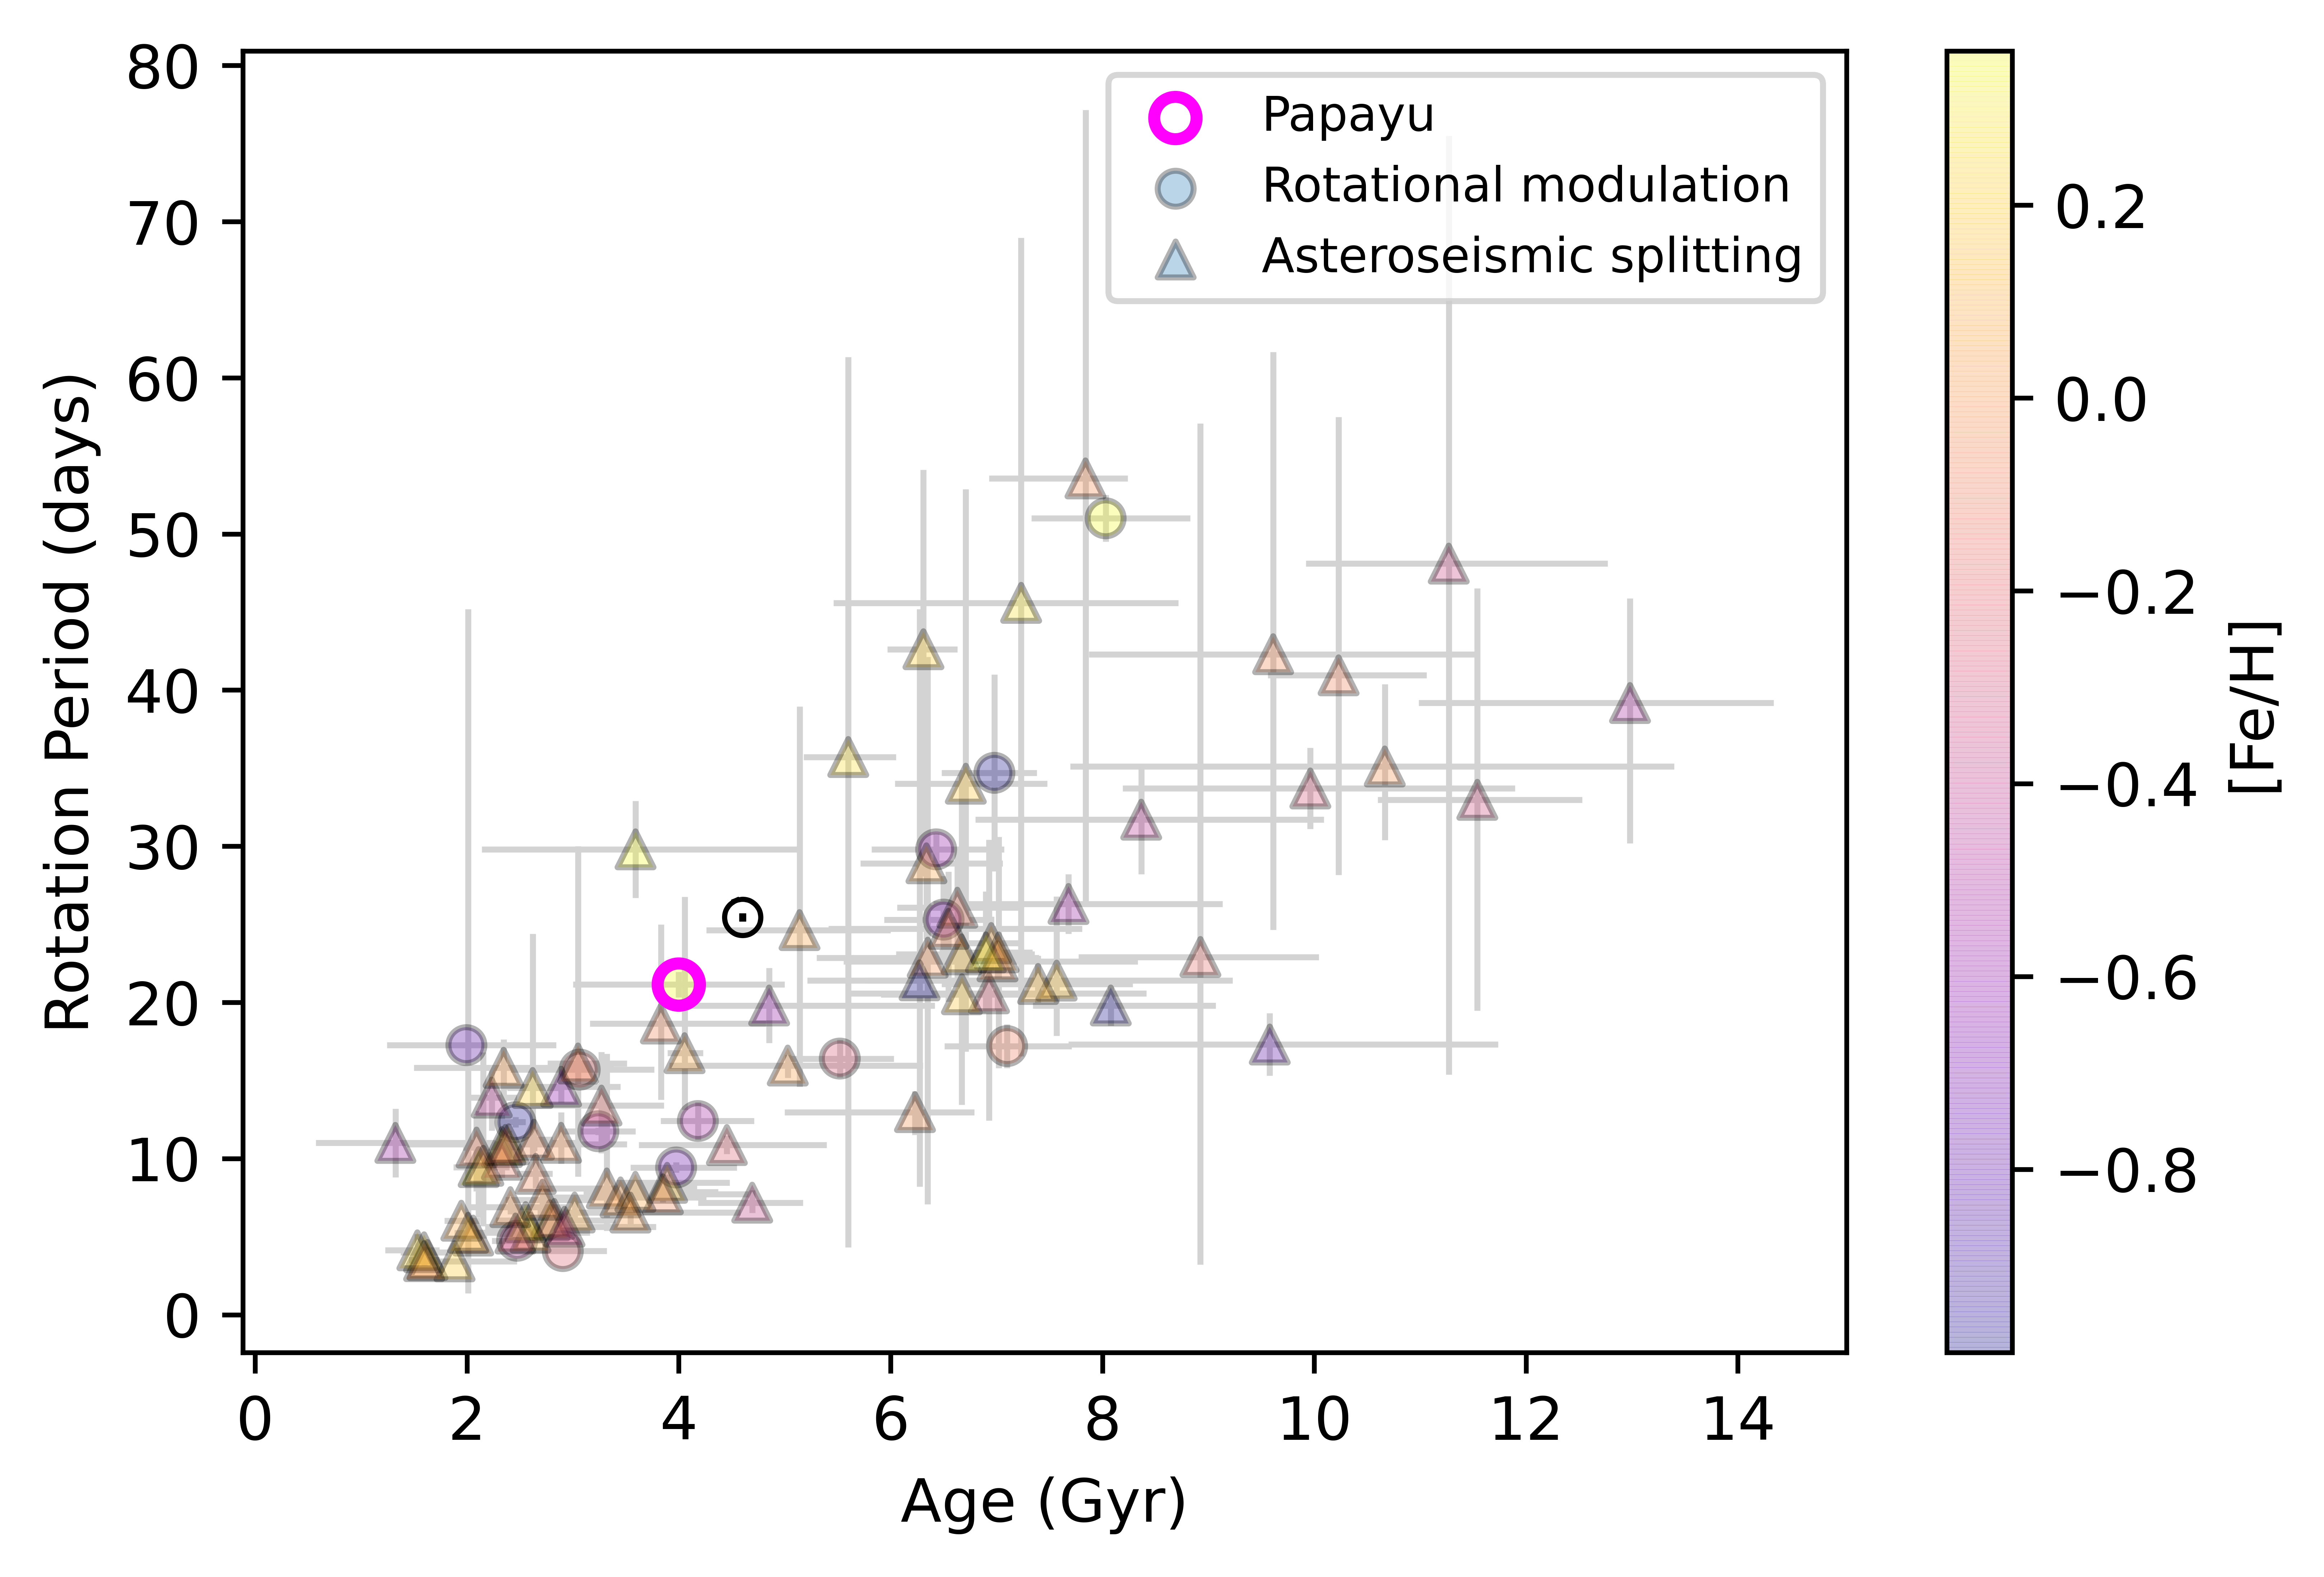

In [22]:
# print(jenseismicag_kicid_OG)
# print(jenkoiag2_kicid_OG)
# print(mcqag_kicid_OG)
# print(oli_kicid_OG)
# print(['16CygA','16CyB',11244118])
# print(len(jenseismicag_kicid_OG)+len(jenkoiag2_kicid_OG)+len(mcqag_prot_OG)+len(oli_prot_OG)+len(jen16cyg_teff))
# solar values 
sun_teff = 5772 #K
sun_dnu = 135 #microHz
sun_age = 4.574 #Gyr
sun_prot = 25.449 # earth days

papayu_age = 4
papayu_mass = 1.2 #Msun
papayu_teff = 5888 #K
papayu_feh = 0.3 # papayu metallicity

## 28 stars total + oli 
jenage_seismic_OG = jenseismic_ag_age_OG
jeneage_seismic_OG = jenseismic_ag_eage_OG
jenEage_seismic_OG = jenseismic_ag_Eage_OG

jenprot_seismic_OG = jenseismic_ag_prot_OG
jeneprot_seismic_OG = jenseismic_ag_eprot_OG

jenfeh_seismic_OG = jenseismic_ag_feh_OG
jenefeh_seismic_OG = jenseismic_ag_efeh_OG

jenteff_seismic_OG = jenseismic_ag_teff_OG
jeneteff_seismic_OG = jenseismic_ag_eteff_OG

jenmass_seismic_OG = jenseismic_ag_mass_OG
#
jenage_koi_OG = jenkoi_ag2_age_OG
jeneage_koi_OG = jenkoi_ag2_eage_OG
jenEage_koi_OG = jenkoi_ag2_Eage_OG

jenprot_koi_OG = jenkoi_ag2_prot_OG
jeneprot_koi_OG = jenkoi_ag2_eprot_OG 

jenfeh_koi_OG = jenkoi_ag2_feh_OG 
jenefeh_koi_OG = jenkoi_ag2_efeh_OG 

jenteff_koi_OG = jenkoi_ag2_teff_OG
jeneteff_koi_OG = jenkoi_ag2_eteff_OG

jenmass_koi_OG = jenkoi_ag2_mass_OG
# 
oliage_OG = oli_age_OG
olieage_OG = oli_eage_OG
oliEage_OG = oli_Eage_OG

oliprot_OG = oli_prot_OG
olieprot_OG = oli_eprot_OG
oliEprot_OG = oli_Eprot_OG

oliteff_OG= oli_teff_OG
olieteff_OG = oli_eteff_OG

olifeh_OG = oli_feh_OG
oliefeh_OG = oli_efeh_OG

#
jenlastage_OG = np.array([6.95, 7.02, 6.9])
jenlasteage_OG = np.array([0.26, 0.14, 0.44])

jenlastprot_OG =  np.array([23.8, 23.2, 23.2])
jenlasteprot_OG= np.array([1.7, 7.4, 3.9])

jenlastteff_OG = np.array([5825, 5750, 5745])
jenlasteteff_OG = np.array([50, 50, 84])

jenlastfeh_OG = np.array([0.09, 0.05, 0.35])
jenlastefeh_OG = np.array([0.02, 0.02, 0.09])

## 
papayu_eage=0.5
papayu_Eage=0.5
##
mcqagp_prot_OG = np.append(mcqag_prot_OG,papayu_prot)
mcqagp_age_OG = np.append(mcqagage_age_OG,papayu_age)
mcqagp_teff_OG = np.append(mcqag_teff_OG,papayu_teff)
mcqagp_feh_OG = np.append(mcqag_feh_OG,papayu_feh)

mcqagp_eage_OG = np.append(mcqagage_eage_OG,papayu_eage)
mcqagp_Eage_OG = np.append(mcqagage_Eage_OG,papayu_Eage)
mcqagp_eprot_OG = np.append(mcqag_eprot_OG,papayu_eprot)

mcqagp_mass_OG = np.append(mcqag_mass_OG,papayu_mass)


#
plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagage_age_OG,mcqag_prot_OG,xerr=[mcqagage_eage_OG,mcqagage_Eage_OG],yerr=mcqag_eprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_age_OG,mcqagp_prot_OG,c=mcqagp_feh_OG,edgecolor='black',marker='o',cmap='plasma',alpha=0.3,label='Rotational modulation')

plt.errorbar(jenage_seismic_OG,jenprot_seismic_OG,xerr=[jeneage_seismic_OG,jenEage_seismic_OG],yerr=jeneprot_seismic_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismic_OG,jenprot_seismic_OG,c=jenfeh_seismic_OG,edgecolor='black',marker='^',cmap='plasma',alpha=0.3,label='Asteroseismic splitting')

plt.errorbar(jenage_koi_OG,jenprot_koi_OG,xerr=[jeneage_koi_OG,jenEage_koi_OG],yerr=jeneprot_koi_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koi_OG,jenprot_koi_OG,c=jenfeh_koi_OG,edgecolor='black',marker='o',cmap='plasma',alpha=0.3)

plt.errorbar(oliage_OG,oliprot_OG,xerr=[olieage_OG,oliEage_OG],yerr=[olieprot_OG,oliEprot_OG],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliage_OG,oliprot_OG,c=olifeh_OG,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)

plt.errorbar(jenlastage_OG,jenlastprot_OG,xerr=jenlasteage_OG,yerr=jenlasteprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenlastage_OG,jenlastprot_OG,c=jenlastfeh_OG,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')

all_feh_OG = np.concatenate((mcqagp_feh_OG,jenfeh_seismic_OG,jenfeh_koi_OG,olifeh_OG,jenlastfeh_OG))
print(np.min(all_feh_OG))
print(np.max(all_feh_OG))
plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_feh_OG),np.max(all_feh_OG))
cbar = plt.colorbar()
cbar.set_label('[Fe/H]')



# <span style='background:yellow'> Load Kiauhoku grids </span>


Age(Gyr)         2.646725e+00
L/Lsun           1.940489e+00
R/Rsun           1.266018e+00
Log Teff(K)      3.780813e+00
Mcz(Msun)        8.820060e-03
Rcz(Rsun)        9.913134e-01
Xcen             3.421708e-01
Itot(cgs)        1.045294e+54
Icz(cgs)         6.187652e+52
Tau(cz)(sec)     6.171312e+05
He Core(Msun)    0.000000e+00
Patm(cgs)        5.126154e+04
Mass(Msun)       1.200000e+00
Prot(days)       1.421926e+01
Icore(cgs)       9.834179e+53
Omega(core)      6.089560e-06
Omega(env)       6.089560e-06
Jtot(cgs)        6.123185e+48
Jcore(cgs)       5.848215e+48
Jenv(cgs)        2.749700e+47
logg             4.312041e+00
logT(cen)        7.256235e+00
logrho(cen)      2.107817e+00
Ycen             6.224530e-01
XC12cen          3.876267e-05
Xsurf            7.083861e-01
Ysurf            2.603416e-01
Z/X(surf)        4.539348e-02
H lum (Lsun)     1.942033e+00
He lum (Lsun)    0.000000e+00
dtype: float64


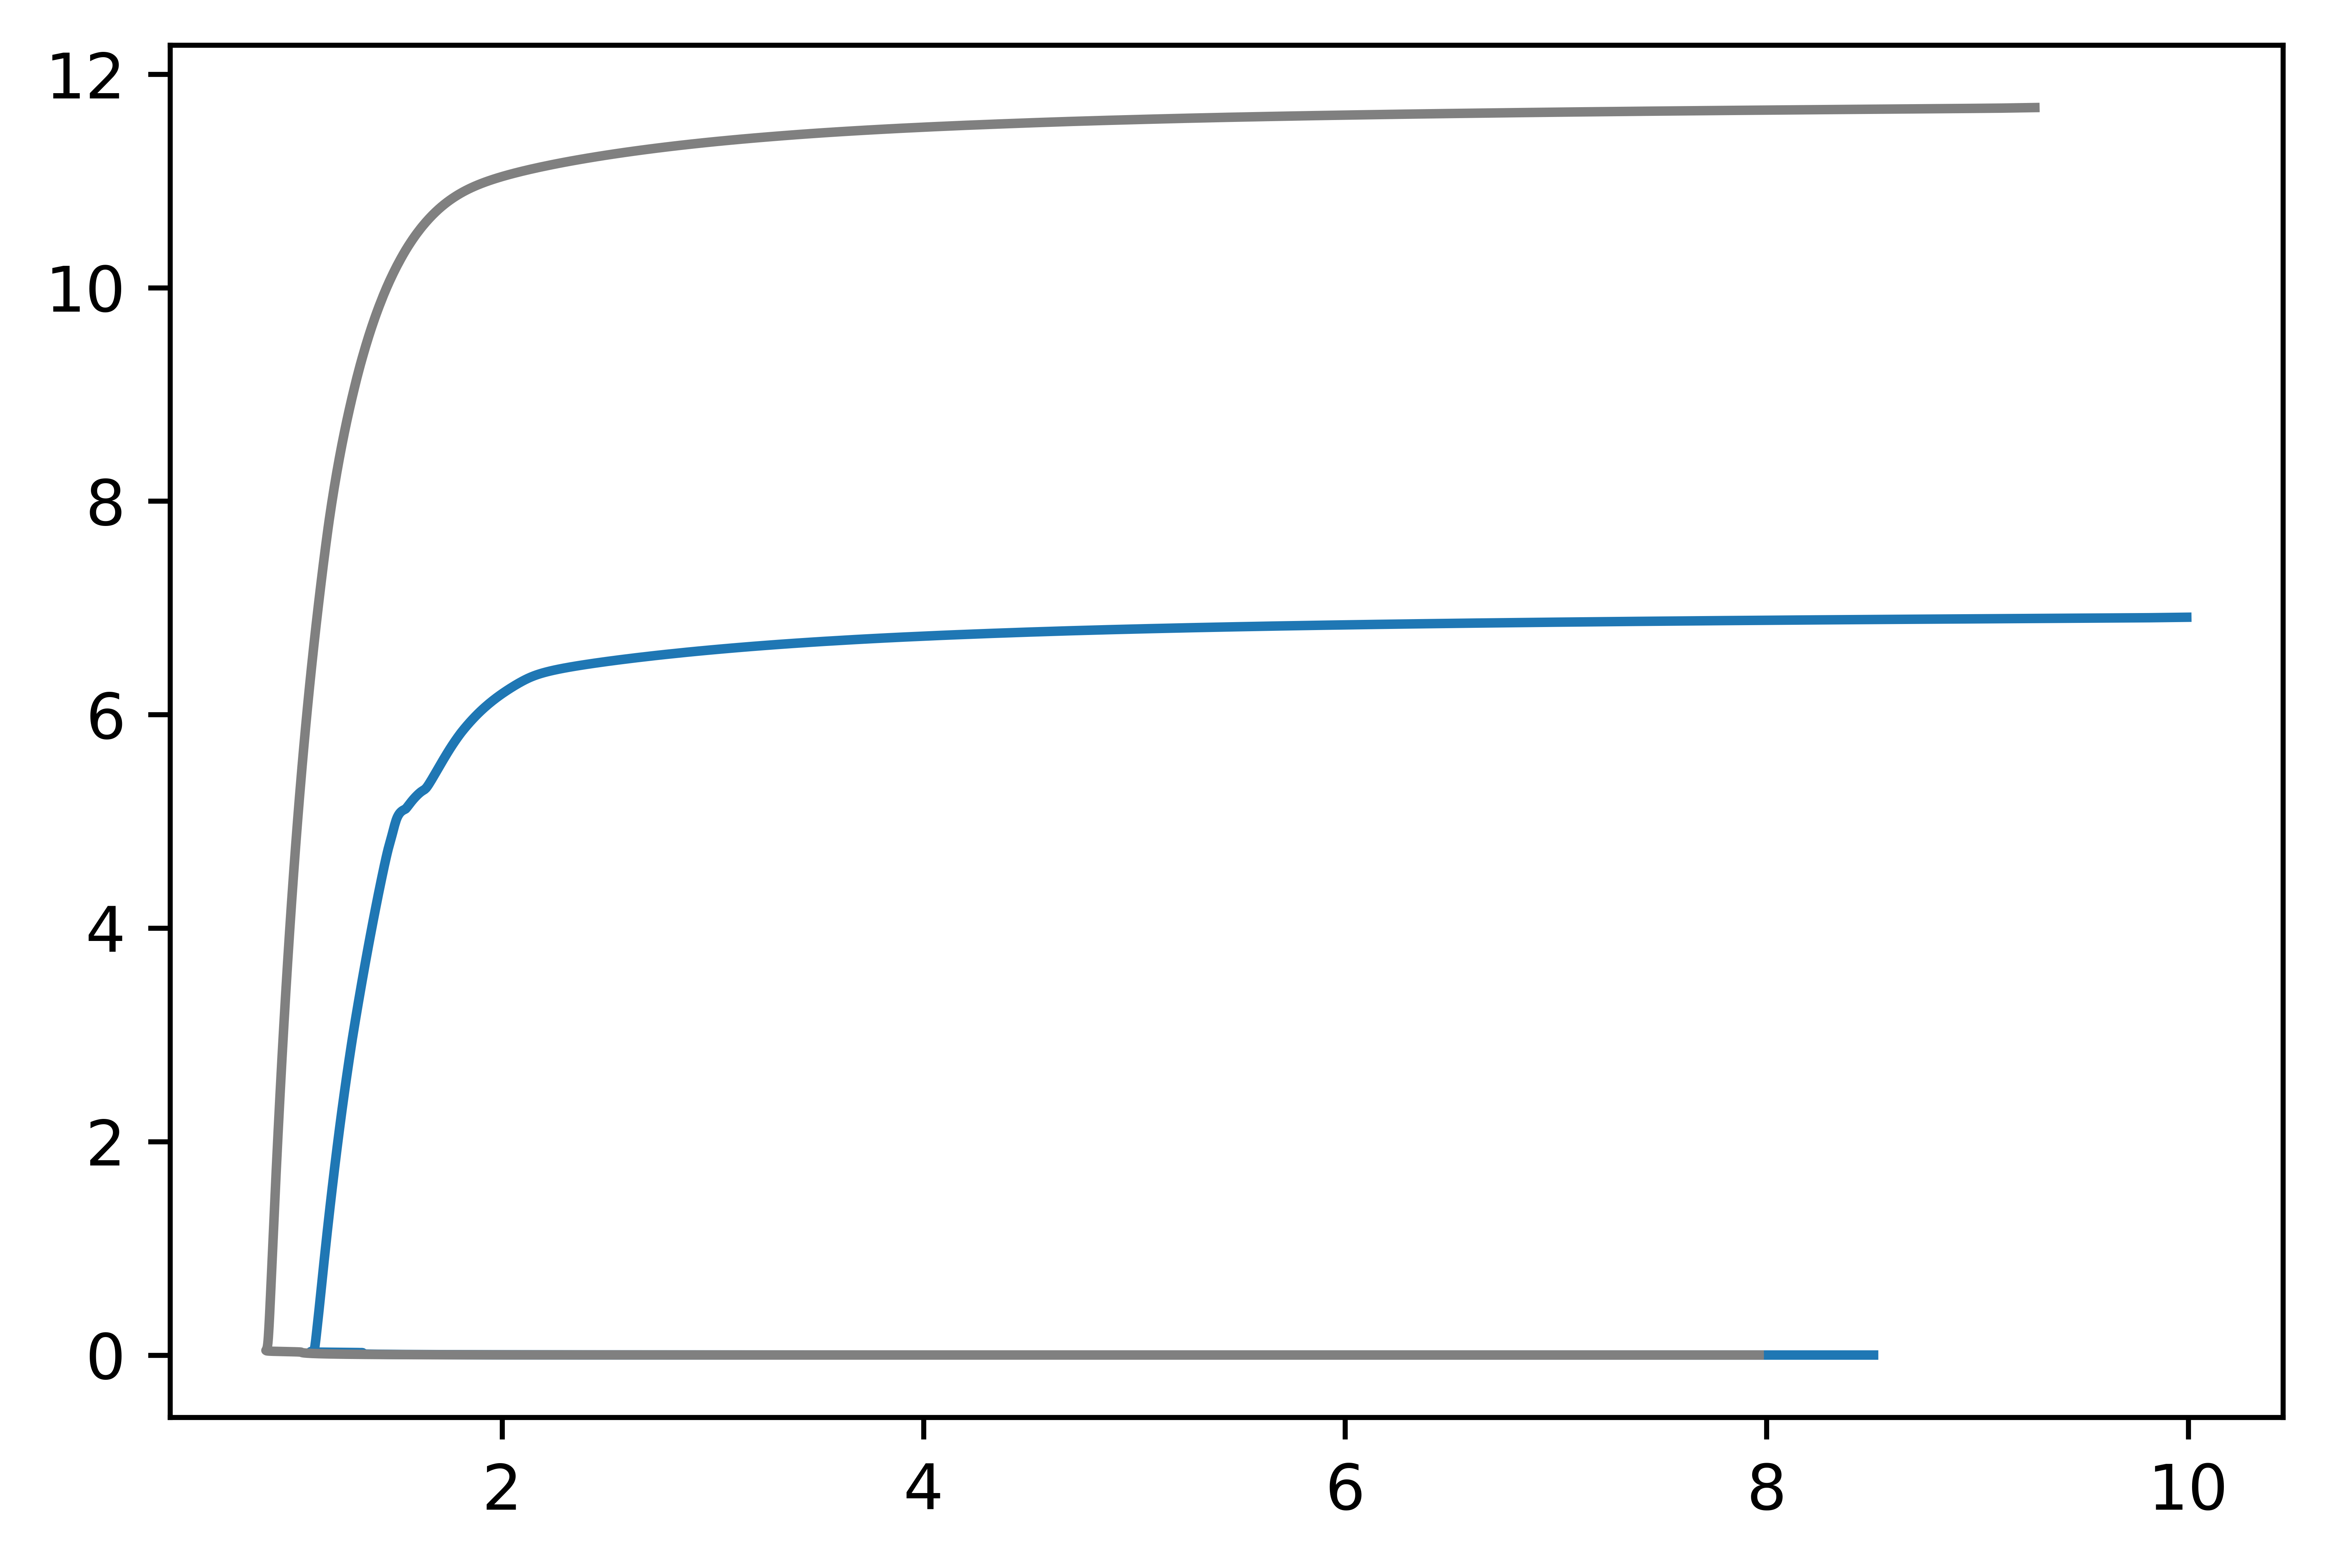

In [23]:
grid_rocrit = kh.load_interpolator('rocrit')
star = grid_rocrit.get_star_eep((1.2, 0.3, 0, 330)) #<<--  eep index is last index  330
print(star)

# track = grid.get_track((1, 0, 0)) #2.0 in mass, and 0.5 in metallicity 
track_rocrit_papayu = grid_rocrit.get_track((1.2, 0.3, 0)) #2.0 in mass, and 0.5 in metallicity 
track_rocrit_sun = grid_rocrit.get_track((1, 0, 0)) #2.0 in mass, and 0.5 in metallicity 

plt.plot('R/Rsun','Age(Gyr)' ,data=track_rocrit_papayu) #track.columns #Prot (days) Age (Gyr)
#plt.gca().invert_xaxis()
plt.plot('R/Rsun','Age(Gyr)' ,data=track_rocrit_sun, c='gray') #track.columns #Prot (days) Age (Gyr)

## HR sun
# plt.scatter()

## HR papayu
## change mass and fix metallicty -- > explain and vice versa.

grid_fastlaunch = kh.load_interpolator('fastlaunch')
# star = grid.get_star_eep((1, 0, 0, 330))

# track = grid.get_track((1, 0, 0)) #2.0 in mass, and 0.5 in metallicity 
track_fastlaunch_sun = grid_fastlaunch.get_track((1, 0, 0)) #2.0 in mass, and 0.5 in metallicity 
#track_fastlaunch = grid_fastlaunch.get_track((1.2, 0, 0)) #2.0 in mass, and 0.5 in metallicity 
#plt.plot('Age(Gyr)','Prot(days)', data=track) #track.columns #Prot (days) Age (Gyr)

track_fastlaunch_papayu= grid_fastlaunch.get_track((1.2, 0.3, 0)) #2.0 in mass, and 0.5 in metallicity 

#plt.gca().invert_xaxis()

track_fastlaunch_blue= grid_fastlaunch.get_track((1.06, -0.2, 0)) #2.0 in mass, and 0.5 in metallicity 
track_rocrit_blue= grid_rocrit.get_track((1.06, -0.2, 0)) #2.0 in mass, and 0.5 in metallicity 



# <span style='background:yellow'> calculate ZAMS temperature for OG sample </span>

In [71]:
## ZAMS temp 

mcqagp_OG_zamsteff = []
jenseismic_OG_zamsteff = []
jenkoi_OG_zamsteff = []
oli_OG_zamsteff =[]
jen_last_OG_zamsteff = []

for i in range(len(mcqagp_mass_OG)):
#     print(i)
    mass = mcqagp_mass_OG[i]
    metallicity = mcqagp_feh_OG[i]
    mcqagp_OG_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    mcqagp_OG_zamsteffi = 10**mcqagp_OG_zamsteff_logi
        
#     print(mcqagp_massteff[i])
#     print(mcqagp_fehteff[i])
#     print(mcqag_zams_teffteffi)
    
    mcqagp_OG_zamsteff.append(mcqagp_OG_zamsteffi)
print("mcqagp_zams_teffteff = ",mcqagp_OG_zamsteff)


for i in range(len(jenmass_seismic_OG)):
    mass = jenmass_seismic_OG[i]
    metallicity = jenfeh_seismic_OG[i]
    jenseismic_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    jenseismic_zamsteffi = 10**jenseismic_zamsteff_logi

    jenseismic_OG_zamsteff.append(jenseismic_zamsteffi)

jenseismic_OG_zamsteff = [6106.175639611684, 5669.755992395128, 5808.538368369729, 6180.801969901707, 5845.2139817250745
, 5367.688216104344, 5198.399525556374, 5894.033666293229, 6052.65120835123, 6222.732225289814, 6041.716963218516]
print('jenseismic_OG_zamsteff',jenseismic_OG_zamsteff)

# # for KIC 7680114
mass7680114 = 1.0586
metallicity7680114 = 0.05
jen_zams_seismicteff7680114 = 10**grid_rocrit.get_star_eep((mass7680114,metallicity7680114,0, 201))['Log Teff(K)']
# print(jen_zams_seismicteff7680114)



#jenmass_koiteff
for i in range(len(jenmass_koi_OG)):
    mass = jenmass_koi_OG[i]
    metallicity = jenfeh_koi_OG[i]
    jenkoi_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    jenkoi_zamsteffi = 10**jenkoi_zamsteff_logi

    jenkoi_OG_zamsteff.append(jenkoi_zamsteffi)
print("jen_zams_koiteff = ",jenkoi_OG_zamsteff)

for i in range(len(oli_mass_OG)):
    mass = oli_mass_OG[i]
    metallicity = oli_feh_OG[i]
    oli_OG_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    oli_OG_zamsteffi = 10**oli_OG_zamsteff_logi

    oli_OG_zamsteff.append(oli_OG_zamsteffi)
print("oli_OG_zamsteff = ",oli_OG_zamsteff)

###zams_teff = grid.get_star_eep((mass, met, alpha, 202))['Log Teff(k)']

jenlastmass_OG = [1.04,0.998,1.13]
jenlastmet_OG = [0.09,0.05,0.35]
for i in range(len(jenlastmass_OG)):
    jen_last_zams_teffi = 10**grid_rocrit.get_star_eep((jenlastmass_OG[i],jenlastmet_OG[i],0, 201))['Log Teff(K)']

    jen_last_OG_zamsteff.append(jen_last_zams_teffi)
print("jen_last_zams_teff",jen_last_OG_zamsteff)


print ('**************************** checking if any masses >= 2 coz kiauhoku cant handle') 
print('oli_mass_OG',oli_mass_OG)
print('jenmass_koi_OG',jenmass_koi_OG)
print('jenmass_seismic_OG',jenmass_seismic_OG)
print('mcqagp_mass_OG',mcqagp_mass_OG)

mcqagp_zams_teffteff =  [6646.211725392296, 6304.697425709561, 6444.554012657044, 6152.442759404046, 5908.11355611817, 7352.819410586128, 6251.760035729665, 5874.478166339687]
jenseismic_OG_zamsteff [6106.175639611684, 5669.755992395128, 5808.538368369729, 6180.801969901707, 5845.2139817250745, 5367.688216104344, 5198.399525556374, 5894.033666293229, 6052.65120835123, 6222.732225289814, 6041.716963218516]
jen_zams_koiteff =  [6270.288500311903, 5543.097614132411, 5574.0171576236635, 5339.757549104436, 6275.176636472069, 5998.354449356757, 6197.882762183458]
oli_OG_zamsteff =  [6222.529450067351, 5543.097614132411, 6031.0470657592305, 5890.27663811142, 6176.708970202177, 5899.66470292662, 5987.569833734233, 6112.58401141018, 5051.407095746837, 6197.882762183458, 6133.746881409406, 6275.176636472069, 6497.35605698037, 6015.625899728846, 6270.288500311903, 6720.9119569767945, 5998.354449356757, 6606.23021583919, 5893.639476669163, 5764.085997721546, 6306.3180067825915, 5924.21146517316, 5

In [25]:
# ## colour by ZAMS 
# # mcqagp_OG_zamsteff
# # jenseismic_OG_zamsteff = []
# # jenkoi_OG_zamsteff = []
# # oli_OG_zamsteff =[]
# # jen_last_OG_zamsteff = []


# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.errorbar(mcqagage_age_OG,mcqag_prot_OG,xerr=[mcqagage_eage_OG,mcqagage_Eage_OG],yerr=mcqag_eprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# # plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
# plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

# plt.scatter(mcqagp_age_OG,mcqagp_prot_OG,c=mcqagp_OG_zamsteff,edgecolor='black',marker='o',cmap='plasma',alpha=0.3,label='Rotational modulation')

# plt.errorbar(jenage_seismic_OG,jenprot_seismic_OG,xerr=[jeneage_seismic_OG,jenEage_seismic_OG],yerr=jeneprot_seismic_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismic_OG,jenprot_seismic_OG,c=jenseismic_OG_zamsteff,edgecolor='black',marker='^',cmap='plasma',alpha=0.3,label='Asteroseismic splitting')

# plt.errorbar(jenage_koi_OG,jenprot_koi_OG,xerr=[jeneage_koi_OG,jenEage_koi_OG],yerr=jeneprot_koi_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koi_OG,jenprot_koi_OG,c=jenkoi_OG_zamsteff,edgecolor='black',marker='o',cmap='plasma',alpha=0.3)

# plt.errorbar(oliage_OG,oliprot_OG,xerr=[olieage_OG,oliEage_OG],yerr=[olieprot_OG,oliEprot_OG],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(oliage_OG,oliprot_OG,c=oli_OG_zamsteff,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)

# plt.errorbar(jenlastage_OG,jenlastprot_OG,xerr=jenlasteage_OG,yerr=jenlasteprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenlastage_OG,jenlastprot_OG,c=jen_last_OG_zamsteff,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)

# plt.xlabel('Age (Gyr)')
# plt.ylabel('Rotation Period (days)')

# all_zamsteff_OG = np.concatenate((mcqagp_OG_zamsteff,jenseismic_OG_zamsteff,jenkoi_OG_zamsteff,oli_OG_zamsteff,jen_last_OG_zamsteff))
# print(np.min(all_zamsteff_OG))
# print(np.max(all_zamsteff_OG))
# plt.legend(loc="best",fontsize=8)
# plt.clim(np.min(all_zamsteff_OG),np.max(all_zamsteff_OG))
# cbar = plt.colorbar()
# cbar.set_label('ZAMS Temperature')

# <span style='background:yellow'> ARRAYS FILTERED - not allowing error in P_rot > 10% </span>

In [26]:
# mcqag_kicid = np.array([7103006,7206837,7771282,7871531,8379927,9098294,10079226,10162436,10454113,12009504])
# need to remove # [ 7871531  9098294 10454113] coz its included in jen's sample

mcqag_kicid = np.array([7103006,7206837,7771282,8379927,10079226,10162436,12009504])


# logg and teff at mcqag ? 
mcqag_teff =[]
mcqag_eteff =[]

mcqag_dnu =[]
mcqag_numax =[]

mcqag_prot=[]
mcqag_eprot=[]

mcqagage_age=[]
mcqagage_Eage=[]
mcqagage_eage=[]

mcqag_mass=[]
mcqag_Emass=[]
mcqag_emass=[]

mcqag_feh=[]
mcqag_efeh=[]

mcqag_rad = []
mcqag_Erad = []
mcqag_erad = []
    
mcqag_logg = []
mcqag_Elogg = []
mcqag_elogg = []
    
mcqag_lum = []
mcqag_Elum = []
mcqag_elum = []

for kicid in mcqag_kicid:
    
    mcqproti = mcq[np.where(mcq_kicid==kicid),4][0][0]
    mcqeproti = mcq[np.where(mcq_kicid==kicid),5][0][0] #days.. #err
    
#     agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
#     agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
#     agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]
    
    if mcqeproti>.1*mcqproti: ### that don't converge
        continue
#     if agageEagei>.15*agageagei: ### that don't converge
#         continue
#     if agageeagei>.15*agageagei: ### that don't converge
#         continue
    
    mcqproti = mcq[np.where(mcq_kicid==kicid),4][0][0] #days
    mcqeproti = mcq[np.where(mcq_kicid==kicid),5][0][0] #days.. #err
    
    # Teff, FeH, mass, radius, Age, logg, dnu all from Aguirre
    agnumaxi = aguirre[np.where(ag_kicid==kicid),1][0][0]
    agEnumaxi = aguirre[np.where(ag_kicid==kicid),2][0][0]
    agenumaxi = aguirre[np.where(ag_kicid==kicid),3][0][0]

    agdnui = aguirre[np.where(ag_kicid==kicid),4][0][0]
    agEdnui = aguirre[np.where(ag_kicid==kicid),5][0][0]
    agednui = aguirre[np.where(ag_kicid==kicid),6][0][0]

    agteffi = aguirre[np.where(ag_kicid==kicid),7][0][0]
    ageteffi = aguirre[np.where(ag_kicid==kicid),8][0][0]

    agfehi = aguirre[np.where(ag_kicid==kicid),9][0][0]
    agefehi = aguirre[np.where(ag_kicid==kicid),10][0][0]

    ag_massi = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    ag_Emassi = aguirreages[np.where(agage_kicid==kicid),2][0][0] #+ve 
    ag_emassi = aguirreages[np.where(agage_kicid==kicid),3][0][0]

    ag_radi = aguirreages[np.where(agage_kicid==kicid),4][0][0]
    ag_Eradi = aguirreages[np.where(agage_kicid==kicid),5][0][0]
    ag_eradi = aguirreages[np.where(agage_kicid==kicid),6][0][0]

    ag_loggi = aguirreages[np.where(agage_kicid==kicid),7][0][0]
    ag_Eloggi = aguirreages[np.where(agage_kicid==kicid),8][0][0]
    ag_eloggi = aguirreages[np.where(agage_kicid==kicid),9][0][0]

    agage_agei = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agage_Eagei = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agage_eagei = aguirreages[np.where(agage_kicid==kicid),12][0][0]

    ag_lumi = aguirreages[np.where(agage_kicid==kicid),13][0][0]
    ag_Elumi = aguirreages[np.where(agage_kicid==kicid),14][0][0]
    ag_elumi = aguirreages[np.where(agage_kicid==kicid),15][0][0]

    #### append 
        
    mcqag_prot.append(mcqproti)
    mcqag_eprot.append(mcqeproti)
    
    mcqag_dnu.append(agdnui)
    mcqag_numax.append(agnumaxi)
    
    mcqag_teff.append(agteffi)
    mcqag_eteff.append(ageteffi)
    
    mcqag_feh.append(agfehi)
    mcqag_efeh.append(agefehi)
    
    mcqag_mass.append(ag_massi)
    mcqag_Emass.append(ag_Emassi)
    mcqag_emass.append(ag_emassi)
    
    mcqag_rad.append(ag_radi)
    mcqag_Erad.append(ag_Eradi)
    mcqag_erad.append(ag_eradi)
    
    mcqag_logg.append(ag_loggi)
    mcqag_Elogg.append(ag_Eloggi)
    mcqag_elogg.append(ag_eloggi)

    mcqagage_age.append(agage_agei)
    mcqagage_Eage.append(agage_Eagei)
    mcqagage_eage.append(agage_eagei)
    
    mcqag_lum.append(ag_lumi)
    mcqag_Elum.append(ag_Elumi)
    mcqag_elum.append(ag_elumi)


In [27]:
agag2_kicid = np.array([3632418,9414417,9955598,10963065])

agag2_age_ag=[]
agag2_Eage_ag=[]
agag2_eage_ag=[]

agag2_age_ag2=[]
agag2_Eage_ag2=[]
agag2_eage_ag2=[]

for kicid in agag2_kicid:
    
    # aguirre ages 
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]
    
    agagekicidi = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),12][0][0]

    
    #### aguirre2 ages 
    row_agage2 = aguirre2[np.where(ag2full_kicid==kicid),:]
    
#     print(row_agage)
#     print(row_agage2)
    
    agagekicidi2 = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

    agageagei2 = aguirre2[np.where(ag2full_kicid==kicid),20][0][0]
    agageEagei2 = aguirre2[np.where(ag2full_kicid==kicid),21][0][0]
    agageeagei2 = aguirre2[np.where(ag2full_kicid==kicid),22][0][0]
    
    #     ag2_feh = aguirre2[:,3]
#     ag2_efeh = aguirre2[:,4]

#     ag2_mass = aguirre2[:,5]
#     ag2_Emass = aguirre2[:,6] #+ve 
#     ag2_emass = aguirre2[:,7]

#     ag2_rad = aguirre2[:,8]
#     ag2_Erad = aguirre2[:,9]
#     ag2_erad = aguirre2[:,10]

#     ag2_logg = aguirre2[:,14]
#     ag2_Elogg = aguirre2[:,15]
#     ag2_elogg = aguirre2[:,16]
    
#     ag2_lum = aguirre2[:,17]
#     ag2_Elum = aguirre2[:,18]
#     ag2_elum = aguirre2[:,19]

#     ag2full_age = aguirre2[:,20]
#     ag2full_Eage = aguirre2[:,21]
#     ag2full_eage = aguirre2[:,22]
    
    agag2_age_ag.append(agageagei)
    agag2_Eage_ag.append(agageEagei)
    agag2_eage_ag.append(agageeagei)
    agag2_age_ag2.append(agageagei2)
    agag2_Eage_ag2.append(agageEagei2)
    agag2_eage_ag2.append(agageeagei2)

print("kicid",agag2_kicid)

print("ag_age",agag2_age_ag)
print("+",agag2_Eage_ag)
print("-",agag2_eage_ag)

print("ag2_age",agag2_age_ag2)
print("+",agag2_Eage_ag2)
print("-",agag2_eage_ag2)

print("conclusion -- use aguirre ages ")

kicid [ 3632418  9414417  9955598 10963065]
ag_age [2.6331, 2.6491, 6.2902, 7.1526]
+ [0.1757, 0.1597, 1.9483, 1.9164]
- [0.1757, 0.1757, 1.8365, 1.613]
ag2_age [2.6, 2.65, 6.98, 4.18]
+ [0.16, 0.14, 0.4, 0.53]
- [0.16, 0.16, 0.5, 0.35]
conclusion -- use aguirre ages 


In [28]:
jenkoiag_kicid = np.array([9955598,10963065]) ## remove these 2 from the next array
# jenkoiag2_kicid = np.array([6196457,6521045,8349582,10586004,11401755]) ## this is all of the koisS
jenkoiag2_kicid = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755]) ## this is all of the koisS
jen_kicidx= np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])
# print(jen_kicidx)
# jen_kicids = np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])

print("jenkoiag2_kicid",jenkoiag2_kicid)

# print("jen_kicid",jen_kicid)
# print("jen_prot",jen_prot)

# Since aguirre ages are more precise
jenkoi_ag_age =[]
jenkoi_ag_Eage =[]
jenkoi_ag_eage =[]

jenkoi_ag2_age =[]
jenkoi_ag2_Eage =[]
jenkoi_ag2_eage =[]

jenkoi_ag2_feh =[]
jenkoi_ag2_efeh =[]
jenkoi_ag2_teff=[]
jenkoi_ag2_eteff=[]
jenkoi_ag2_prot=[]
jenkoi_ag2_eprot=[]

jenkoi_ag2_mass=[]

for kicid in jenkoiag2_kicid:
#     print(kicid)
    #### aguirre2 ages 
    jen_prot_koii = jen[np.where(jen_kicidx==kicid),16][0][0] 
    jen_eprot_koii = jen[np.where(jen_kicidx==kicid),17][0][0]#days ... err prot
    
#     agageagei2 = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
#     agageEagei2 = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
#     agageeagei2 = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]
    
    
    if jen_eprot_koii>.1*jen_prot_koii: ### that don't converge
        continue
    
#     if agageEagei2>.15*agageagei2: ### that don't converge
#         continue
        
#     if agageeagei2>.15*agageagei2: ### that don't converge
#         continue
        
    row_agage2 = aguirre2[np.where(ag2full_kicid==kicid),:]
        
    agagekicidi2 = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

    agageagei2 = aguirre2[np.where(ag2full_kicid==kicid),20][0][0]
    agageEagei2 = aguirre2[np.where(ag2full_kicid==kicid),21][0][0]
    agageeagei2 = aguirre2[np.where(ag2full_kicid==kicid),22][0][0]
    
    jen_teff_koii = aguirre2[np.where(jen_kicidx_OG==kicid),1][0][0] #teff
    jen_eteff_koii = aguirre2[np.where(jen_kicidx_OG==kicid),2][0][0] #eteff

    jen_feh_koii = aguirre2[np.where(jen_kicidx_OG==kicid),3][0][0] #feh
    jen_efeh_koii = aguirre2[np.where(jen_kicidx_OG==kicid),4][0][0] 

    jen_prot_koii = jen[np.where(jen_kicidx_OG==kicid),16][0][0] 
    jen_eprot_koii = jen[np.where(jen_kicidx_OG==kicid),17][0][0]#days ... err prot
    
    jen_mass_koii = aguirre2[np.where(jen_kicidx_OG==kicid),5][0][0]
    

    
    jenkoi_ag2_age.append(agageagei2)
    jenkoi_ag2_Eage.append(agageEagei2)
    jenkoi_ag2_eage.append(agageeagei2)
    
    jenkoi_ag2_feh.append(jen_feh_koii)
    jenkoi_ag2_efeh.append(jen_efeh_koii)
    
    jenkoi_ag2_teff.append(jen_teff_koii)
    jenkoi_ag2_eteff.append(jen_eteff_koii)

    jenkoi_ag2_prot.append(jen_prot_koii)
    jenkoi_ag2_eprot.append(jen_eprot_koii)
    
    jenkoi_ag2_mass.append(jen_mass_koii)
    

print("jenag2_age",jenkoi_ag2_age)
print("+",jenkoi_ag2_Eage)
print("-",jenkoi_ag2_eage)

print("jen_prot = ",jenkoi_ag2_prot)
print("+/-",jenkoi_ag2_eprot)

# print("jenag2_prot",jenkoi_ag2_prot)
# print("+/-",jenkoi_ag2_eprot)

# ## ## ## ## ## ## 
for kicid in jenkoiag_kicid:
#     print(kicid)
    # aguirre ages 
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]
    print(row_agage)
    agagekicidi = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),12][0][0]
    
    
    jenkoi_ag_age.append(agageagei)
    jenkoi_ag_Eage.append(agageEagei)
    jenkoi_ag_eage.append(agageeagei)

print("ag_age",jenkoi_ag_age)
print("+",jenkoi_ag_Eage)
print("-",jenkoi_ag_eage)

# jenkoi_age = np.concatenate([])
# jenkoi_Eage = []
# jenkoi_eage = []

# note huge diff for age of 10586004

jenkoiag2_kicid [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]
jenag2_age [5.52, 8.03, 6.43, 4.18, 7.1]
+ [0.51, 0.8, 0.64, 0.53, 0.61]
- [0.48, 0.7, 0.61, 0.35, 0.59]
jen_prot =  [16.4, 51.0, 29.8, 12.4, 17.2]
+/- [1.2, 1.5, 1.0, 1.2, 1.4]
[[[9.955598e+06 8.990000e-01 3.990000e-02 3.040000e-02 8.857000e-01
   1.200000e-02 1.200000e-02 4.496800e+00 5.500000e-03 6.600000e-03
   6.290200e+00 1.948300e+00 1.836500e+00 6.180000e-01 4.700000e-02
   4.000000e-02 1.820967e+00 2.621100e-02 2.682400e-02 6.663000e+01
   2.190000e+00 2.190000e+00 6.980000e-01 1.100000e-02 6.000000e-03
   2.800000e-01 4.000000e-03 6.000000e-03 7.320000e-01 1.400000e-02
   1.500000e-02 2.500000e-01 1.200000e-02 1.100000e-02 3.550000e-01
   6.900000e-02 6.400000e-02 6.240000e-01 6.300000e-02 7.300000e-02
   0.000000e+00 0.000000e+00 0.000000e+00 6.880000e-01 9.000000e-03
   8.000000e-03 1.791000e+00 1.402820e+01]]]
[[[1.0963065e+07 9.8830000e-01 6.0800000e-02 6.0800000e-02 1.1946000e+00
   2.100000

In [29]:
jenseismicag_kicid = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,10454113,10644253])
jen_kicidx= np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])
# print(jen_kicidx)
# jen_kicids = np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])

print("jenseismicag_kicid",jenseismicag_kicid)

# print("jen_kicid",jen_kicid)
# print("jen_prot",jen_prot)

# Since aguirre ages are more precise
jenseismic_ag_age =[]
jenseismic_ag_Eage =[]
jenseismic_ag_eage =[]

jenseismic_ag_feh =[]
jenseismic_ag_efeh =[]
jenseismic_ag_teff=[]
jenseismic_ag_eteff=[]
jenseismic_ag_prot=[]
jenseismic_ag_eprot=[]
jenseismic_ag_mass=[]


for kicid in jenseismicag_kicid:
#     print(kicid)
 #     # aguirre ages 
    jen_prot_seismici = jen[np.where(jen_kicidx==kicid),16][0][0] 
    jen_eprot_seismici = jen[np.where(jen_kicidx==kicid),17][0][0]#days ... err prot
    
#     agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
#     agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
#     agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]

    
    if jen_eprot_seismici>.1*jen_prot_seismici: ### that don't converge
        continue
#     if agageEagei>.15*agageagei: ### that don't converge
#         continue
#     if agageeagei>.15*agageagei: ### that don't converge
#         continue
    
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]

    agageagei = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),12][0][0]


#         ##### jen roation periods
#     jenprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),16][0][0] #days ... rotation period
#     jeneprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),17][0][0] #days ... err prot
#     jen_notei = jen[np.where(jen_kicids.astype('float64')==kicid),18][0][0]
#     print(jenprot_maj)

    row_jen_seismici_OG = jen[np.where(jen_kicidx==kicid),:][0][0]
    jen_kicid_seismici_OG = jen[np.where(jen_kicidx==kicid),0][0][0]
    

    jen_teff_seismici = aguirre[np.where(jen_kicidx_OG==kicid),7][0][0] #teff
    jen_eteff_seismici = aguirre[np.where(jen_kicidx_OG==kicid),8][0][0] #eteff

    jen_feh_seismici = aguirre[np.where(jen_kicidx_OG==kicid),9][0][0] #feh
    jen_efeh_seismici = aguirre[np.where(jen_kicidx_OG==kicid),10][0][0] 

    jen_prot_seismici = jen[np.where(jen_kicidx_OG==kicid),16][0][0] 
    jen_eprot_seismici = jen[np.where(jen_kicidx_OG==kicid),17][0][0]#days ... err prot
    
    jen_mass_seismici = aguirreages[np.where(jen_kicidx_OG==kicid),1][0][0]
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jenseismic_ag_age.append(agageagei)
    jenseismic_ag_Eage.append(agageEagei)
    jenseismic_ag_eage.append(agageeagei)
    
    jenseismic_ag_feh.append(jen_feh_seismici)
    jenseismic_ag_efeh.append(jen_efeh_seismici)
    
    jenseismic_ag_teff.append(jen_teff_seismici)
    jenseismic_ag_eteff.append(jen_eteff_seismici)

    jenseismic_ag_prot.append(jen_prot_seismici)
    jenseismic_ag_eprot.append(jen_eprot_seismici)
    
    jenseismic_ag_mass.append(jen_mass_seismici)

    
print(jenseismic_ag_eteff)
# print("jenag2_age",jenseismic_ag_age)
# print("+",jenseismic_ag_Eage)
# print("-",jenseismic_ag_eage)

# print("jen_prot = ",jenseismic_ag_prot)
# print("+/-",jenseismic_ag_eprot)

jenseismicag_kicid [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
  9139151 10454113 10644253]
[77.0, 77.0, 77.0, 76.0, 77.0]


In [30]:
# # # 
# print("jen16cyg_age",jen16cyg_age)
# print("+/-",jen16cyg_eage)

# print("jen_prot = ",jen16cyg_prot)
# print("+/-",jen16cyg_eprot)
# #

# # jenlast_age =[]
# # jenlast_eage = []

# # jenlast_feh=[]
# # jenlast_efeh=[]
    
# # jenlast_teff=[]
# # jenlast_eteff=[]

# # jenlast_prot=[]
# # jenlast_eprot=[]


# jen_last = [11244118]
# # jen_initkic = np.array(['16CygA','16CygB','3427720','3656476','5184732','6116048','6196457','6521045','7680114','7871531','8006161','8349582','9098294','9139151','9955598','10454113','10586004','10644253','10963065','11244118','11401755'])
# jen_initkic = jen_kicid
# print(jen_initkic)

# for kicid in jen_last:
    
# #     jen_age_lasti = jen[np.where(jen_initkic==kicid),9][0][0]  #basta
# #     jen_eage_lasti = jen[np.where(jen_initkic==kicid),10][0][0] #e_basta
# #     print(jen_age_lasti)
# #     print(jen_eage_lasti)
    
#     jen_prot_lasti = jen[np.where(jen_initkic==kicid),16][0][0] 
#     jen_eprot_lasti = jen[np.where(jen_initkic==kicid),17][0][0]#days ... err prot
# #     print(jen_prot_lasti)
# #     print(jen_eprot_lasti)    

#     if jen_eprot_lasti>.1*jen_prot_lasti: ### that don't converge
#         continue
# #     if jen_eage_lasti>.15*jen_age_lasti: ### that don't converge
# #         continue
        
#     row_jen = jen[np.where(jen_initkic==kicid),:][0][0]
# #     print(row_jen)
#     jen_kicid_lasti = jen[np.where(jen_initkic==kicid),0][0][0]

#     jen_teff_lasti = jen[np.where(jen_initkic==kicid),12][0][0] #teff
    
#     jen_eteff_lasti = jen[np.where(jen_initkic==kicid),13][0][0] #eteff

#     jen_feh_lasti = jen[np.where(jen_initkic==kicid),14][0][0] #feh
#     jen_efeh_lasti = jen[np.where(jen_initkic==kicid),15][0][0] 
#     jen_age_lasti = jen[np.where(jen_initkic==kicid),9][0][0]  #basta
#     jen_eage_lasti = jen[np.where(jen_initkic==kicid),10][0][0] #e_basta

#     jen_prot_lasti = jen[np.where(jen_initkic==kicid),16][0][0] 
#     jen_eprot_lasti = jen[np.where(jen_initkic==kicid),17][0][0]#days ... err prot

#     jen_mass_lasti = jen[np.where(jen_initkic==kicid),7][0][0]

    
# #     print(jen_kicid_koii)
# #     print(jen_age_koii)
    
#     jen16cyg_age.append(jen_age_lasti)
#     jen16cyg_eage.append(jen_eage_lasti)
    
#     jen16cyg_feh.append(jen_feh_lasti)
#     jen16cyg_efeh.append(jen_efeh_lasti)
    
#     jen16cyg_teff.append(jen_teff_lasti)
#     jen16cyg_eteff.append(jen_eteff_lasti)

#     jen16cyg_prot.append(jen_prot_lasti)
#     jen16cyg_eprot.append(jen_eprot_lasti)
#     jen16cyg_mass.append(jen_mass_lasti)

# print("jenlast_age",jen16cyg_age)
# print("+/-",jen16cyg_eage)

# print("jenlast_prot = ",jen16cyg_prot)
# print("+/-",jen16cyg_eprot)

# print("jen16cyg_teff",jen16cyg_teff)
# print(jen16cyg_eteff)

# print("jen16cyg_feh",jen16cyg_feh)
# print(jen16cyg_efeh)

# print("jen16cyg_mass",jen16cyg_mass)

# ######## OUPUTS 
# # jen16cyg_age [6.95, 7.02]
# # +/- [0.26, 0.14]
# # jen_prot =  [23.8, 23.2]
# # +/- [1.7, 7.4]
# # [3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
# #  8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
# #  11244118 11401755]
# # [11244118 1.1 0.05 6.43 0.58 4.077 6023 1.13 0.02 6.9 0.44 5677 5745 84
# #  0.35 0.09 23.2 3.9 'seismic']
# # jenlast_age [6.95, 7.02, 6.9]
# # +/- [0.26, 0.14, 0.44]
# # jenlast_prot =  [23.8, 23.2, 23.2]
# # +/- [1.7, 7.4, 3.9]
# # jen16cyg_teff [5825, 5750, 5745]
# # [50, 50, 84]
# # jen16cyg_feh [0.09, 0.05, 0.35]
# # [0.02, 0.02, 0.09]

jenlastprot = 23.8
jenlasteprot = 1.7

jenlastage = 6.95
jenlasteage = 0.26

jenlastfeh = 0.09
jenlastefeh = 0.02



In [31]:
# oli_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])
# print(len(oli_kicid))
### oli X jen 
# [ 6196457  6521045  8349582 10586004 11401755]
# all koi's 
# remove oli X jen l8r 
### remove as per oli's suggesstion
# ati = ati[ati.eye_flag != 3]
# ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
# ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
# ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
# drop 8478994

ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,8077137,8292840,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151])
ollieag_kicid = np.array([1435467,2837475,3456181,3632418,3735871,4914923,5773345,5950854,6106415,6225718,6508366,6679371,6933899,7106245,7296438,7510397,7940546,7970740,8150065,8179536,8228742,8394589,8424992,8694723,9025370,9139163,9206432,9353712,9410862,9414417,9812850,9965715,10068307,10516096,10730618,11081729,11253226,11772920,12069127,12069424,12069449,12258514,12317678])
# ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,8077137,8292840,8478994,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151]).astype(int)
#ollieag_kicid = np.array([1435467,2837475,3456181,3632418,3735871,4914923,5773345,5950854,6106415,6225718,6508366,6603624,6679371,6933899,7106245,7296438,7510397,7940546,7970740,8150065,8179536,8228742,8394589,8424992,8694723,8760414,8938364,9025370,9139163,9206432,9353712,9410862,9414417,9812850,9965715,10068307,10516096,10730618,11081729,11253226,11772920,12069127,12069424,12069449,12258514,12317678])
oli_kicid = np.concatenate((ollieag2_kicid,ollieag_kicid))

print('len(ollie_kicid)',len(ollie_kicid))
#print(len(ollie_kicid_OG))

# print(ollieag2_kicid)
# print(ollieag_kicid)
# print(oli_kicid)

oli_age =[]
oli_Eage =[]
oli_eage =[]

oli_feh =[]
oli_efeh =[]
oli_teff=[]
oli_eteff=[]
oli_prot=[]
oli_eprot=[]
oli_Eprot=[]

oli_mass=[]


for kicid in oli_kicid:
# #     print(kicid)
#  #     # aguirre ages 
#     row_olag2 = aguirre2[np.where(ag2full_kicid==kicid),:]
# #     print(row_olag2)
    
# #     ollie_ag2_kicidi = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

#     ollie_ag2_agei = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
#     ollie_ag2_Eagei = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
#     ollie_ag2_eagei = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]
    
    ollie_proti = ollie[np.where(ollie_kicid==kicid),55][0][0] #days ... rotation period
    ollie_eproti = ollie[np.where(ollie_kicid==kicid),54][0][0] #days ... err prot
    ollie_Eproti = ollie[np.where(ollie_kicid==kicid),56][0][0] #days ... err prot
    neffsplit_olliei = ollie[np.where(ollie_kicid==kicid),28][0][0]
    rhat_flag_olliei = ollie[np.where(ollie_kicid==kicid),60][0][0]
    
    if neffsplit_olliei<1000: ### ditch the not great ones
        continue
    if rhat_flag_olliei=='rhat_1': ### that don't converge
        continue
#     ollie_agei = ollie[np.where(ollie_kicid==kicid),3][0][0] #basta
#     ollie_Eagei = ollie[np.where(ollie_kicid==kicid),19][0][0] # E -< pos unc
#     ollie_eagei = ollie[np.where(ollie_kicid==kicid),10][0][0] #e -< neg unc

#         ##### ollie age and roation periods
    if ollie_eproti>.1*ollie_proti: ### that don't converge
        continue
    if ollie_Eproti>.1*ollie_proti: ### that don't converge
        continue
#     if ollie_eagei>.1*ollie_agei: ### that don't converge
#         continue
#     if ollie_Eagei>.1*ollie_agei: ### that don't converge
#         continue
        
    row_olliei = ollie[np.where(ollie_kicid==kicid),:][0][0]
    
    ollie_kicidi = ollie[np.where(ollie_kicid==kicid),1][0][0]

    ollie_teffi = ollie[np.where(ollie_kicid==kicid),2][0][0] #teff
    ollie_eteffi = ollie[np.where(ollie_kicid==kicid),5][0][0] #eteff

    ollie_fehi = ollie[np.where(ollie_kicid==kicid),9][0][0] #feh
    ollie_efehi = ollie[np.where(ollie_kicid==kicid),7][0][0] #feh

    ollie_agei = ollie[np.where(ollie_kicid==kicid),3][0][0] #basta
    ollie_Eagei = ollie[np.where(ollie_kicid==kicid),19][0][0] # E -< pos unc
    ollie_eagei = ollie[np.where(ollie_kicid==kicid),10][0][0] #e -< neg unc

    ollie_dnui = ollie[np.where(ollie_kicid==kicid),4][0][0] #basta
    ollie_ednui = ollie[np.where(ollie_kicid==kicid),6][0][0] #basta


    ollie_proti = ollie[np.where(ollie_kicid==kicid),55][0][0] #days ... rotation period
    ollie_eproti = ollie[np.where(ollie_kicid==kicid),54][0][0] #days ... err prot
    ollie_Eproti = ollie[np.where(ollie_kicid==kicid),56][0][0] #days ... err prot
    
    ollie_massi = ollie[np.where(ollie_kicid==kicid),15][0][0] 
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
#     oliag2_age.append(ollie_ag2_agei)
#     oliag2_Eage.append(ollie_ag2_Eagei)
#     oliag2_eage.append(ollie_ag2_eagei)
    
    oli_age.append(ollie_agei)
    oli_Eage.append(ollie_Eagei)
    oli_eage.append(ollie_eagei)
    
    oli_feh.append(ollie_fehi)
    oli_efeh.append(ollie_efehi)
    
    oli_teff.append(ollie_teffi)
    oli_eteff.append(ollie_eteffi)

    oli_prot.append(ollie_proti)
    oli_Eprot.append(ollie_Eproti)
    oli_eprot.append(ollie_eproti)
    
    oli_mass.append(ollie_massi)

# print("oli_ag2_age",oliag2_age)
# print("+",oliag2_Eage)
# print("-",oliag2_eage)



### test
### a = np.array([5.0,5.9,5.0,5.9])
### b = np.array([1,2,1,3])
### c = np.concatenate((a,b))
### print(c)

# oli_age = np.concatenate((oliag2_age,oliag_age))
# oli_Eage = np.concatenate((oliag2_Eage,oliag_Eage))
# oli_eage = np.concatenate((oliag2_eage,oliag_eage))
# #
# oli_feh = np.concatenate((oliag2_feh,oliag_feh))
# oli_efeh = np.concatenate((oliag2_efeh,oliag_efeh))
# #
# oli_teff= np.concatenate((oliag2_teff,oliag_teff))
# oli_eteff= np.concatenate((oliag2_eteff,oliag_eteff))
# #
# oli_prot= np.concatenate((oliag2_prot,oliag_prot))
# oli_eprot= np.concatenate((oliag2_eprot,oliag_eprot))
# oli_Eprot= np.concatenate((oliag2_Eprot,oliag_Eprot))

print("oli_age",oli_age) ### all ages are from Ag2 & Ag 
print("+",oli_Eage)
print("-",oli_eage)

print("oli_prot = ",oli_prot)
print("+",oli_Eprot)
print("-",oli_eprot)

print(len(oli_teff))
print(len(oli_feh))
print('len(oli_kicid)',len(oli_kicid))
print(len(oli_mass))

len(ollie_kicid) 95
oli_age [3.45, 3.89, 2.78, 3.85, 2.6, 3.59, 1.6269999999999998, 2.6331, 5.0286, 2.4095, 2.0582, 1.9464, 2.3297, 4.4537, 2.713, 2.9206, 1.8825, 7.3922]
+ [0.81, 0.59, 0.62, 0.81, 0.56, 0.78, 0.1118, 0.1757, 1.2776, 0.527, 0.1278, 0.1757, 0.0798, 0.9422, 0.4631, 0.8624, 0.5909, 0.8943]
- [0.72, 0.48, 0.51, 0.75, 0.53, 0.45, 0.1757, 0.1757, 1.1179, 0.4312, 0.1437, 0.1597, 0.0798, 0.8304, 0.3513, 0.7506, 0.4152, 0.9103]
oli_prot =  [7.50941732467286, 8.44320091275549, 6.046142099378329, 7.706596097966, 5.2564328906161295, 7.86600895605305, 3.49911409670312, 11.2055495287602, 15.953761277077, 6.885850510513901, 5.065098363122821, 6.01698046602947, 9.9214079763824, 10.8624359022011, 7.35957158829589, 5.6246695678934, 3.4137858969147903, 21.1788402087387]
+ [0.539075996717708, 0.5476702810366749, 0.5977303585135749, 0.49732935496580494, 0.15213563248613, 0.493369886092617, 0.172063854438835, 0.6249634340409, 0.69538570837981, 0.5774871499478149, 0.10241355686816803, 0.2164

# <span style='background:yellow'> Prot VS Age full sample plots </span>


In [32]:
print(jenseismicag_kicid)
print(jenkoiag2_kicid)
print(mcqag_kicid)
print(oli_kicid)
print(['16CygA','16CyB',11244118])
print(len(jenseismicag_kicid)+len(jenkoiag2_kicid)+len(mcqag_prot)+len(oli_prot)+len(jen16cyg_teff))
# solar values 
sun_teff = 5772 #K
sun_dnu = 135 #microHz
sun_age = 4.574 #Gyr
sun_prot = 25.449 # earth days

papayu_age = 4.10
papayu_mass = 1.2 #Msun
papayu_teff = 5888 #K
papayu_feh = 0.3 # papayu metallicity

## 28 stars total + oli 
jenage_seismic = jenseismic_ag_age
jeneage_seismic = jenseismic_ag_eage
jenEage_seismic = jenseismic_ag_Eage

jenprot_seismic = jenseismic_ag_prot
jeneprot_seismic = jenseismic_ag_eprot

jenfeh_seismic = jenseismic_ag_feh
jenefeh_seismic = jenseismic_ag_efeh

jenteff_seismic = jenseismic_ag_teff
jeneteff_seismic = jenseismic_ag_eteff

jenmass_seismic = jenseismic_ag_mass
#
jenage_koi = jenkoi_ag2_age
jeneage_koi = jenkoi_ag2_eage
jenEage_koi = jenkoi_ag2_Eage

jenprot_koi = jenkoi_ag2_prot
jeneprot_koi = jenkoi_ag2_eprot 

jenfeh_koi = jenkoi_ag2_feh 
jenefeh_koi = jenkoi_ag2_efeh 

jenteff_koi = jenkoi_ag2_teff
jeneteff_koi = jenkoi_ag2_eteff

jenmass_koi = jenkoi_ag2_mass
# 
oliage = oli_age
olieage = oli_eage
oliEage = oli_Eage

oliprot = oli_prot
olieprot = oli_eprot
oliEprot = oli_Eprot

oliteff= oli_teff
olieteff = oli_eteff

olifeh = oli_feh
oliefeh = oli_efeh

#
jenlastage = np.array([6.95, 7.02, 6.9])
jenlasteage = np.array([0.26, 0.14, 0.44])

jenlastprot =  np.array([23.8, 23.2, 23.2])
jenlasteprot= np.array([1.7, 7.4, 3.9])

jenlastteff = np.array([5825, 5750, 5745])
jenlasteteff = np.array([50, 50, 84])

jenlastfeh = np.array([0.09, 0.05, 0.35])
jenlastefeh = np.array([0.02, 0.02, 0.09])

## 
papayu_eage=0.5
papayu_Eage=0.5
mcqagp_prot = np.append(mcqag_prot,papayu_prot)
mcqagp_age = np.append(mcqagage_age,papayu_age)
mcqagp_teff = np.append(mcqag_teff,papayu_teff)
mcqagp_feh = np.append(mcqag_feh,papayu_feh)

mcqagp_eage = np.append(mcqagage_eage,papayu_eage)
mcqagp_Eage = np.append(mcqagage_Eage,papayu_Eage)
mcqagp_eprot = np.append(mcqag_eprot,papayu_eprot)
#
mcqagp_prot_OG = np.append(mcqag_prot_OG,papayu_prot)
mcqagp_age_OG = np.append(mcqagage_age_OG,papayu_age)
mcqagp_teff_OG = np.append(mcqag_teff_OG,papayu_teff)
mcqagp_feh_OG = np.append(mcqag_feh_OG,papayu_feh)

mcqagp_eage_OG = np.append(mcqagage_eage_OG,papayu_eage)
mcqagp_Eage_OG = np.append(mcqagage_Eage_OG,papayu_Eage)
mcqagp_eprot_OG = np.append(mcqag_eprot_OG,papayu_eprot)

# # OG
# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# plt.errorbar(mcqagage_age_OG,mcqag_prot_OG,xerr=[mcqagage_eage_OG,mcqagage_Eage_OG],yerr=mcqag_eprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# # plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
# plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3)#,label='Papayu')

# plt.scatter(mcqagp_age_OG,mcqagp_prot_OG,c=mcqagp_feh_OG,edgecolor='black',marker='o',cmap='plasma',alpha=0.3)#,label='Rotational modulation')

# plt.errorbar(jenage_seismic_OG,jenprot_seismic_OG,xerr=[jeneage_seismic_OG,jenEage_seismic_OG],yerr=jeneprot_seismic_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# plt.scatter(jenage_seismic_OG,jenprot_seismic_OG,c=jenfeh_seismic_OG,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)#,label='Asteroseismic splitting')

# plt.errorbar(jenage_koi_OG,jenprot_koi_OG,xerr=[jeneage_koi_OG,jenEage_koi_OG],yerr=jeneprot_koi_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# plt.scatter(jenage_koi_OG,jenprot_koi_OG,c=jenfeh_koi_OG,edgecolor='black',marker='o',cmap='plasma',alpha=0.3)

# plt.errorbar(oliage_OG,oliprot_OG,xerr=[olieage_OG,oliEage_OG],yerr=[olieprot_OG,oliEprot_OG],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# plt.scatter(oliage_OG,oliprot_OG,c=olifeh_OG,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)

# plt.errorbar(jenlastage_OG,jenlastprot_OG,xerr=jenlasteage_OG,yerr=jenlasteprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# plt.scatter(jenlastage_OG,jenlastprot_OG,c=jenlastfeh_OG,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)

# plt.xlabel('Age (Gyr)')
# plt.ylabel('Rotation Period (days)')

# all_feh_OG = np.concatenate((mcqagp_feh_OG,jenfeh_seismic_OG,jenfeh_koi_OG,olifeh_OG,jenlastfeh_OG))
# # print(np.min(all_feh_OG))
# # print(np.max(all_feh_OG))
# # plt.legend(loc="best",fontsize=8)
# # plt.clim(np.min(all_feh_OG),np.max(all_feh_OG))
# # cbar = plt.colorbar()
# # cbar.set_label('[Fe/H]')

# #
# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# # plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
# plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

# plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_feh,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

# plt.errorbar(jenage_seismic,jenprot_seismic,xerr=[jeneage_seismic,jenEage_seismic],yerr=jeneprot_seismic,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismic,jenprot_seismic,c=jenfeh_seismic,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

# plt.errorbar(jenage_koi,jenprot_koi,xerr=[jeneage_koi,jenEage_koi],yerr=jeneprot_koi,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koi,jenprot_koi,c=jenfeh_koi,edgecolor='black',marker='o',cmap='plasma')

# plt.errorbar(oliage,oliprot,xerr=[olieage,oliEage],yerr=[olieprot,oliEprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(oliage,oliprot,c=olifeh,edgecolor='black',marker='^',cmap='plasma')

# plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter([6.95],23.8,c=[0.09],edgecolor='black',marker='^',cmap='plasma')

# plt.xlabel('Age (Gyr)')
# plt.ylabel('Rotation Period (days)')

# all_feh = np.concatenate((all_feh_OG,mcqagp_feh,jenfeh_seismic,jenfeh_koi,olifeh,jenlastfeh))

# plt.legend(loc="best",fontsize=8)
# plt.clim(np.min(all_feh),np.max(all_feh))
# cbar = plt.colorbar()
# cbar.set_label('[Fe/H]')



[ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
  9139151 10454113 10644253]
[ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]
[ 7103006  7206837  7771282  8379927 10079226 10162436 12009504]
[ 3425851  3544595  4141376  4143755  4349452  4914423  5094751  5866724
  6278762  7670943  8077137  8292840  8494142  8554498  8866102  9592705
 10514430 10666592 11133306 11295426 11807274 11853905 11904151  1435467
  2837475  3456181  3632418  3735871  4914923  5773345  5950854  6106415
  6225718  6508366  6679371  6933899  7106245  7296438  7510397  7940546
  7970740  8150065  8179536  8228742  8394589  8424992  8694723  9025370
  9139163  9206432  9353712  9410862  9414417  9812850  9965715 10068307
 10516096 10730618 11081729 11253226 11772920 12069127 12069424 12069449
 12258514 12317678]
['16CygA', '16CyB', 11244118]
46


jeneteff_koi [75.0, 74.0, 94.0, 98.0, 110.0]
len(olimass) 18
[1.4177, 1.298, 1.2885, 1.1194, 1.1194, 1.4481, 1.1688]
[1.4177 1.298  1.2885 1.1194 1.1194 1.4481 1.1688 1.2   ]
[6344. 6305. 6248. 6067. 5949. 6146. 6179. 5888. 6107. 5805. 5853. 6313.
 5674. 6325. 5699. 6239. 5784. 6463. 6270. 6169. 6463. 6239. 6325. 6225.
 6614. 6193. 6037. 6313. 6331. 6479. 6235. 6143. 6321. 5860. 6548. 5750.
 5825. 5750. 5745.]
5674.0
6614.0
39


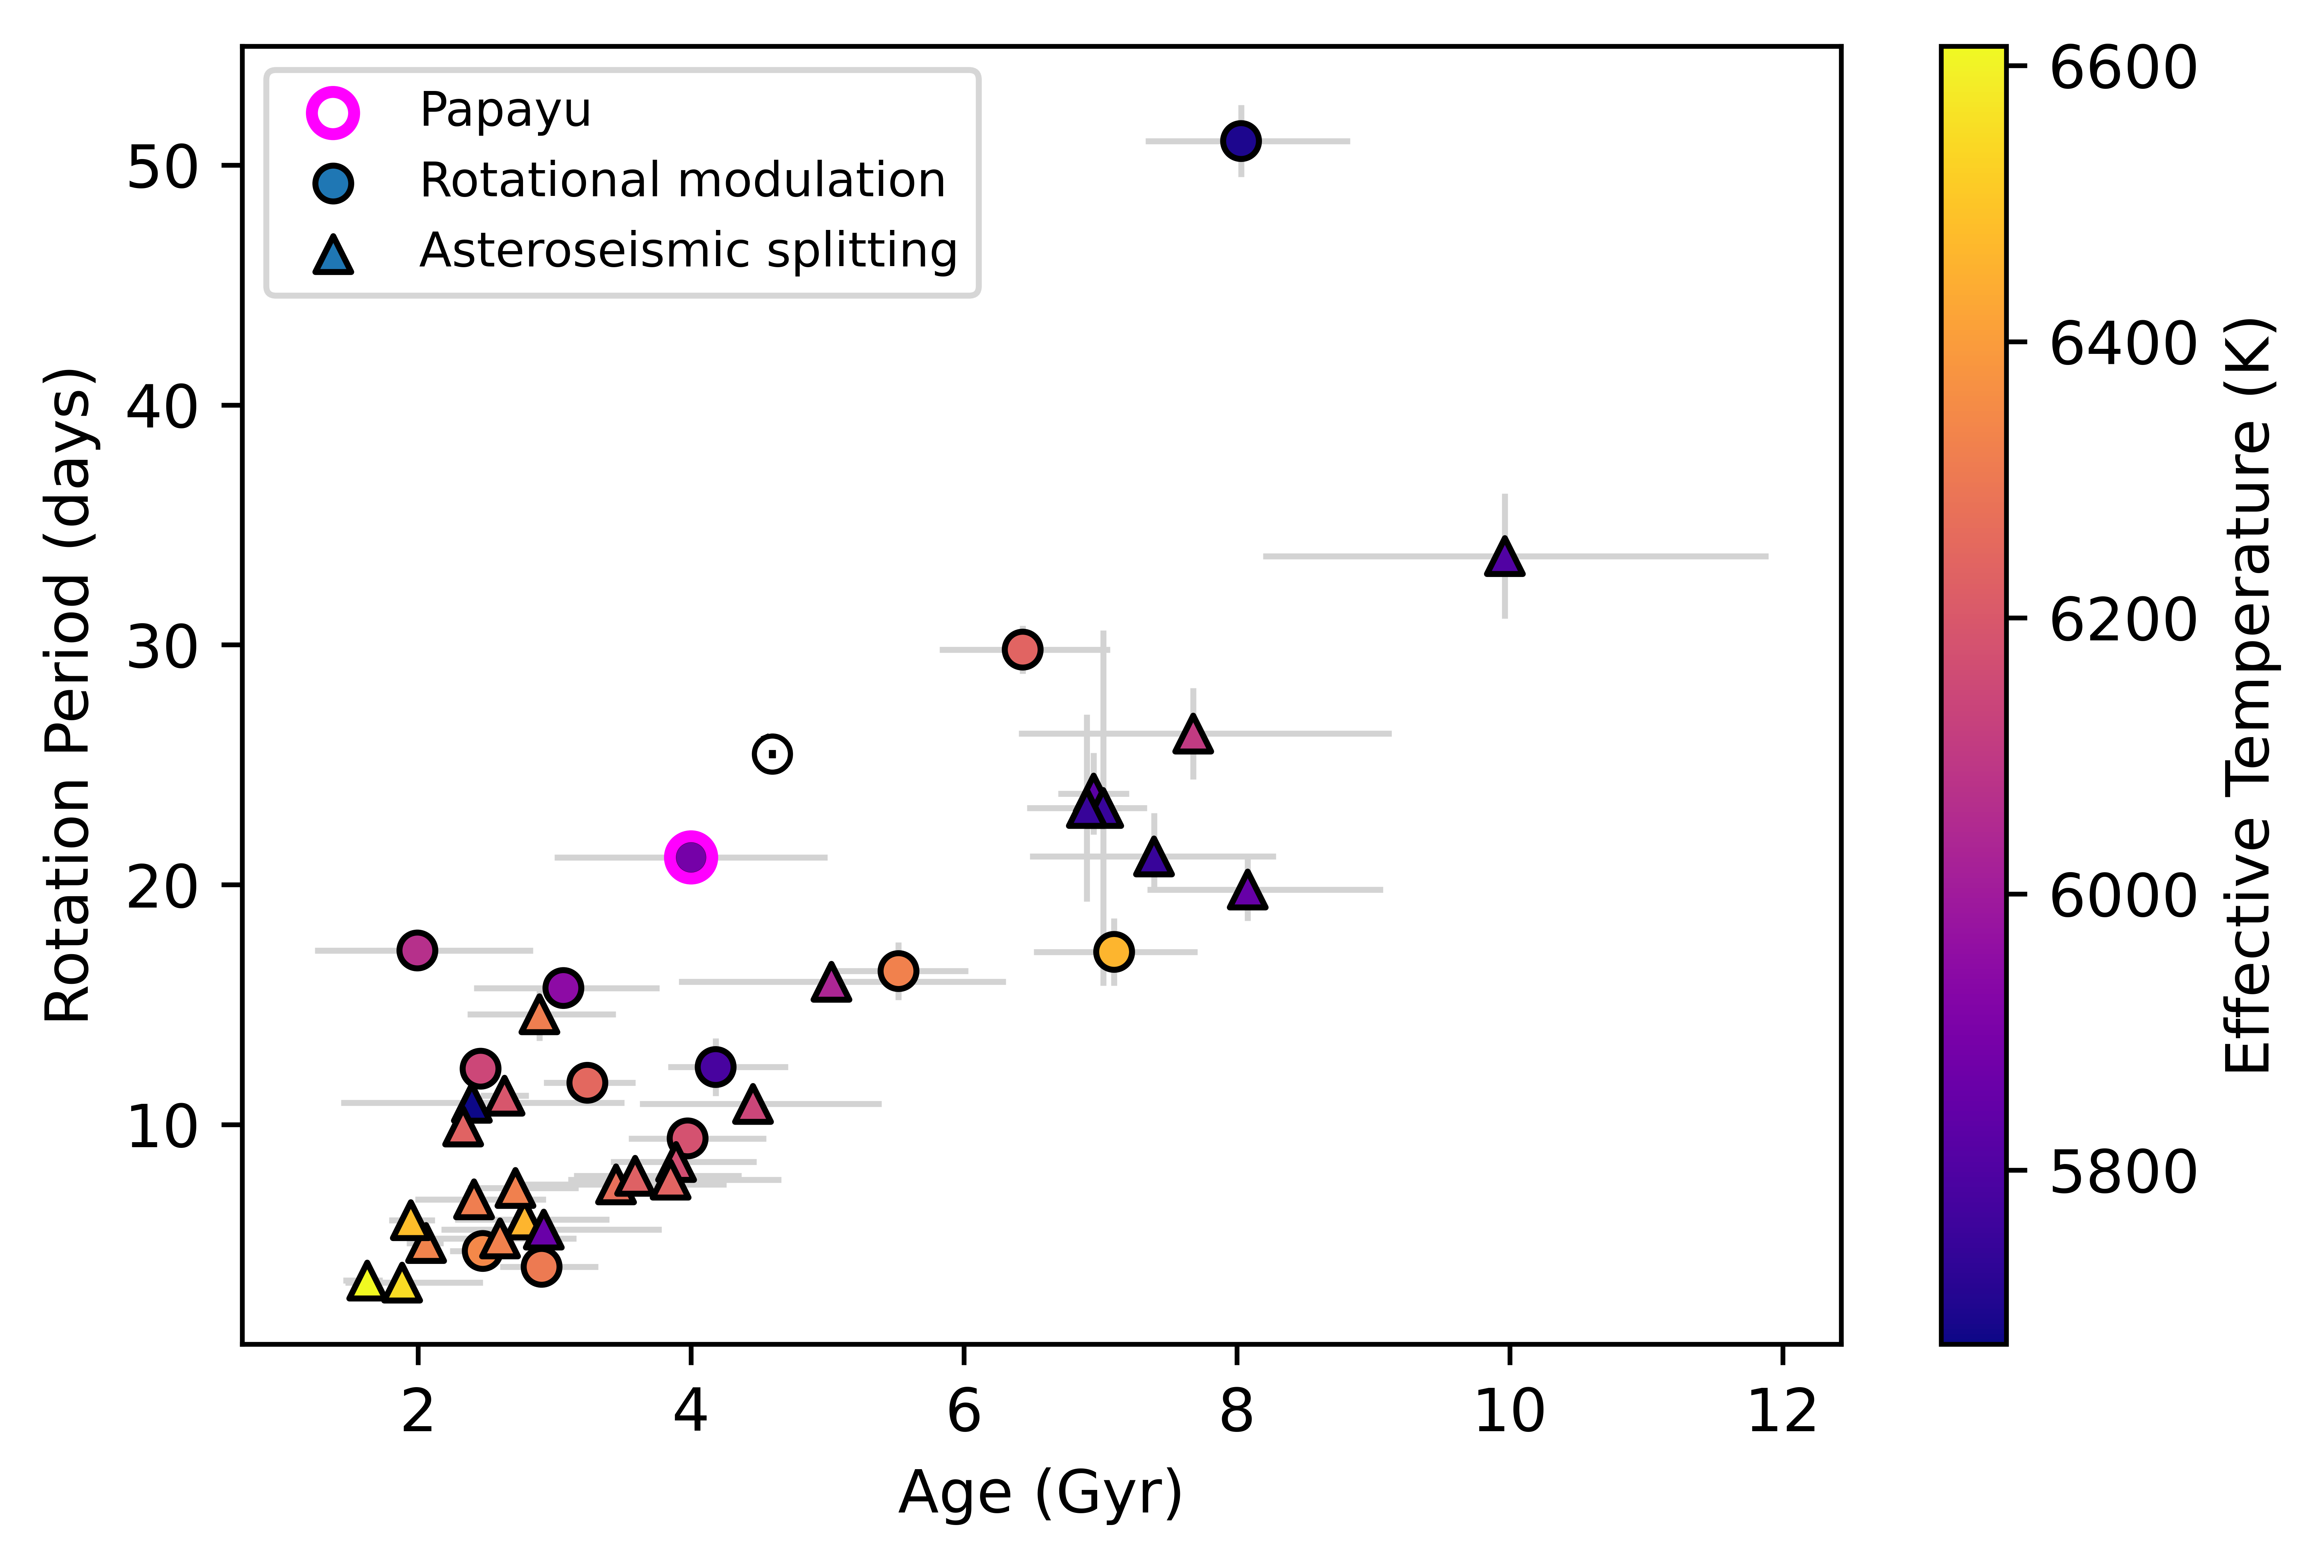

In [33]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
cmap = pl.cm.plasma

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

# solar values 
sun_teff = 5772 #K
sun_dnu = 135 #microHz
sun_age = 4.574 #Gyr
sun_prot = 25.449 # earth days

papayu_age = 4
papayu_mass = 1.2 #Msun
papayu_teff = 5888 #K
papayu_feh = 0.3 # papayu metallicity
##
jenage_seismic = jenseismic_ag_age
jeneage_seismic = jenseismic_ag_eage
jenEage_seismic = jenseismic_ag_Eage

jenprot_seismic = jenseismic_ag_prot
jeneprot_seismic = jenseismic_ag_eprot

jenfeh_seismic = jenseismic_ag_feh
jenefeh_seismic = jenseismic_ag_efeh

jenmass_seismic = jenseismic_ag_mass

jenteff_seismic = jenseismic_ag_teff
jeneteff_seismic = jenseismic_ag_eteff
#
jenage_koi = jenkoi_ag2_age
jeneage_koi = jenkoi_ag2_eage
jenEage_koi = jenkoi_ag2_Eage

jenprot_koi = jenkoi_ag2_prot
jeneprot_koi = jenkoi_ag2_eprot 

jenfeh_koi = jenkoi_ag2_feh 
jenefeh_koi = jenkoi_ag2_efeh 

jenmass_koi = jenkoi_ag2_mass

jenteff_koi = jenkoi_ag2_teff
jeneteff_koi = jenkoi_ag2_eteff
print('jeneteff_koi',jeneteff_koi)
# 
oliage = oli_age
olieage = oli_eage
oliEage = oli_Eage

oliprot = oli_prot
olieprot = oli_eprot
oliEprot = oli_Eprot

oliteff= oli_teff
olieteff = oli_eteff

olifeh = oli_feh
oliefeh = oli_efeh

olimass = oli_mass
print('len(olimass)',len(olimass))
#
jenlastage = np.array([6.95, 7.02, 6.9])
jenlasteage = np.array([0.26, 0.14, 0.44])

jenlastprot =  np.array([23.8, 23.2, 23.2])
jenlasteprot= np.array([1.7, 7.4, 3.9])

jenlastteff = np.array([5825, 5750, 5745])
jenlasteteff = np.array([50, 50, 84])

jenlastfeh = np.array([0.09, 0.05, 0.35])
jenlastefeh = np.array([0.02, 0.02, 0.09])

## 
papayu_eage=0.5
papayu_Eage=0.5
mcqagp_prot = np.append(mcqag_prot,papayu_prot)
mcqagp_age = np.append(mcqagage_age,papayu_age)
mcqagp_teff = np.append(mcqag_teff,papayu_teff)
mcqagp_feh = np.append(mcqag_feh,papayu_feh)

mcqagp_eage = np.append(mcqagage_eage,papayu_eage)
mcqagp_Eage = np.append(mcqagage_Eage,papayu_Eage)
mcqagp_eprot = np.append(mcqag_eprot,papayu_eprot)

mcqagp_mass = np.append(mcqag_mass,papayu_mass)
print(mcqag_mass)
print(mcqagp_mass)

##
mcqagp_prot_OG = np.append(mcqag_prot_OG,papayu_prot)
mcqagp_age_OG = np.append(mcqagage_age_OG,papayu_age)
mcqagp_teff_OG = np.append(mcqag_teff_OG,papayu_teff)
mcqagp_feh_OG = np.append(mcqag_feh_OG,papayu_feh)

mcqagp_eage_OG = np.append(mcqagage_eage_OG,papayu_eage)
mcqagp_Eage_OG = np.append(mcqagage_Eage_OG,papayu_Eage)
mcqagp_eprot_OG = np.append(mcqag_eprot_OG,papayu_eprot)

mcqagp_mass_OG = np.append(mcqag_mass_OG,papayu_mass)

# #
# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age+0.1,papayu_prot+1, "Papayu",size=10, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)

# plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_teff,edgecolor='black',marker='o',cmap='plasma',label='Modulation')

# plt.errorbar(jenage_seismic,jenprot_seismic,xerr=jeneage_seismic,yerr=jeneprot_seismic,ls='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismic,jenprot_seismic,c=jenteff_seismic,edgecolor='black',marker='^',cmap='plasma',label='Rotational splitting')

# plt.errorbar(jenage_koi,jenprot_koi,xerr=jeneage_koi,yerr=jeneprot_koi,ls='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koi,jenprot_koi,c=jenteff_koi,edgecolor='black',marker='o',cmap='plasma')

#
#
zs = np.concatenate([mcqagp_teff,jenteff_seismic,jenteff_koi,oliteff,jenlastteff], axis=0)
min_, max_ = zs.min(), zs.max()

plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')


plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_teff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
plt.clim(min_, max_)

# plt.scatter(mcqagp_age_OG,mcqagp_prot_OG,c=mcqagp_teff_OG,edgecolor='black',marker='o',cmap=my_cmap,label='Rotational modulation')
# plt.clim(min_, max_)


plt.errorbar(jenage_seismic,jenprot_seismic,xerr=[jeneage_seismic,jenEage_seismic],yerr=jeneprot_seismic,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismic,jenprot_seismic,c=jenteff_seismic,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koi,jenprot_koi,xerr=[jeneage_koi,jenEage_koi],yerr=jeneprot_koi,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koi,jenprot_koi,c=jenteff_koi,edgecolor='black',marker='o',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(oliage,oliprot,xerr=[olieage,oliEage],yerr=[olieprot,oliEprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliage,oliprot,c=oliteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(jenlastage,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenlastage,jenlastprot,c=jenlastteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')


all_teff = np.concatenate((mcqagp_teff,jenteff_seismic,jenteff_koi,oliteff,jenlastteff))#np.concatenate((mcqagp_teff,jenteff_seismic,jenteff_koi,oliteff,jenlastteff))
print(all_teff)
print(np.min(all_teff))
print(np.max(all_teff))

plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_teff),np.max(all_teff))
cbar = plt.colorbar()
cbar.set_label('Effective Temperature (K)')

# print(papayu_eprot)
# print(mcqag_eprot)
# print(jeneprot_seismic)
# print(jeneprot_koi)
# print(olieprot)
# print(oliEprot)
# print(jenlasteprot)

# print(mcqagp_teff)
# print(jenteff_seismic)
# print(jenteff_koi)
# print(oliteff)
# print(jenlastteff)

# print(all_teff)
# print(np.min(all_teff))
# print(np.max(all_teff))


print(len(mcqagp_teff)+len(jenteff_seismic)+len(jenteff_koi)+len(oliteff)+len(jenlastteff))

#print(jenmass_seismic)
#print(jenmass_koi)
#print(olimass)

# <span style='background:yellow'> calculate ZAMS temperature for filtered sample </span>

In [70]:
### ZAMS temp 

mcqagp_zamsteff = []
jenseismic_zamsteff = []
jenkoi_zamsteff = []
oli_zamsteff =[]
jen_last_zamsteff = []

for i in range(len(mcqagp_mass)):
#     print(i)
    mass = mcqagp_mass[i]
    metallicity = mcqagp_feh[i]
    mcqagp_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    mcqagp_zamsteffi = 10**mcqagp_zamsteff_logi
        
#     print(mcqagp_massteff[i])
#     print(mcqagp_fehteff[i])
#     print(mcqag_zams_teffteffi)
    
    mcqagp_zamsteff.append(mcqagp_zamsteffi)
print("mcqagp_zams_teffteff = ",mcqagp_zamsteff)


for i in range(len(jenmass_seismic)):
    mass = jenmass_seismic[i]
    metallicity = jenfeh_seismic[i]
    jenseismic_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    jenseismic_zamsteffi = 10**jenseismic_zamsteff_logi

    jenseismic_zamsteff.append(jenseismic_zamsteffi)

# # for KIC 7680114 (which has no mass in Jen's paper)
mass7680114 = 1.0586
metallicity7680114 = 0.05
jen_zams_seismicteff7680114 = 10**grid_rocrit.get_star_eep((mass7680114,metallicity7680114,0, 201))['Log Teff(K)']

jen_zams_seismicteff_nonan=jenseismic_zamsteff[1:]

print(jen_zams_seismicteff_nonan)
print(jen_zams_seismicteff7680114)

jenseismic_zamsteff = np.array([5845.2139817250745,5367.688216104344, 5894.033666293229, 6222.732225289814, 6041.716963218516])

print("jenseismic_zamsteff",jenseismic_zamsteff)


#jenmass_koiteff
for i in range(len(jenmass_koi)):
    mass = jenmass_koi[i]
    metallicity = jenfeh_koi[i]
    jenkoi_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    jenkoi_zamsteffi = 10**jenkoi_zamsteff_logi

    jenkoi_zamsteff.append(jenkoi_zamsteffi)
print("jen_zams_koiteff = ",jenkoi_zamsteff)

print('len(oli_mass)',len(oli_mass))
for i in range(len(oli_mass)):
    mass = oli_mass[i]
    metallicity = oli_feh[i]
    oli_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    oli_zamsteffi = 10**oli_zamsteff_logi

    oli_zamsteff.append(oli_zamsteffi)
print("oli_zamsteff = ",oli_zamsteff)

###zams_teff = grid.get_star_eep((mass, met, alpha, 202))['Log Teff(k)']

jenlastmass = [1.04]
jenlastmet = [0.09]
for i in range(len(jenlastmass)):
    jen_last_zams_teffi = 10**grid_rocrit.get_star_eep((jenlastmass[i],jenlastmet[i],0, 201))['Log Teff(K)']

    jen_last_zamsteff.append(jen_last_zams_teffi)
print("jen_last_zams_teff",jen_last_zamsteff)




print ('****************************')
print('oli_mass',oli_mass)
print('jenmass_koi',jenmass_koi)
print('jenmass_seismic',jenmass_seismic)
print('mcqagp_mass',mcqagp_mass)

mcqagp_zams_teffteff =  [6646.211725392296, 6304.697425709561, 6444.554012657044, 6152.442759404046, 5908.11355611817, 7352.819410586128, 6251.760035729665, 5874.478166339687]
[5782.200877559158, 5858.4801854763, 6215.199686787901, 5431.844016025804]
5814.7748678817925
jenseismic_zamsteff [5845.21398173 5367.6882161  5894.03366629 6222.73222529 6041.71696322]
jen_zams_koiteff =  [6270.288500311903, 5574.0171576236635, 6275.176636472069, 5998.354449356757, 6197.882762183458]
len(oli_mass) 18
oli_zamsteff =  [6176.708970202177, 6112.58401141018, 6197.882762183458, 6275.176636472069, 6270.288500311903, 6306.3180067825915, 6877.042943466923, 6951.741616334503, 5941.060198889314, 6215.199686787901, 7413.547579699007, 7263.3618562146285, 7124.483941630897, 6149.950290754629, 6727.607208858933, 6888.773042200325, 6292.338598185344, 5600.99168250267]
jen_last_zams_teff [5719.392411288661]
****************************
oli_mass [1.159, 1.199, 1.239, 1.148, 1.228, 1.239, 1.4291, 1.4082, 1.0681, 1

# LOOK HERE

[5719.39241129 5632.35547451 5669.49278568 6222.52945007 5543.09761413
 6031.04706576 5890.27663811 6176.7089702  5899.66470293 5987.56983373
 6112.58401141 5051.40709575 6197.88276218 6133.74688141 6275.17663647
 6497.35605698 6015.62589973 6270.28850031 6720.91195698 5998.35444936
 6606.23021584 5893.63947667 5764.08599772 6306.31800678 5924.21146517
 5579.49890904 6460.7451122  6877.04294347 7531.90475082 6951.74161633
 5999.09660901 5782.20087756 6633.68689231 5858.48018548 5941.06019889
 6215.19968679 7413.5475797  7263.36185621 6066.1818862  6440.54760789
 5714.63041907 7046.06239029 7124.48394163 5187.43796124 6363.84213667
 6164.8987694  6773.46913041 6149.95029075 5543.32494867 6611.07548533
 5727.19066781 6433.8418907  6382.26859382 7322.96997628 5955.84992941
 6949.02669954 6727.60720886 6888.7730422  7613.04076702 5997.20018072
 6733.01943959 6292.33859819 6851.17202361 5142.37423221 7285.01743093
 5733.90730007 5600.9916825  6346.78792491 7090.53263523 6646.21172539
 6304.

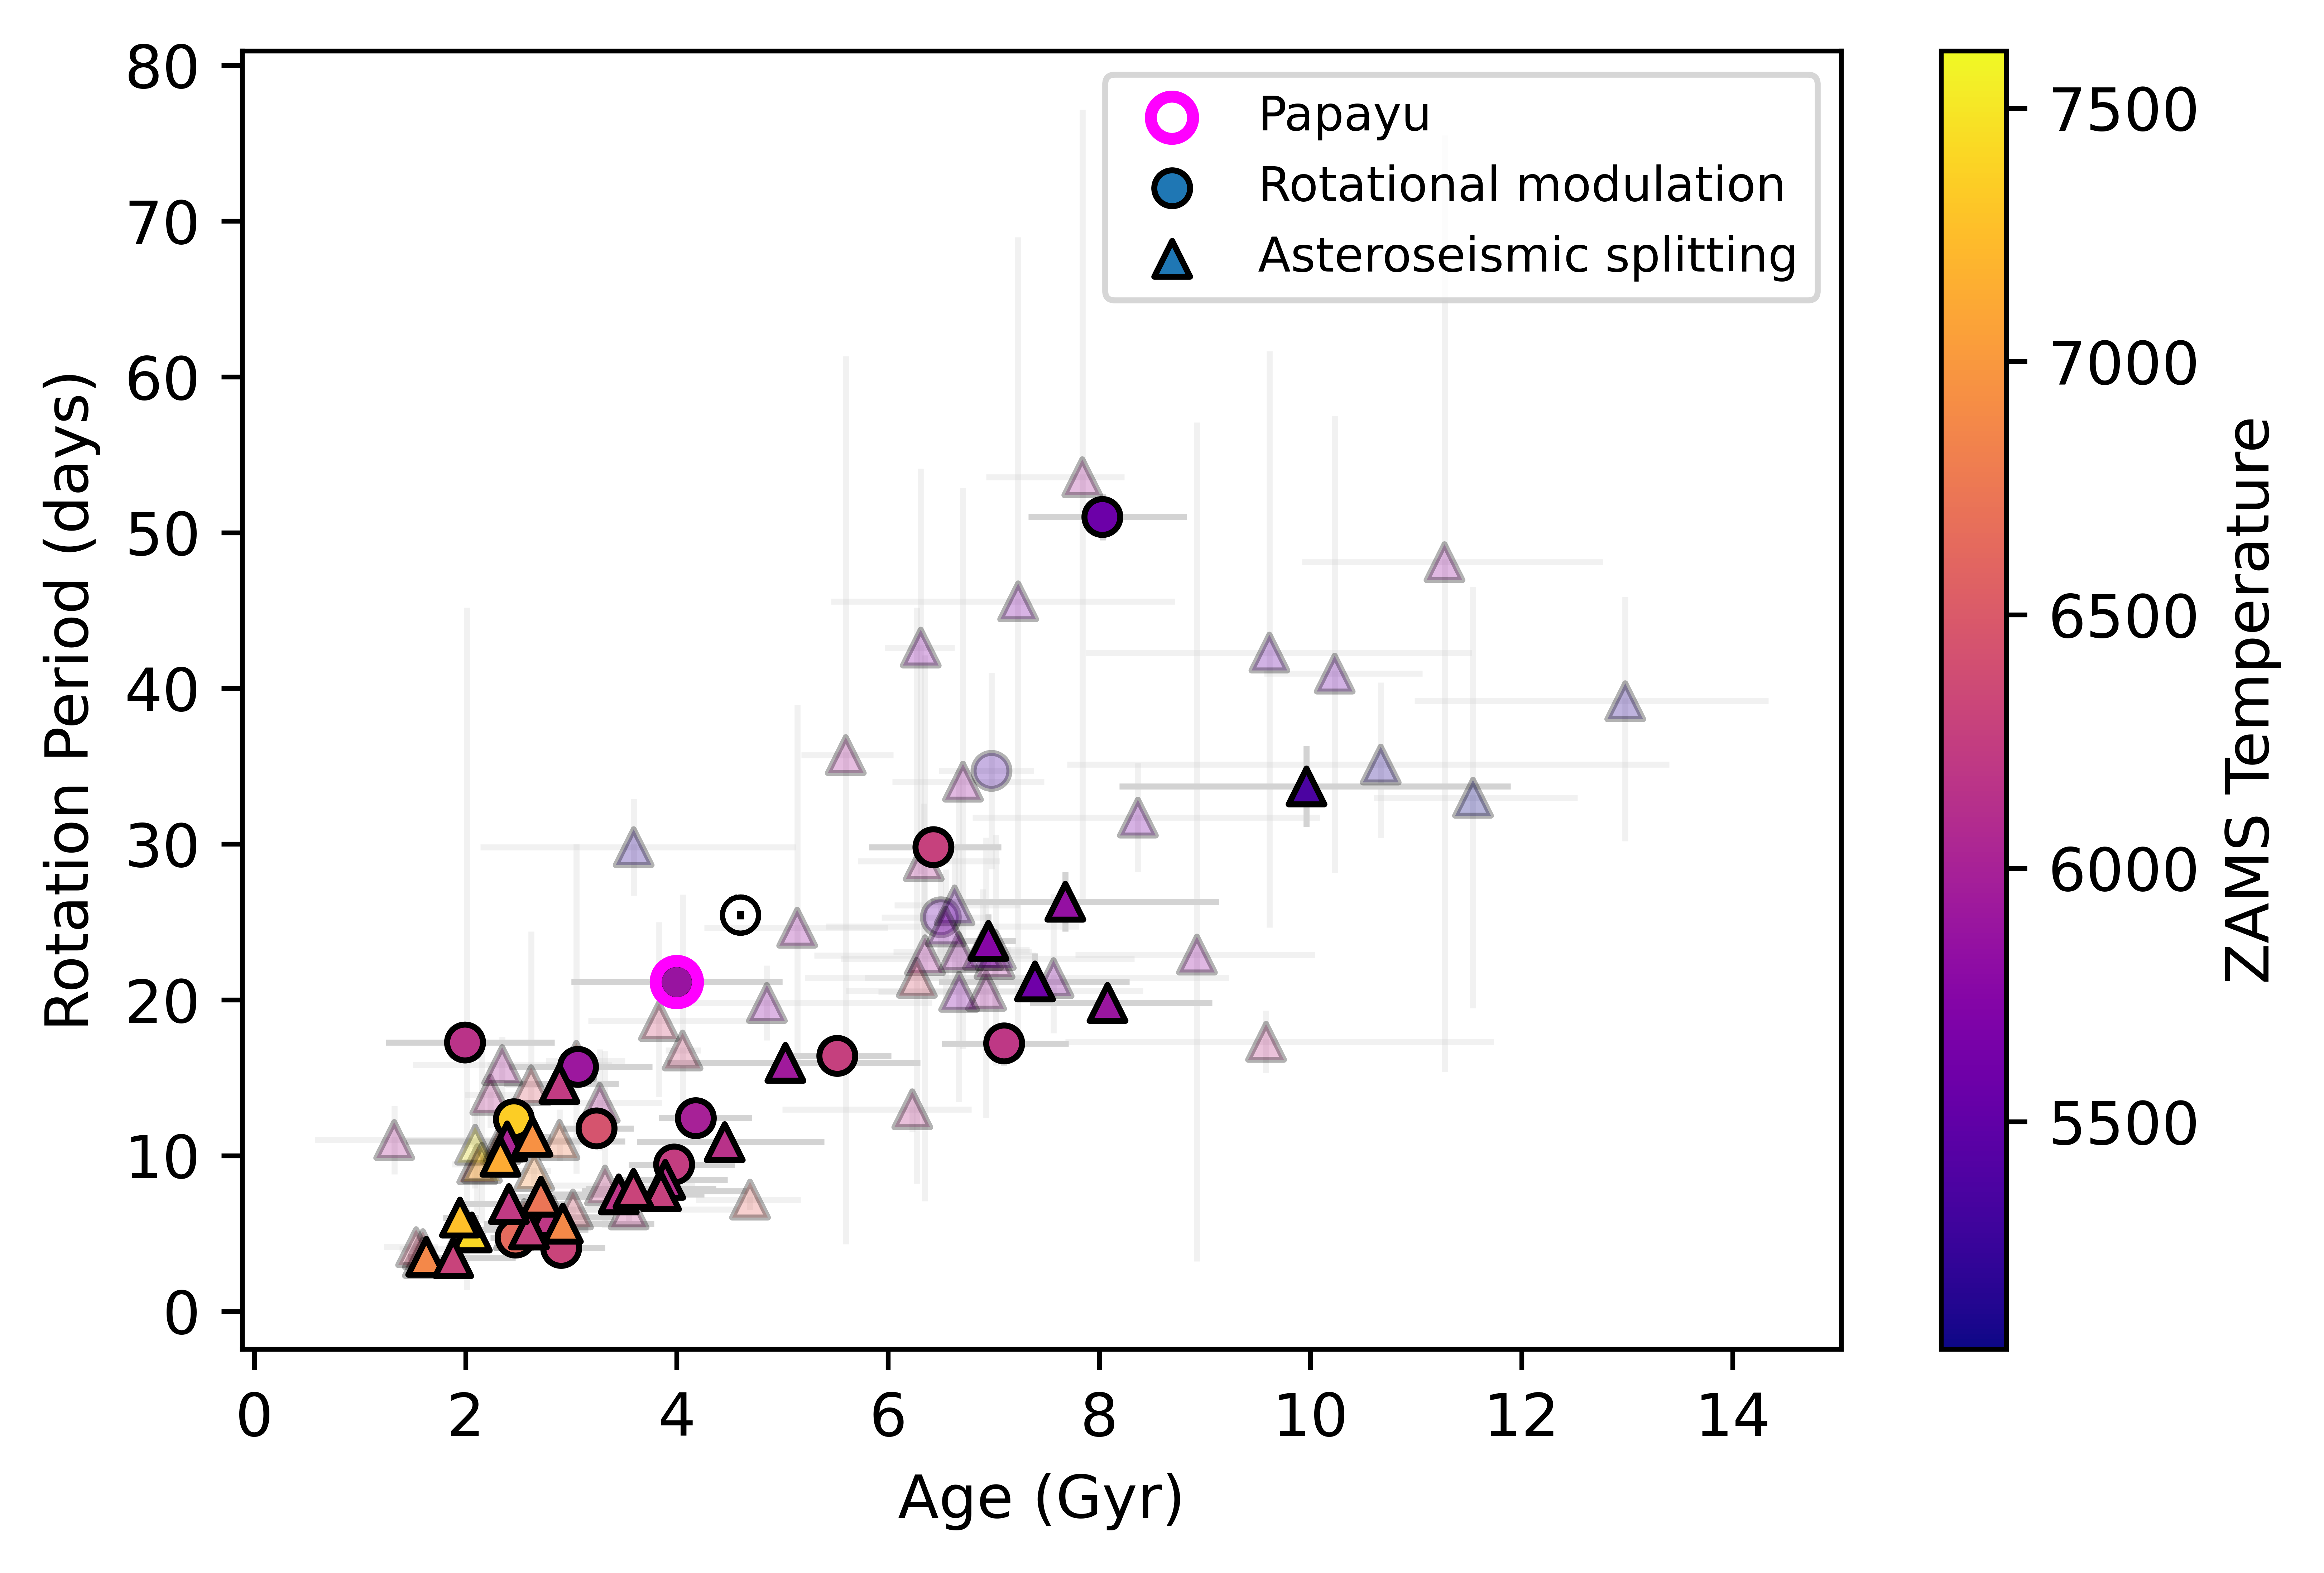

In [35]:
## colour by ZAMS 
# mcqagp_zamsteff = []
# jenseismic_zamsteff = []
# jenkoi_zamsteff = []
# oli_zamsteff =[]
# jen_last_zamsteff = []

# zs = np.concatenate([mcqagp_OG_zamsteff,jenseismic_OG_zamsteff,jenkoi_OG_zamsteff,oli_OG_zamsteff,jenlastprot_OG,mcqagp_zamsteff,jenseismic_zamsteff,jenkoi_zamsteff,oli_zamsteff,[5746.416542263336]], axis=0)
zs = np.concatenate([jen_last_OG_zamsteff,oli_OG_zamsteff,mcqagp_OG_zamsteff,jenseismic_OG_zamsteff,jenkoi_OG_zamsteff,mcqagp_zamsteff,jenseismic_zamsteff,jenkoi_zamsteff,oli_zamsteff,[5746.416542263336]], axis=0)
min_, max_ = zs.min(), zs.max()

### OG 
plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagage_age_OG,mcqag_prot_OG,xerr=[mcqagage_eage_OG,mcqagage_Eage_OG],yerr=mcqag_eprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_age_OG,mcqagp_prot_OG,c=mcqagp_OG_zamsteff,edgecolor='black',marker='o',cmap='plasma',alpha=0.3)#,label='Rotational modulation')
plt.clim(min_, max_)

plt.errorbar(jenage_seismic_OG,jenprot_seismic_OG,xerr=[jeneage_seismic_OG,jenEage_seismic_OG],yerr=jeneprot_seismic_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
plt.scatter(jenage_seismic_OG,jenprot_seismic_OG,c=jenseismic_OG_zamsteff,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)#,label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koi_OG,jenprot_koi_OG,xerr=[jeneage_koi_OG,jenEage_koi_OG],yerr=jeneprot_koi_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
plt.scatter(jenage_koi_OG,jenprot_koi_OG,c=jenkoi_OG_zamsteff,edgecolor='black',marker='o',cmap='plasma',alpha=0.3)
plt.clim(min_, max_)

plt.errorbar(oliage_OG,oliprot_OG,xerr=[olieage_OG,oliEage_OG],yerr=[olieprot_OG,oliEprot_OG],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
plt.scatter(oliage_OG,oliprot_OG,c=oli_OG_zamsteff,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)
plt.clim(min_, max_)

plt.errorbar(jenlastage_OG,jenlastprot_OG,xerr=jenlasteage_OG,yerr=jenlasteprot_OG,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0,alpha=0.3)
plt.scatter(jenlastage_OG,jenlastprot_OG,c=jen_last_OG_zamsteff,edgecolor='black',marker='^',cmap='plasma',alpha=0.3)
plt.clim(min_, max_)

# ### FILTERED
plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3)#,label='Papayu')

plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_zamsteff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
plt.clim(min_, max_)

plt.errorbar(jenage_seismic,jenprot_seismic,xerr=[jeneage_seismic,jenEage_seismic],yerr=jeneprot_seismic,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismic,jenprot_seismic,c=jenseismic_zamsteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koi,jenprot_koi,xerr=[jeneage_koi,jenEage_koi],yerr=jeneprot_koi,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koi,jenprot_koi,c=jenkoi_zamsteff,edgecolor='black',marker='o',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(oliage,oliprot,xerr=[olieage,oliEage],yerr=[olieprot,oliEprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliage,oliprot,c=oli_zamsteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

# # plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_papayu,c='gray',linestyle='dashed',label='')
# # plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_papayu,c='lightgray',linestyle='dashed',label='')

# print(jenlastage)
# print(jen_last_zamsteff)
plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter([6.95],23.8,c=[5746.416542263336],edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)


plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')

# plt.xlim([0,14])
# plt.ylim([80,0])

# all_zamsteff_OG = np.concatenate((mcqagp_OG_zamsteff,jenseismic_OG_zamsteff,jenkoi_OG_zamsteff,oli_OG_zamsteff,jen_last_OG_zamsteff))
#all_zamsteff = np.concatenate((all_zamsteff_OG,mcqagp_zamsteff,jenseismic_zamsteff,jenkoi_zamsteff))#,oli_zamsteff,[5746.416542263336]))#,jen_last_zamsteff))
all_zamsteff = np.concatenate((jen_last_OG_zamsteff,oli_OG_zamsteff,mcqagp_OG_zamsteff,jenseismic_OG_zamsteff,jenkoi_OG_zamsteff,mcqagp_zamsteff,jenseismic_zamsteff,jenkoi_zamsteff,oli_zamsteff,[5746.416542263336]))#,oli_zamsteff,[5746.416542263336]))#,jen_last_zamsteff))

# print(all_zamsteff_OG)
print(all_zamsteff)

print(np.min(all_zamsteff))
print(np.max(all_zamsteff))
plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_zamsteff),np.max(all_zamsteff))
cbar = plt.colorbar()
cbar.set_label('ZAMS Temperature')

print('mcqagp_zamsteff',mcqagp_zamsteff)

print('*****')
print(len(oli_OG_zamsteff))
print(len(oli_zamsteff))

In [36]:
# massi = 1.15 
# massf = 1.25 

# fehi = 0.2
# fehf = 0.4


# ###################################################### OLLIE
# olimm_kicid=[]
# olimm_age =[]
# olimm_Eage =[]
# olimm_eage =[]
# olimm_feh =[]
# olimm_efeh =[]
# olimm_teff=[]
# olimm_zamsteff=[]
# olimm_prot=[]
# olimm_eprot=[]
# olimm_Eprot=[]
# olimm_mass=[]

# # print(oli_teff)
# # print(oli_zamsteff)
# # print(len(oli_zamsteff))

# for i in range(len(oli_zamsteff)):
#     if oli_mass[i]<massi:
#         continue
#     if oli_mass[i]>massf:
#         continue
#     if oli_feh[i]<fehi:
#         continue
#     if oli_feh[i]>fehf:
#         continue
        
#     i = np.where(oli_zamsteff==oli_zamsteff[i])[0][0]
    
#     olimm_age.append(oli_age[i])
#     olimm_Eage.append(oli_eage[i])
#     olimm_eage.append(oli_Eage[i])

#     olimm_prot.append(oli_prot[i])
#     olimm_eprot.append(oli_eprot[i])
#     olimm_Eprot.append(oli_Eprot[i])


#     olimm_feh.append(oli_feh[i])
#     olimm_efeh.append(oli_efeh[i])
    
#     olimm_teff.append(oli_teff[i])
#     olimm_zamsteff.append(oli_zamsteff[i])
# #     jeneteff_koiteff.append(jeneteff_koi[i])
    
#     olimm_mass.append(oli_mass[i])
# # print(oliteff_teff)
# print('oli_zamsteff',olimm_zamsteff)
# # print(olimass)
# # print(olimm_mass)
# # print(olifeh)
# # print(olimm_feh)

# ########################################################### jen koi

# jenage_koimm=[]
# jeneage_koimm=[]
# jenEage_koimm=[]

# jenprot_koimm=[]
# jeneprot_koimm=[]

# jenfeh_koimm=[]
# jenefeh_koimm=[]

# jenmm_koizamsteff=[]
# jenteff_koimm=[]
# jenmass_koimm=[]


# for i in range(len(jenkoi_zamsteff)):
    
#     if jenmass_koi[i]<massi:
#         continue
#     if jenmass_koi[i]>massf:
#         continue
#     if jenfeh_koi[i]<fehi:
#         continue
#     if jenfeh_koi[i]>fehf:
#         continue
    
#     i = np.where(jenkoi_zamsteff==jenkoi_zamsteff[i])[0][0]
    
#     jenage_koimm.append(jenage_koi[i])
#     jeneage_koimm.append(jeneage_koi[i])
#     jenEage_koimm.append(jenEage_koi[i])

#     jenprot_koimm.append(jenprot_koi[i])
#     jeneprot_koimm.append(jeneprot_koi[i])

#     jenfeh_koimm.append(jenfeh_koi[i])
#     jenefeh_koimm.append(jenefeh_koi[i])

#     jenmm_koizamsteff.append(jenkoi_zamsteff[i])
#     jenteff_koimm.append(jenteff_koi[i])
    
#     jenmass_koimm.append(jenmass_koi[i])
    
# # print('jenteff_koiteff',jenteff_koiteff)
# print('jenteff_koizamsteff',jenmm_koizamsteff)


# ########################################################### jen seismic

# jenage_seismicmm=[]
# jeneage_seismicmm=[]
# jenEage_seismicmm=[]

# jenprot_seismicmm=[]
# jeneprot_seismicmm=[]

# jenfeh_seismicmm=[]
# jenefeh_seismicmm=[]

# jenzamsteff_seismicmm=[]
# jenteff_seismicmm=[]

# jenmass_seismicmm=[]

# # jenseismic_ag_teff = np.array(jenseismic_ag_teff)
# # jenteff_seismic = np.array(jenteff_seismic)


# for i in range(len(jenseismic_zamsteff)):

#     if jenmass_seismic[i]<massi:
#         continue
#     if jenmass_seismic[i]>massf:
#         continue
#     if jenfeh_seismic[i]<fehi:
#         continue
#     if jenfeh_seismic[i]>fehf:
#         continue

#     i = np.where(jenseismic_zamsteff==jenseismic_zamsteff[i])[0][0]

#     jenage_seismicmm.append(jenage_seismic[i])
#     jeneage_seismicmm.append(jeneage_seismic[i])
#     jenEage_seismicmm.append(jenEage_seismic[i])

#     jenprot_seismicmm.append(jenprot_seismic[i])
#     jeneprot_seismicmm.append(jeneprot_seismic[i])

#     jenfeh_seismicmm.append(jenfeh_seismic[i])
#     jenefeh_seismicmm.append(jenefeh_seismic[i])

#     jenzamsteff_seismicmm.append(jenseismic_zamsteff[i]) 
#     jenteff_seismicmm.append(jenteff_seismic[i])
    
#     jenmass_seismicmm.append(jenmass_seismic[i]) 

# # print(jenteff_seismicteff)
# print('jenzamsteff_seismicteff=',jenzamsteff_seismicmm)
# ########################################################### mcqag 

# mcqagp_protmm = []
# mcqagp_agemm = []

# mcqagp_mmteff = []
# mcqagp_mmzams = []

# mcqagp_fehmm = []
# mcqagp_eagemm = [] 
# mcqagp_Eagemm  = []
# mcqagp_eprotmm = []
# mcqagp_massmm=[]

# mcqagp_teff = np.array(mcqagp_teff)
# # print(mcqagp_teff)
# # print(mcqagp_zamsteff)
# for i in range(len(mcqagp_zamsteff)):#mcqagp_teff:
    
#     if mcqagp_mass[i]<massi:
#         continue
#     if mcqagp_mass[i]>massf:
#         continue
#     if mcqagp_feh[i]<fehi:
#         continue
#     if mcqagp_feh[i]>fehf:
#         continue

    
#     i = np.where(mcqagp_zamsteff==mcqagp_zamsteff[i])[0][0]
    
#     mcqagp_protmm.append(mcqagp_prot[i])
#     mcqagp_agemm.append(mcqagp_age[i])
#     mcqagp_mmzams.append(mcqagp_zamsteff[i])
#     mcqagp_mmteff.append(mcqagp_teff[i])
#     mcqagp_fehmm.append(mcqagp_feh[i])
#     mcqagp_eagemm.append(mcqagp_eage[i]) 
#     mcqagp_Eagemm.append(mcqagp_Eage[i]) 
#     mcqagp_eprotmm.append(mcqagp_eprot[i]) 
#     mcqagp_massmm.append(mcqagp_mass[i])
    
# # print(mcqagp_teffteff)
# print('mcqagp_teffzams',mcqagp_mmzams)


In [37]:
# zs = np.concatenate([mcqagp_mmzams, jenzamsteff_seismicmm,jenmm_koizamsteff,olimm_zamsteff,[5746.416542263336]], axis=0)
# min_, max_ = zs.min(), zs.max()


# plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_papayu,c='gray',linestyle='dashed',label='')
# plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_papayu,c='lightgray',linestyle='dashed',label='')


# plt.errorbar(mcqagp_agemm,mcqagp_protmm,xerr=[mcqagp_eagemm,mcqagp_Eagemm],yerr=mcqagp_eprotmm,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
# plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

# plt.scatter(mcqagp_agemm,mcqagp_protmm,c=mcqagp_mmzams,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
# plt.clim(min_, max_)

# plt.errorbar(jenage_seismicmm,jenprot_seismicmm,xerr=[jeneage_seismicmm,jenEage_seismicmm],yerr=jeneprot_seismicmm,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismicmm,jenprot_seismicmm,c=jenzamsteff_seismicmm,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
# plt.clim(min_, max_)

# plt.errorbar(jenage_koimm,jenprot_koimm,xerr=[jeneage_koimm,jenEage_koimm],yerr=jeneprot_koimm,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koimm,jenprot_koimm,c=jenmm_koizamsteff,edgecolor='black',marker='o',cmap='plasma')
# plt.clim(min_, max_)

# plt.errorbar(olimm_age,olimm_prot,xerr=[olimm_eage,olimm_Eage],yerr=[olimm_eprot,olimm_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(olimm_age,olimm_prot,c=olimm_zamsteff,edgecolor='black',marker='^',cmap='plasma')
# plt.clim(min_, max_)

# plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter([6.95],23.8,c=[5746.416542263336],edgecolor='black',marker='^',cmap='plasma')
# plt.clim(min_, max_)

# plt.ylim([64,2])
# plt.xlim([0.3,12.5])

# plt.xlabel('Age (Gyr)')
# plt.ylabel('Rotation Period (days)')

# all_zamsteffteff = np.concatenate((mcqagp_mmzams, jenzamsteff_seismicmm,jenmm_koizamsteff,olimm_zamsteff,[5746.416542263336]))
# # all_zamsteffteff = np.concatenate((mcqagp_zams_teffteff,jen_zams_seismicteff,jen_zams_koiteff,oliteff_zams_teff,[5746.416542263336]))

# print(all_zamsteffteff)
# # print(len(mcqagp_zams_teffteff)+len(jen_zams_seismicteff)+len(jen_zams_koiteff)+len(oliteff_zams_teff)+1)

# print('min = ',np.min(all_zamsteffteff))
# print('max = ',np.max(all_zamsteffteff))
# # print(np.mean(all_zamsteffteff))
# plt.legend(loc="best",fontsize=8)
# plt.clim(np.min(all_zamsteffteff),np.max(all_zamsteffteff))
# cbar = plt.colorbar()
# cbar.set_label('ZAMS Temperature (K)')

# # print(jenlastteff)
# ## check the track for the 18day one 

# # plt.scatter(7.10,17.2)

# <span style='background:yellow'> ARRAYS FILTER - allowing 5688 < ZAMS Temp < 6088 </span>


In [38]:


tempi = 5774.47816634
tempf = 5974.47816634


###################################################### OLLIE
oliteff_kicid=[]
oliteff_age =[]
oliteff_Eage =[]
oliteff_eage =[]
oliteff_feh =[]
oliteff_efeh =[]
oliteff_teff=[]
oliteff_zamsteff=[]
oliteff_prot=[]
oliteff_eprot=[]
oliteff_Eprot=[]
oliteff_mass=[]

print(oli_teff)
print(oli_zamsteff)

for teff in oli_zamsteff:
    if teff<tempi:
        continue
    if teff>tempf:
        continue
        
    i = np.where(oli_zamsteff==teff)[0][0]
    
    oliteff_age.append(oli_age[i])
    oliteff_Eage.append(oli_eage[i])
    oliteff_eage.append(oli_Eage[i])

    oliteff_prot.append(oli_prot[i])
    oliteff_eprot.append(oli_eprot[i])
    oliteff_Eprot.append(oli_Eprot[i])


    oliteff_feh.append(oli_feh[i])
    oliteff_efeh.append(oli_efeh[i])
    
    oliteff_teff.append(oli_teff[i])
    oliteff_zamsteff.append(oli_zamsteff[i])
#     jeneteff_koiteff.append(jeneteff_koi[i])
    
    oliteff_mass.append(oli_mass[i])
# print(oliteff_teff)
print('oli_zamsteff',oliteff_zamsteff)

########################################################### jen koi

jenage_koiteff=[]
jeneage_koiteff=[]
jenEage_koiteff=[]

jenprot_koiteff=[]
jeneprot_koiteff=[]

jenfeh_koiteff=[]
jenefeh_koiteff=[]

jenteff_koizamsteff=[]
jenteff_koiteff=[]
jenmass_koiteff=[]


for teff in jenkoi_zamsteff:
    
    if teff<tempi:
        continue
    if teff>tempf:
        continue
    
    i = np.where(jenkoi_zamsteff==teff)[0][0]
    
    jenage_koiteff.append(jenage_koi[i])
    jeneage_koiteff.append(jeneage_koi[i])
    jenEage_koiteff.append(jenEage_koi[i])

    jenprot_koiteff.append(jenprot_koi[i])
    jeneprot_koiteff.append(jeneprot_koi[i])

    jenfeh_koiteff.append(jenfeh_koi[i])
    jenefeh_koiteff.append(jenefeh_koi[i])

    jenteff_koizamsteff.append(jenkoi_zamsteff[i])
    jenteff_koiteff.append(jenteff_koi[i])
    
    jenmass_koiteff.append(jenmass_koi[i])
    
# print('jenteff_koiteff',jenteff_koiteff)
print('jenteff_koizamsteff',jenteff_koizamsteff)


########################################################### jen seismic

jenage_seismicteff=[]
jeneage_seismicteff=[]
jenEage_seismicteff=[]

jenprot_seismicteff=[]
jeneprot_seismicteff=[]

jenfeh_seismicteff=[]
jenefeh_seismicteff=[]

jenzamsteff_seismicteff=[]
jenteff_seismicteff=[]

jenmass_seismicteff=[]

# jenseismic_ag_teff = np.array(jenseismic_ag_teff)
# jenteff_seismic = np.array(jenteff_seismic)


for teff in jenseismic_zamsteff:
    
    if teff<tempi:
        continue
    if teff>tempf:
        continue
    
    i = np.where(jenseismic_zamsteff==teff)[0][0]

    jenage_seismicteff.append(jenage_seismic[i])
    jeneage_seismicteff.append(jeneage_seismic[i])
    jenEage_seismicteff.append(jenEage_seismic[i])

    jenprot_seismicteff.append(jenprot_seismic[i])
    jeneprot_seismicteff.append(jeneprot_seismic[i])

    jenfeh_seismicteff.append(jenfeh_seismic[i])
    jenefeh_seismicteff.append(jenefeh_seismic[i])

    jenzamsteff_seismicteff.append(jenseismic_zamsteff[i]) 
    jenteff_seismicteff.append(jenteff_seismic[i])
    
    jenmass_seismicteff.append(jenmass_seismic[i]) 

# print(jenteff_seismicteff)
print('jenzamsteff_seismicteff=',jenzamsteff_seismicteff)
print('jenmass_seismicteff', jenmass_seismicteff)
print('jenfeh_seismicteff',jenfeh_seismicteff)
print('jenprot_seismicteff',jenprot_seismicteff)
########################################################### mcqag 

mcqagp_protteff = []
mcqagp_ageteff = []

mcqagp_teffteff = []
mcqagp_teffzams = []

mcqagp_fehteff = []
mcqagp_eageteff = [] 
mcqagp_Eageteff  = []
mcqagp_eprotteff = []
mcqagp_massteff=[]

mcqagp_teff = np.array(mcqagp_teff)
print(mcqagp_teff)
print(mcqagp_zamsteff)
for teff in mcqagp_zamsteff:#mcqagp_teff:
    
    if teff<tempi:
        continue
    if teff>tempf:
        continue
    
    i = np.where(mcqagp_zamsteff==teff)[0][0]
    
    mcqagp_protteff.append(mcqagp_prot[i])
    mcqagp_ageteff.append(mcqagp_age[i])
    mcqagp_teffzams.append(mcqagp_zamsteff[i])
    mcqagp_teffteff.append(mcqagp_teff[i])
    mcqagp_fehteff.append(mcqagp_feh[i])
    mcqagp_eageteff.append(mcqagp_eage[i]) 
    mcqagp_Eageteff.append(mcqagp_Eage[i]) 
    mcqagp_eprotteff.append(mcqagp_eprot[i]) 
    mcqagp_massteff.append(mcqagp_mass[i])
    
print(mcqagp_teffteff)
print('mcqagp_teffzams',mcqagp_teffzams)
###########################################################

[6270, 6169, 6463, 6239, 6325, 6225, 6614, 6193, 6037, 6313, 6331, 6479, 6235, 6143, 6321, 5860, 6548, 5750]
[6176.708970202177, 6112.58401141018, 6197.882762183458, 6275.176636472069, 6270.288500311903, 6306.3180067825915, 6877.042943466923, 6951.741616334503, 5941.060198889314, 6215.199686787901, 7413.547579699007, 7263.3618562146285, 7124.483941630897, 6149.950290754629, 6727.607208858933, 6888.773042200325, 6292.338598185344, 5600.99168250267]
oli_zamsteff [5941.060198889314]
jenteff_koizamsteff []
jenzamsteff_seismicteff= [5845.2139817250745, 5894.033666293229]
jenmass_seismicteff [1.089, 0.9693]
jenfeh_seismicteff [-0.04, -0.23]
jenprot_seismicteff [26.3, 19.8]
[6344. 6305. 6248. 6067. 5949. 6146. 6179. 5888.]
[6646.211725392296, 6304.697425709561, 6444.554012657044, 6152.442759404046, 5908.11355611817, 7352.819410586128, 6251.760035729665, 5874.478166339687]
[5949.0, 5888.0]
mcqagp_teffzams [5908.11355611817, 5874.478166339687]


# <span style='background:yellow'> Plots plots plots coloured by ZAMS </span>

[5908.11355612 5874.47816634 5845.21398173 5894.03366629 5941.06019889]
5845.2139817250745
5941.060198889314


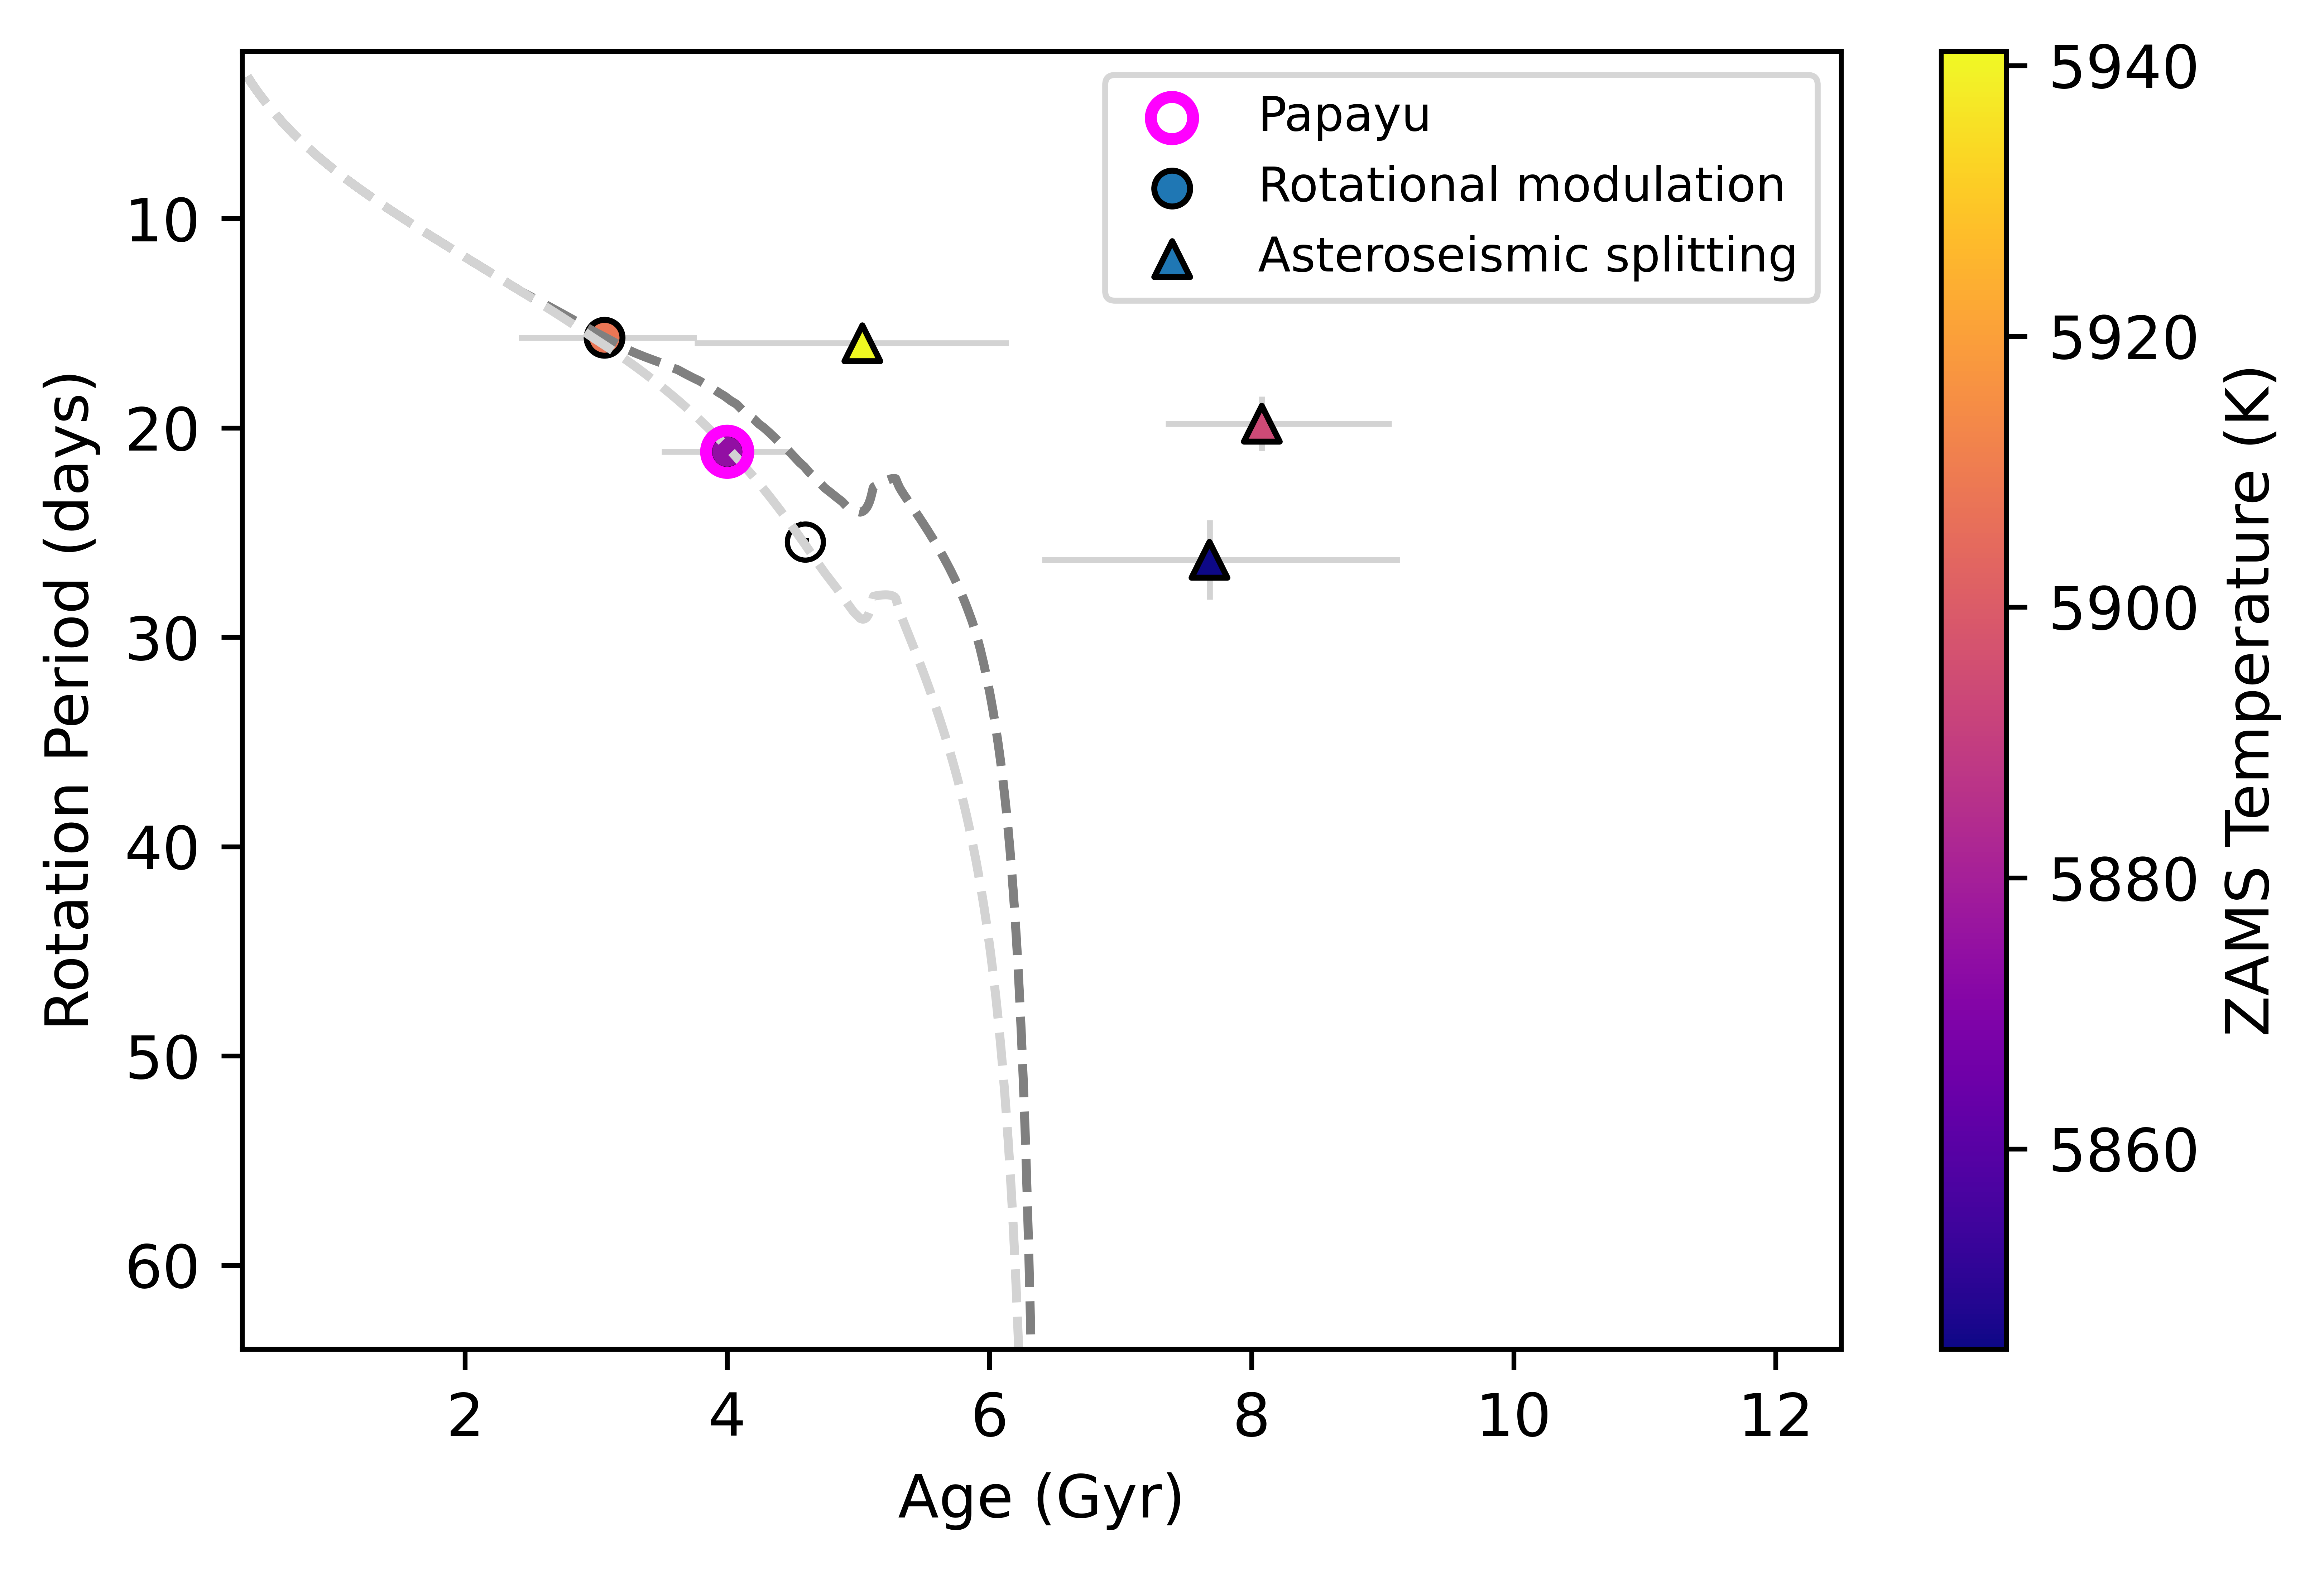

In [39]:
zs = np.concatenate([mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff], axis=0)#,[5746.416542263336]], axis=0)
min_, max_ = zs.min(), zs.max()


plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_papayu,c='gray',linestyle='dashed',label='')
plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_papayu,c='lightgray',linestyle='dashed',label='')


plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_teffzams,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
plt.clim(min_, max_)

plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenzamsteff_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenteff_koizamsteff,edgecolor='black',marker='o',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliteff_age,oliteff_prot,c=oliteff_zamsteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

# plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter([6.95],23.8,c=[5746.416542263336],edgecolor='black',marker='^',cmap='plasma')
# plt.clim(min_, max_)

plt.ylim([64,2])
plt.xlim([0.3,12.5])

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')

all_zamsteffteff = np.concatenate((mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff))#,[5746.416542263336]))
# all_zamsteffteff = np.concatenate((mcqagp_zams_teffteff,jen_zams_seismicteff,jen_zams_koiteff,oliteff_zams_teff,[5746.416542263336]))

print(all_zamsteffteff)
# print(len(mcqagp_zams_teffteff)+len(jen_zams_seismicteff)+len(jen_zams_koiteff)+len(oliteff_zams_teff)+1)

print(np.min(all_zamsteffteff))
print(np.max(all_zamsteffteff))
# print(np.mean(all_zamsteffteff))
plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_zamsteffteff),np.max(all_zamsteffteff))
cbar = plt.colorbar()
cbar.set_label('ZAMS Temperature (K)')

# print(jenlastteff)
## check the track for the 18day one 

# plt.scatter(7.10,17.2)

### overplot for the dark blue one and model should plot a similar track 
### 2nd set of two tracks. mass + 1sog, - 1sig 
### figure out which of the 2 give you the widest bracket. 
### lower err/upper shaded area

# print(jenzamsteff_seismicteff)

mean zams = 5892.5799138730945
relevant feh -0.17349999999999927
relevant mass 1.067
5892.797112168568
5891.768959077376


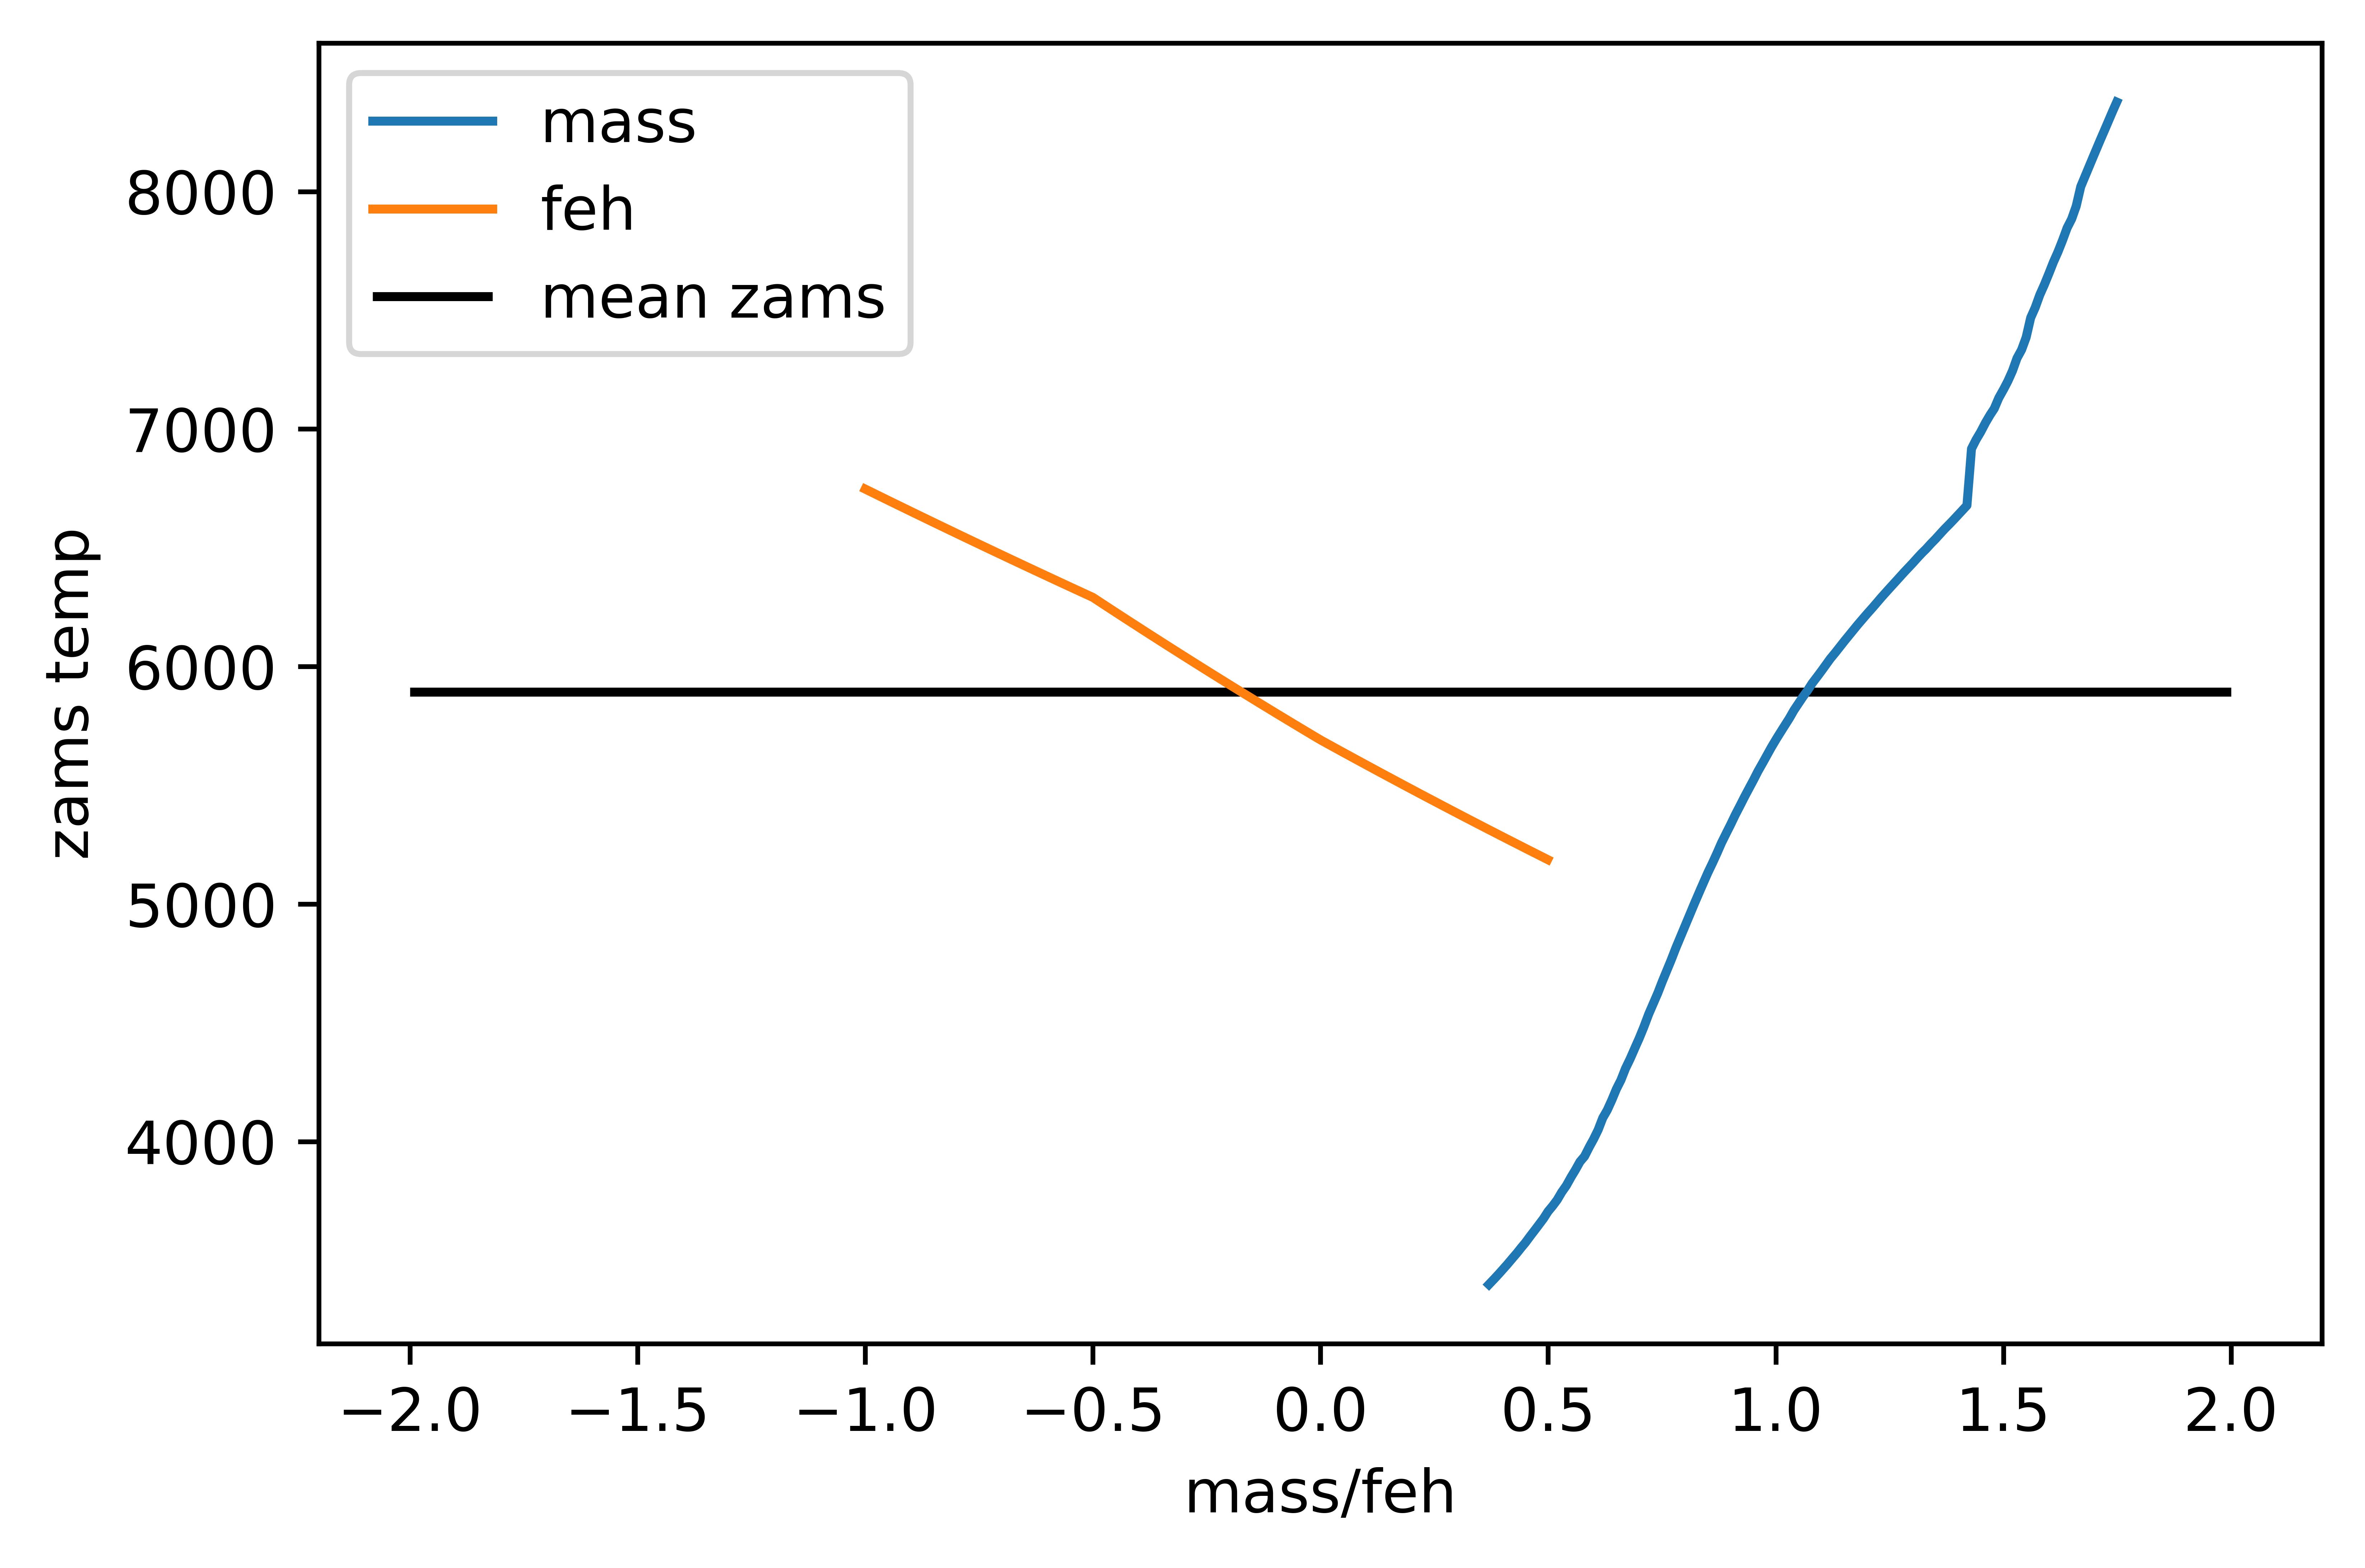

In [130]:
zamsteffmass = []
zamstefffeh = []

for i in np.arange(0,1.75,0.001):
#     print(i)
    zamsteff_logi = grid_rocrit.get_star_eep((i,0,0, 201))['Log Teff(K)'] 
    zamsteffi = 10**zamsteff_logi
#     print(zamsteffi)
    
    zamsteffmass = np.append(zamsteffmass,zamsteffi)

for i in np.arange(-1,0.5,0.001):
#     print(i)
    zamsteff_logi = grid_rocrit.get_star_eep((1,i,0, 201))['Log Teff(K)'] 
    zamsteffi = 10**zamsteff_logi
#     print(zamsteffi)
    
    zamstefffeh = np.append(zamstefffeh,zamsteffi)
    
### OUTPUTs
# print(zamsteffmass)
# print(zamstefffeh)

massrange = np.arange(0,1.75,0.001)
fehrange = np.arange(-1,0.5,0.001)#np.arange(0,1,0.01)

plt.plot(massrange,zamsteffmass, label='mass')
plt.plot(fehrange,zamstefffeh, label='feh')

plt.hlines(5892.5799138730945,-2,2, label='mean zams')

plt.ylabel('zams temp')
plt.xlabel('mass/feh')
plt.legend()

zamstempmean = np.mean(all_zamsteffteff)
feh_sunzamstemp = np.mean(fehrange[(np.where((zamstefffeh<zamstempmean+1) & (zamstefffeh>zamstempmean-1)))])
mass_sunzamstemp = np.mean(massrange[(np.where((zamsteffmass<zamstempmean+1) & (zamsteffmass>zamstempmean-1)))])
print('mean zams =',zamstempmean)
print('relevant feh',feh_sunzamstemp)
print('relevant mass',mass_sunzamstemp)


zamsteff_logi = grid_rocrit.get_star_eep((1,feh_sunzamstemp,0, 201))['Log Teff(K)'] 
zamsteffi = 10**zamsteff_logi
print(zamsteffi)

zamsteff_logi = grid_rocrit.get_star_eep((mass_sunzamstemp,0,0, 201))['Log Teff(K)'] 
zamsteffj = 10**zamsteff_logi
print(zamsteffj)
    

[5908.11355612 5874.47816634 5845.21398173 5894.03366629 5941.06019889]
5845.2139817250745
5941.060198889314
mean= 5892.5799138730945
zamsteffguess 9009.202112640602


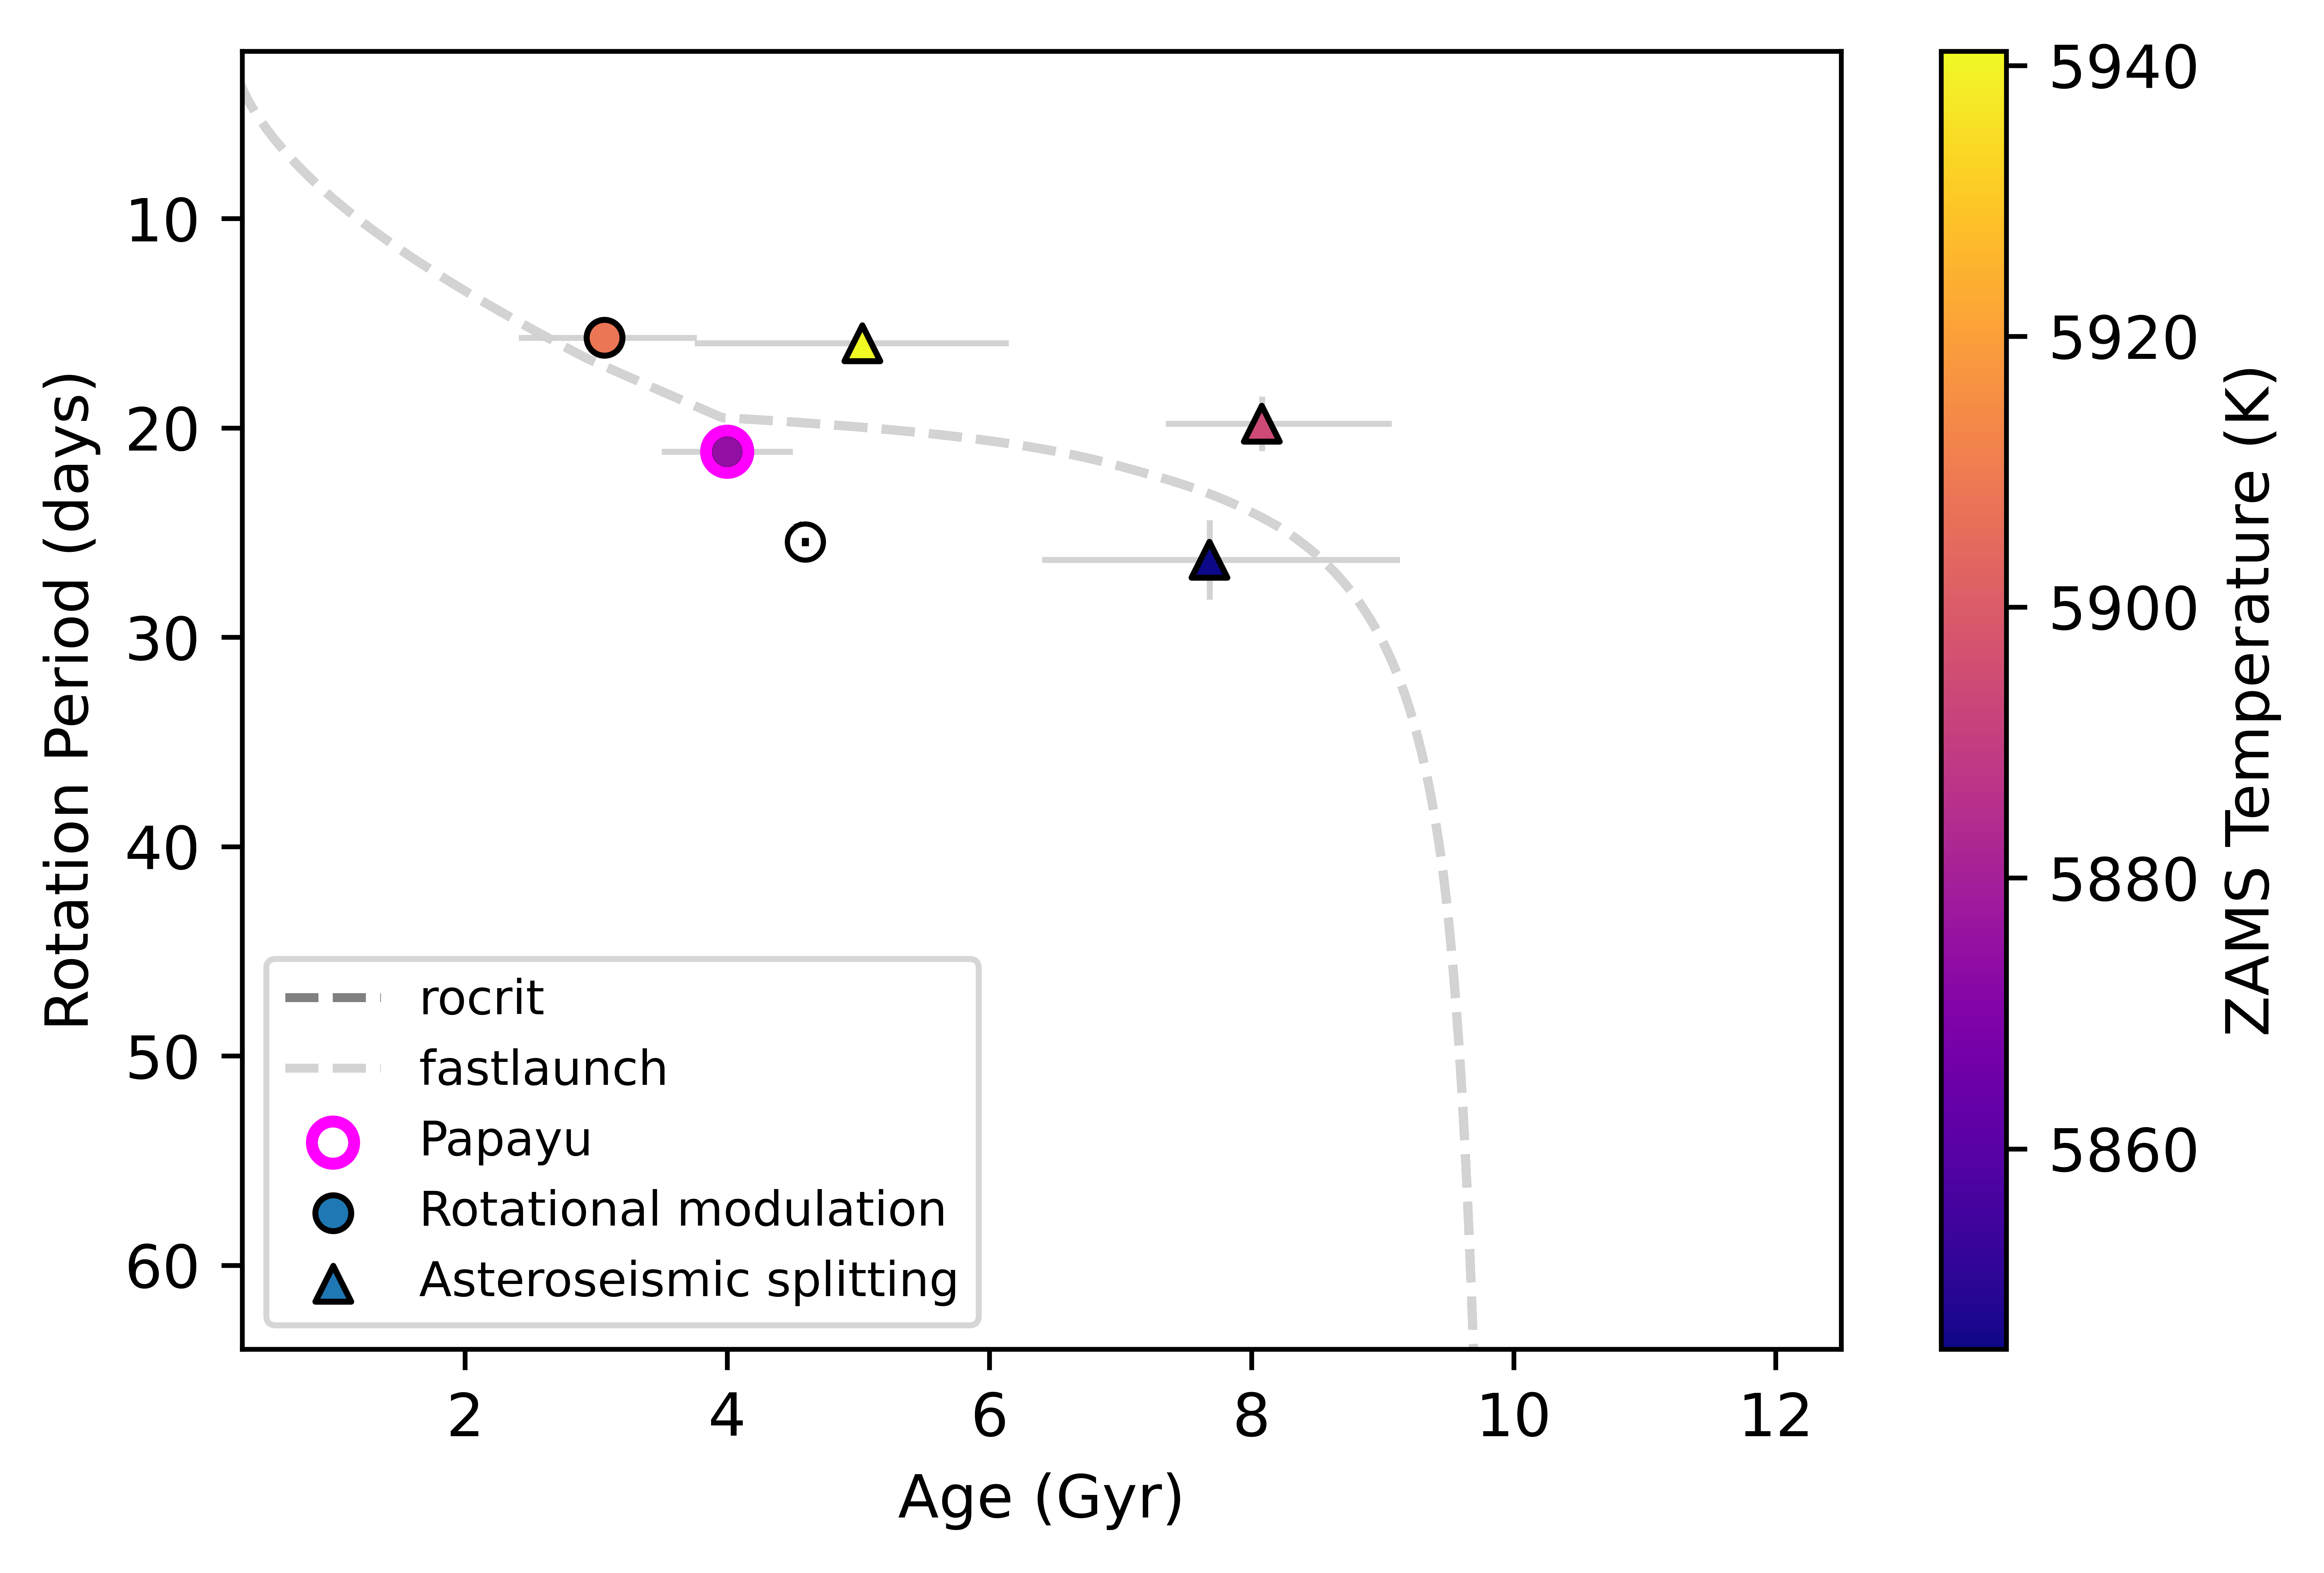

In [133]:
### zams mean plot 

## papayu neighbour 
# jenzamsteff_seismicteff= [5845.2139817250745, 5894.033666293229]
# jenmass_seismicteff [1.089, 0.9693]
# jenfeh_seismicteff [-0.04, -0.23]



zs = np.concatenate([mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff], axis=0)#,[5746.416542263336]], axis=0)
min_, max_ = zs.min(), zs.max()


track_rocrit_mean = grid_rocrit.get_track((1,feh_sunzamstemp, 0))
track_fastlaunch_mean = grid_rocrit.get_track((1,feh_sunzamstemp, 0))


plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_mean,c='gray',linestyle='dashed',label='rocrit')
plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_mean,c='lightgray',linestyle='dashed',label='fastlaunch')


plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_teffzams,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
plt.clim(min_, max_)

plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenzamsteff_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenteff_koizamsteff,edgecolor='black',marker='o',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliteff_age,oliteff_prot,c=oliteff_zamsteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

# plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter([6.95],23.8,c=[5746.416542263336],edgecolor='black',marker='^',cmap='plasma')
# plt.clim(min_, max_)

plt.ylim([64,2])
plt.xlim([0.3,12.5])

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')

all_zamsteffteff = np.concatenate((mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff))#,[5746.416542263336]))
# all_zamsteffteff = np.concatenate((mcqagp_zams_teffteff,jen_zams_seismicteff,jen_zams_koiteff,oliteff_zams_teff,[5746.416542263336]))

print(all_zamsteffteff)
# print(len(mcqagp_zams_teffteff)+len(jen_zams_seismicteff)+len(jen_zams_koiteff)+len(oliteff_zams_teff)+1)

print(np.min(all_zamsteffteff))
print(np.max(all_zamsteffteff))

## zams mean 
print('mean=',np.mean(all_zamsteffteff))
### which kiauhoku model gives me this zams 

zamsteff_logguess = grid_rocrit.get_star_eep((1.9,0.,0, 201))['Log Teff(K)'] 
zamsteffguess = 10**zamsteff_logguess
print('zamsteffguess',zamsteffguess)

# for i in range(len(mcqagp_mass)):
# #     print(i)
#     mass = mcqagp_mass[i]
#     metallicity = mcqagp_feh[i]
#     mcqagp_zamsteff_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
#     mcqagp_zamsteffi = 10**mcqagp_zamsteff_logi

plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_zamsteffteff),np.max(all_zamsteffteff))
cbar = plt.colorbar()
cbar.set_label('ZAMS Temperature (K)')


# print(jenlastteff)
## check the track for the 18day one 

# plt.scatter(7.10,17.2)

### overplot for the dark blue one and model should plot a similar track 
### 2nd set of two tracks. mass + 1sog, - 1sig 
### figure out which of the 2 give you the widest bracket. 
### lower err/upper shaded area

[5908.11355612 5874.47816634 5845.21398173 5894.03366629 5941.06019889]
5845.2139817250745
5941.060198889314


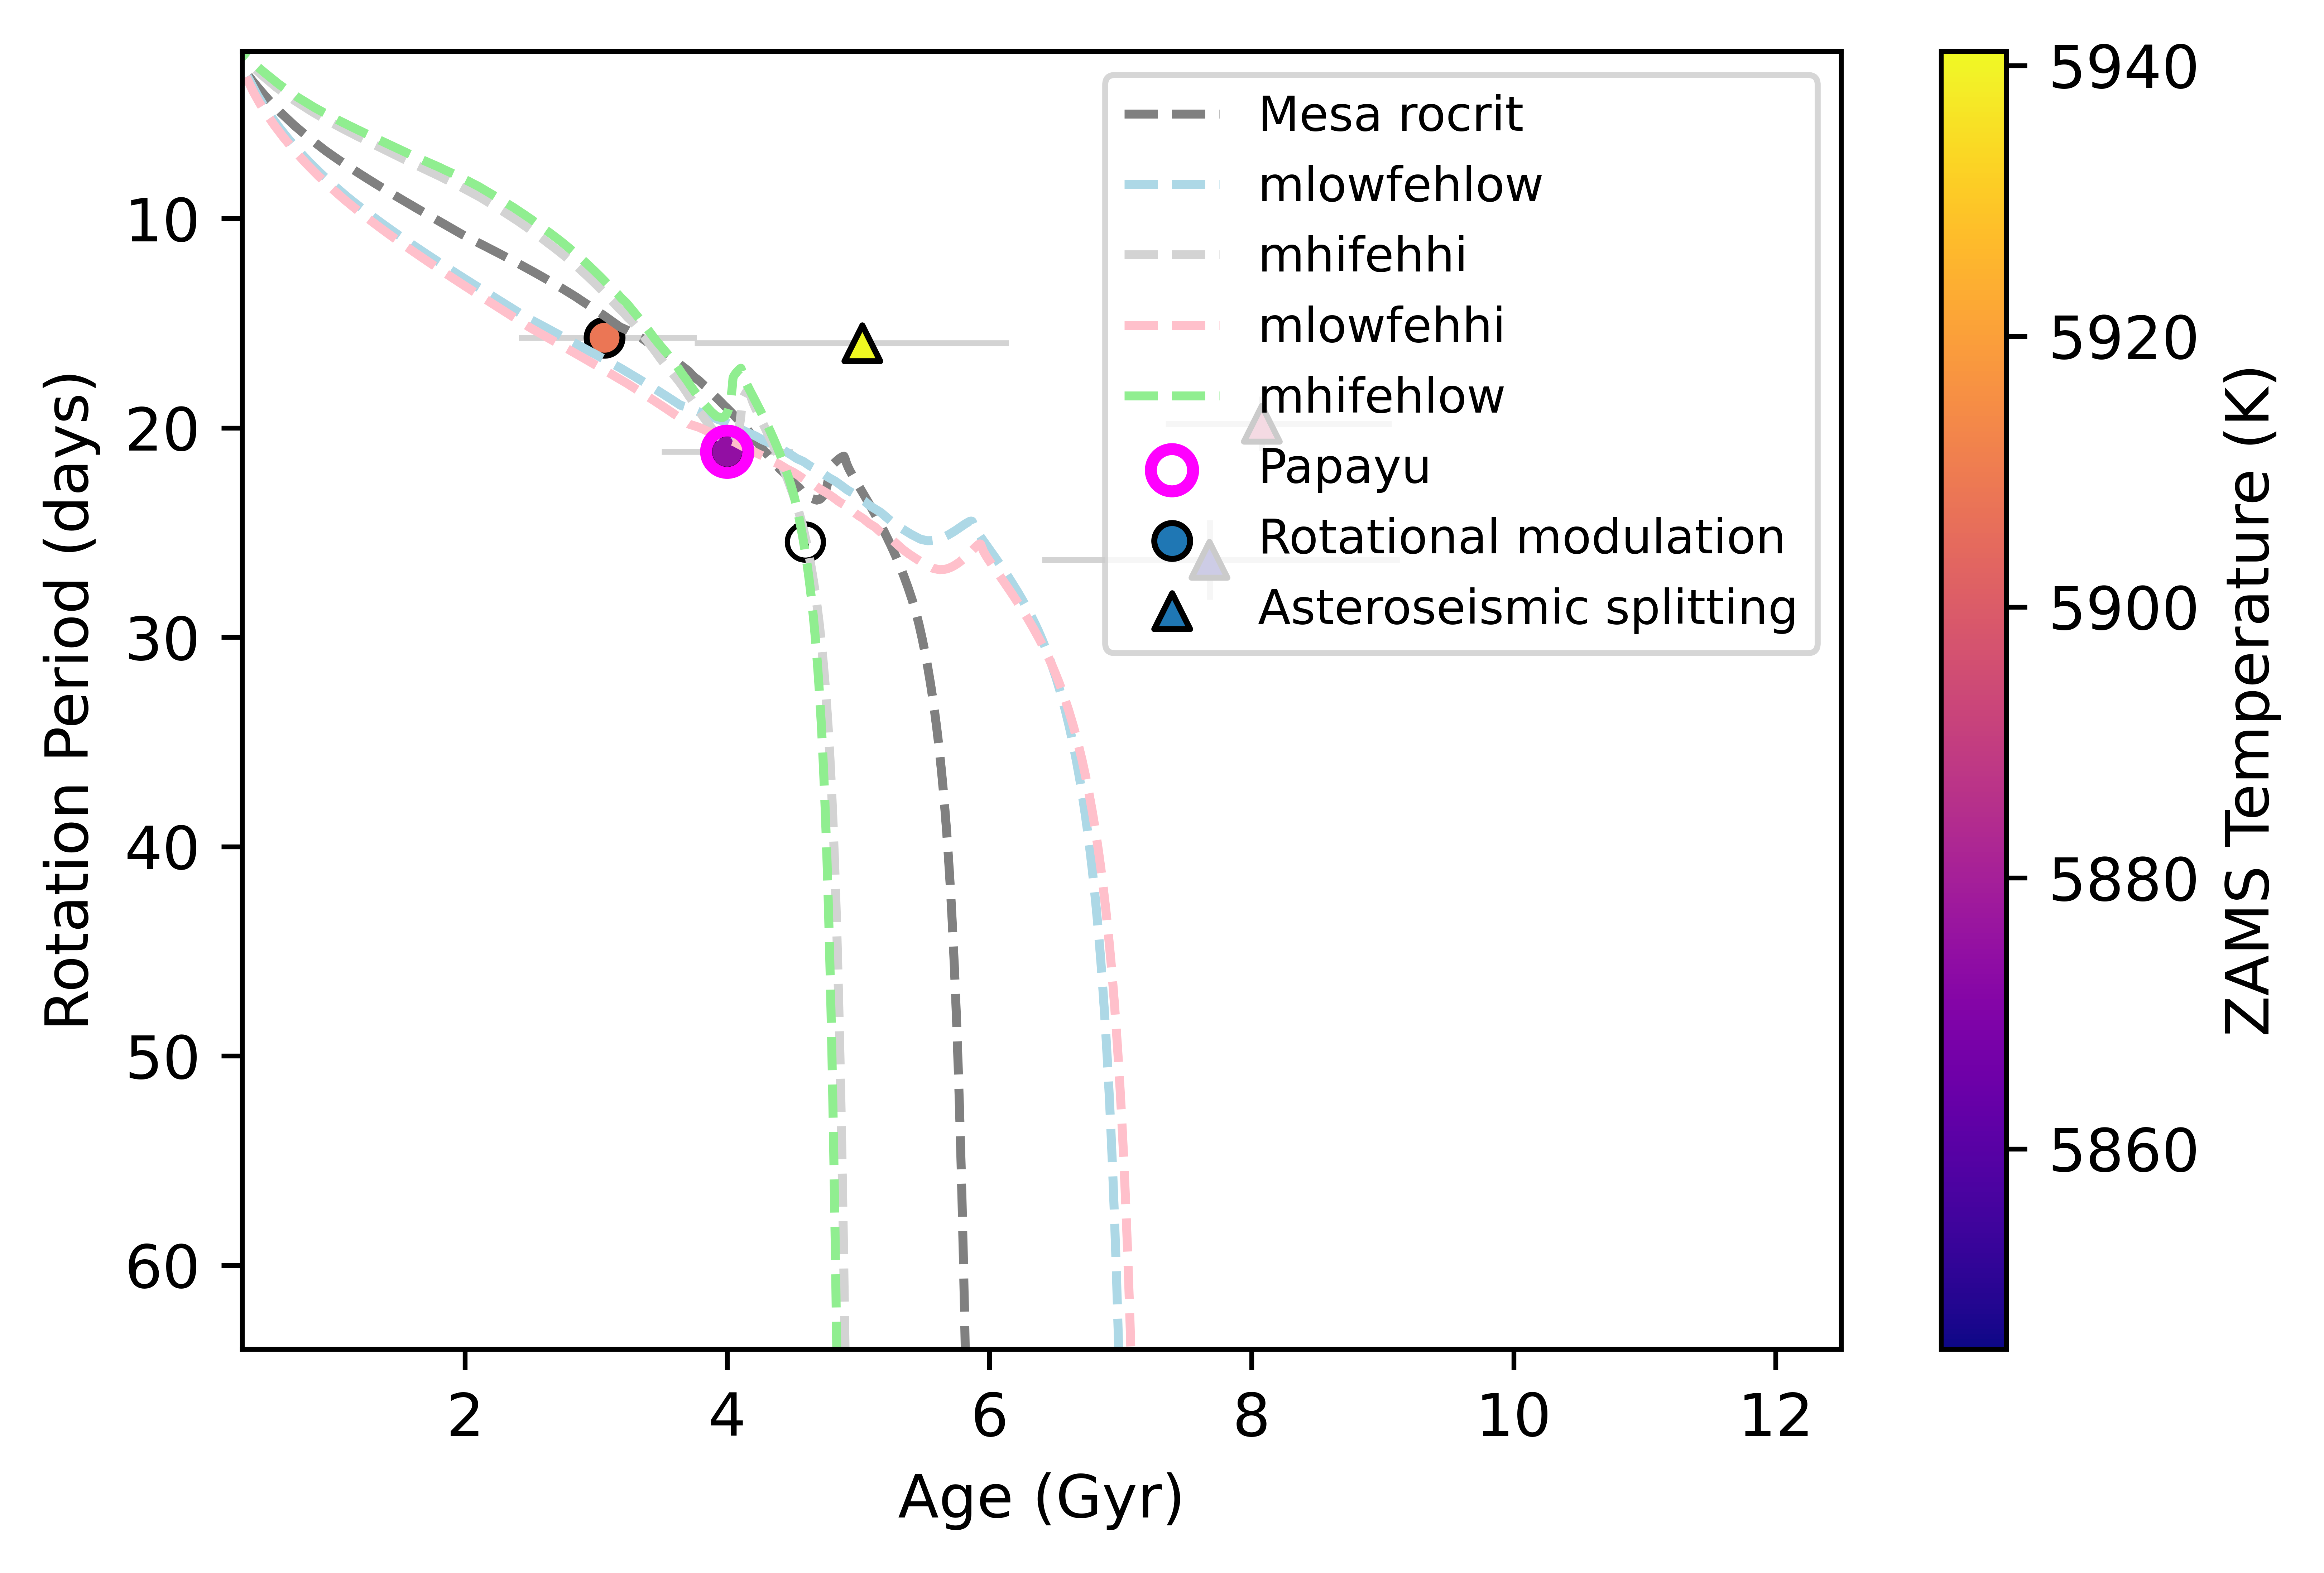

In [82]:
# Mass = 1.23 +- 0.01  (mesa)
# FeH = 0.32 +- 0.01 
## decided 5% unc : +- 0.0615 for mass, 0.016 for metallicity
track_rocrit_p_mesa = grid_rocrit.get_track((1.23, 0.32, 0))
track_rocrit_p_mesamasslowfehlow = grid_rocrit.get_track((1.23-0.0615, 0.32-0.016, 0)) 
track_rocrit_p_mesamasshifehlow = grid_rocrit.get_track((1.23+0.0615, 0.32-0.016, 0)) 
track_rocrit_p_mesamasslowfehhi = grid_rocrit.get_track((1.23-0.0615, 0.32+0.016, 0)) 
track_rocrit_p_mesamasshifehhi = grid_rocrit.get_track((1.23+0.0615, 0.32+0.016, 0)) 

# ax.plot(x, y_est, '-')
# ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

################### PLOT 

zs = np.concatenate([mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff], axis=0)#,[5746.416542263336]], axis=0)
min_, max_ = zs.min(), zs.max()


# plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_papayu,c='lightgray',linestyle='dashed',label='Obs rocrit')
plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_p_mesa,c='gray',linestyle='dashed',label='Mesa rocrit')

plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_p_mesamasslowfehlow,c='lightblue',linestyle='dashed',label='mlowfehlow')
plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_p_mesamasshifehhi,c='lightgray',linestyle='dashed',label='mhifehhi')
plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_p_mesamasslowfehhi,c='pink',linestyle='dashed',label='mlowfehhi')
plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_p_mesamasshifehlow,c='lightgreen',linestyle='dashed',label='mhifehlow')



plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_teffzams,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
plt.clim(min_, max_)

plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenzamsteff_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenteff_koizamsteff,edgecolor='black',marker='o',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliteff_age,oliteff_prot,c=oliteff_zamsteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

# plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter([6.95],23.8,c=[5746.416542263336],edgecolor='black',marker='^',cmap='plasma')
# plt.clim(min_, max_)

plt.ylim([64,2])
plt.xlim([0.3,12.5])

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')

all_zamsteffteff = np.concatenate((mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff))#,[5746.416542263336]))
# all_zamsteffteff = np.concatenate((mcqagp_zams_teffteff,jen_zams_seismicteff,jen_zams_koiteff,oliteff_zams_teff,[5746.416542263336]))

print(all_zamsteffteff)
# print(len(mcqagp_zams_teffteff)+len(jen_zams_seismicteff)+len(jen_zams_koiteff)+len(oliteff_zams_teff)+1)

print(np.min(all_zamsteffteff))
print(np.max(all_zamsteffteff))
# print(np.mean(all_zamsteffteff))
plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_zamsteffteff),np.max(all_zamsteffteff))
cbar = plt.colorbar()
cbar.set_label('ZAMS Temperature (K)')

In [ ]:
# Mass = 1.23 +- 0.01  (mesa)
# FeH = 0.32 +- 0.01 
##Fastlaucnh

track_fastlaunch_p_mesa = grid_fastlaunch.get_track((1.23, 0.32, 0))
track_fastlaunch_p_mesamasslowfehlow = grid_fastlaunch.get_track((1.22, 0.31, 0)) 
track_fastlaunch_p_mesamasshifehlow = grid_fastlaunch.get_track((1.24, 0.31, 0)) 
track_fastlaunch_p_mesamasslowfehhi = grid_fastlaunch.get_track((1.22, 0.33, 0)) 
track_fastlaunch_p_mesamasshifehhi = grid_fastlaunch.get_track((1.24, 0.33, 0)) 

# ax.plot(x, y_est, '-')
# ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

################### PLOT 

zs = np.concatenate([mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff], axis=0)#,[5746.416542263336]], axis=0)
min_, max_ = zs.min(), zs.max()


# plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_papayu,c='lightgray',linestyle='dashed',label='Obs rocrit')
plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_p_mesa,c='gray',linestyle='dashed',label='Mesa rocrit')

plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_p_mesamasslowfehlow,c='lightblue',linestyle='dashed',label='mlowfehlow')
plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_p_mesamasshifehhi,c='lightgray',linestyle='dashed',label='mhifehhi')
plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_p_mesamasslowfehhi,c='pink',linestyle='dashed',label='mlowfehhi')
plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_p_mesamasshifehlow,c='lightgreen',linestyle='dashed',label='mhifehlow')



plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_teffzams,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')
plt.clim(min_, max_)

plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenzamsteff_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')
plt.clim(min_, max_)

plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenteff_koizamsteff,edgecolor='black',marker='o',cmap='plasma')
plt.clim(min_, max_)

plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliteff_age,oliteff_prot,c=oliteff_zamsteff,edgecolor='black',marker='^',cmap='plasma')
plt.clim(min_, max_)

# plt.errorbar([6.95],23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter([6.95],23.8,c=[5746.416542263336],edgecolor='black',marker='^',cmap='plasma')
# plt.clim(min_, max_)

plt.ylim([64,2])
plt.xlim([0.3,12.5])

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')

all_zamsteffteff = np.concatenate((mcqagp_teffzams, jenzamsteff_seismicteff,jenteff_koizamsteff,oliteff_zamsteff))#,[5746.416542263336]))
# all_zamsteffteff = np.concatenate((mcqagp_zams_teffteff,jen_zams_seismicteff,jen_zams_koiteff,oliteff_zams_teff,[5746.416542263336]))

print(all_zamsteffteff)
# print(len(mcqagp_zams_teffteff)+len(jen_zams_seismicteff)+len(jen_zams_koiteff)+len(oliteff_zams_teff)+1)

print(np.min(all_zamsteffteff))
print(np.max(all_zamsteffteff))
# print(np.mean(all_zamsteffteff))
plt.legend(loc="best",fontsize=8)
plt.clim(np.min(all_zamsteffteff),np.max(all_zamsteffteff))
cbar = plt.colorbar()
cbar.set_label('ZAMS Temperature (K)')

In [ ]:
# # plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# # plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
# plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

# plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_teffteff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

# plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenteff_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

# plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenteff_koiteff,edgecolor='black',marker='o',cmap='plasma')

# plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(oliteff_age,oliteff_prot,c=oliteff_teff,edgecolor='black',marker='^',cmap='plasma')

# plt.errorbar(jenlastage,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenlastage,jenlastprot,c=jenlastteff,edgecolor='black',marker='^',cmap='plasma')

# plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_sun,c='gray',linestyle='dashed',label='')
# plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_sun,c='lightgray',linestyle='dashed',label='')

# plt.ylim([64,2])
# plt.xlim([0.3,12.5])

# plt.xlabel('Age (Gyr)')
# plt.ylabel('Rotation Period (days)')

# all_teff_teff = np.concatenate((mcqagp_teffteff,jenteff_seismicteff,jenteff_koiteff,oliteff_teff,jenlastteff))

# plt.legend(loc="best",fontsize=8)
# plt.clim(np.min(all_teff_teff),np.max(all_teff_teff))
# cbar = plt.colorbar()
# cbar.set_label('Effective Temperature (K)')


# print(len(mcqagp_teffteff)+len(jenteff_seismicteff)+len(jenteff_koiteff)+len(oliteff_teff)+len(jenlastteff))


In [ ]:
# # plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# # plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
# plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=0,label='Papayu')

# plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_zams_teffteff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

# plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jen_zams_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

# plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koiteff,jenprot_koiteff,c=jen_zams_koiteff,edgecolor='black',marker='o',cmap='plasma')

# plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(oliteff_age,oliteff_prot,c=oliteff_zams_teff,edgecolor='black',marker='^',cmap='plasma')

# # a = np.array([5746.42])
# # plt.errorbar(6.95,23.8,xerr=0.26,yerr=1.7,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# # plt.scatter(6.95,23.8,color=a,edgecolor='black',marker='^',cmap='plasma')

# # plt.errorbar(6.95,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# # plt.scatter(6.95,jenlastprot,c=jen_last_zams_teff,edgecolor='black',marker='^',cmap='plasma')


# plt.plot('Age(Gyr)','Prot(days)', data=track_rocrit_blue,c='gray',linestyle='dashed',label='')
# plt.plot('Age(Gyr)','Prot(days)', data=track_fastlaunch_blue,c='lightgray',linestyle='dashed',label='')

# plt.ylim([64,2])
# plt.xlim([0.3,12.5])

# plt.xlabel('Age (Gyr)')
# plt.ylabel('Rotation Period (days)')

# all_teff_teff = np.concatenate((mcqagp_teffteff,jenteff_seismicteff,jenteff_koiteff,oliteff_teff,jenlastteff))
# all_zams_teffteff = np.concatenate((mcqagp_zams_teffteff,jen_zams_seismicteff,jen_zams_koiteff,oliteff_zams_teff))

# plt.legend(loc="best",fontsize=8)

# print(jenprot_koiteff)
# # print(jen_zams_koiteff)

# print(all_zams_teffteff)
# print(np.min(all_zams_teffteff))
# print(np.max(all_zams_teffteff))
# # plt.clim(np.min(all_zams_teffteff),np.max(all_zams_teffteff))

# cbar = plt.colorbar()
# cbar.set_label('ZAMS Temperature (K)')
# cbar.set_clim(np.min(all_zams_teffteff),np.max(all_zams_teffteff))

# print(len(mcqagp_teffteff)+len(jenteff_seismicteff)+len(jenteff_koiteff)+len(oliteff_teff)+1)

# # print(jenlastteff)
# ## check the track for the 18day one 

# # plt.scatter(7.10,17.2)

In [ ]:
jenmass_basta = np.array([1.04,0.998,1.12,1.07,1.18,1.06,1.21,1.11,1.13,0.84,0.948,1.07,1.01,1.16,0.89,1.15,1.18,1.16,1.09,1.13,1.06])
jenzams_basta = np.array([5668,5592,6019,5525,5810,5943,5991,5886,5801,5240,5250,5630,5734,6019,5250,6095,5753,5991,6076,5677,6057])

jenmass_amp = np.array([1.10,1.06,1.13,1.17,1.27,1.01,1.23,1.04,1.13,0.84,1.04,1.19,1.00,1.14,0.96,1.19,1.16,1.13,1.07,1.10,1.03])
jenzams_amp = np.array([5677,5629,5985,5642,5905,5838,6064,5933,5801,5253,5165,5695,5718,6092,5307,6138,5943,6001,6063,6023,6094])
    
jenmet = np.array([0.09,0.05,-0.03,0.25,0.38,-0.24,0.17,0.02,0.11,-0.24,0.34,0.30,-0.13,0.11,0.08,-0.06,0.29,0.12,-0.20,0.35,-0.20])

# print(len(jenmass_basta))
# print(len(jenzams_basta))
# print(len(jenmass_amp))
# print(len(jenzams_amp))
# print(len(jenmet))

kiauhokujenzams_basta=[]
for i in range(len(jenmass_basta)):
    mass = jenmass_basta[i]
    metallicity = jenmet[i]
    jen_zams_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    jen_zams_i = 10**jen_zams_logi

    kiauhokujenzams_basta.append(jen_zams_i)
# print(kiauhokujenzams_basta)

kiauhokujenzams_amp=[]
for i in range(len(jenmass_amp)):
    mass = jenmass_amp[i]
    metallicity = jenmet[i]
    jen_zams_logi = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    jen_zams_i = 10**jen_zams_logi

    kiauhokujenzams_amp.append(jen_zams_i)
# print(kiauhokujenzams_amp)

plt.scatter(kiauhokujenzams_basta,jenzams_basta, marker='o',label='BASTA',c='orange')
plt.scatter(kiauhokujenzams_amp,jenzams_amp, marker='o',label='AMP',c='magenta')

x = range(5150,6350)
y = range(5150,6350)
plt.plot(x,y,linestyle='dashed',c='grey')
# plt.hlines(5801,5195,6350)
plt.xlabel('Kiauhoku-calculated ZAMS temp')
plt.ylabel('van Saders+ 2016, ZAMS temp')

plt.legend()

In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

plt.semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='gray',linestyle='dashed',label='')

print(track_rocrit_papayu)
print('track_rocrit_papayu.keys()',track_rocrit_papayu.keys())

zams_teff_log = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['Log Teff(K)'] 
zams_teff = 10**zams_teff_log
    
zams_radius = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['R/Rsun'] 
print('zams_radius',zams_radius)
# track_rocrit_papayu('Log Teff(K)')

# ints = eep_grid.eep_params["intervals"]
ints = track_rocrit_papayu.eep_params["intervals"]
print(ints)

indices = np.arange(1 + len(ints))
print(indices)

indices[1:] += np.cumsum(ints)
print(indices)

track_rocrit_papayu.iloc[indices]
# [  0 201 252 353 454 605]

pms = track_rocrit_papayu.loc[range(0,201)]
zams = track_rocrit_papayu.loc[range(201,252)]
eams = track_rocrit_papayu.loc[range(252,353)]
iams = track_rocrit_papayu.loc[range(353,454)]
tams = track_rocrit_papayu.loc[range(454,605)]
rgbump = track_rocrit_papayu.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

plt.semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

log10temperr = 100/(5888*np.log(10))
print('log10temperr',log10temperr)

plt.scatter(np.log10(5888),1.3,label='papayu')
plt.errorbar(np.log10(5888),1.3,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))

# plt.scatter(np.log10(5941.46454699),1.3)

plt.ylim([0.8,2])
plt.xlim([3.8,3.5])
plt.xlabel('Log Teff(K)')
plt.ylabel('Log R/Rsun')
plt.legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 

## KIAUHOKU age 

zams_age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['Age(Gyr)'] 

# [  0 201 252 353 454 605]
suneep_age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 330))['Age(Gyr)'] 

age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 370))['Age(Gyr)'] 


print('***************************************')

print('zams_age',zams_age)
print('suneep_age',suneep_age)
print('age',age)

print('***************************************')



In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

plt.semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='gray',linestyle='dashed',label='')

#print(track_rocrit_papayu)
print('track_rocrit_papayu.keys()',track_rocrit_papayu.keys())

zams_teff_log = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['Log Teff(K)'] 
#zams_teff = 10**zams_teff_log
    
zams_radius = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['R/Rsun'] 
#print('zams_radius',zams_radius)
# track_rocrit_papayu('Log Teff(K)')


prot = track_rocrit_papayu['Prot(days)']
plt.scatter('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c=np.log10(prot),cmap='plasma')
plt.yscale('log')
# plt.clim(np.min(all_zamsteffteff),np.max(all_zamsteffteff))
cbar = plt.colorbar()


# for i in range(len(prot)):
#     if prot[i]<1500:
#         continue
# #     if prot[i]>1500:
# #         continue
#     print(prot[i])
#     print(i)
    
#loc = 276 till 10 
# 376 20
#456 30
#468 40
#479 50 
#488 60 
#496 70 
#503 80 
# 509 90 
# 514 100
# 522 120 
#529 150
#542 250
#558 500 
# 589 1500 
# 605 2500

# to10 = track_rocrit_papayu['Prot(days)'].loc[range(0,276)]
# # to20 = track_rocrit_papayu['Prot(days)'].loc[range(276,376)]
# # to30 = track_rocrit_papayu['Prot(days)'].loc[range(376,456)]
# # to40 = track_rocrit_papayu['Prot(days)'].loc[range(456,468)]
# # to50 = track_rocrit_papayu['Prot(days)'].loc[range(468,479)]
# # to60 = track_rocrit_papayu['Prot(days)'].loc[range(479,488)]


# plt.semilogy('Log Teff(K)','R/Rsun', data=to10,c='violet',label='to10')
# plt.semilogy('Log Teff(K)','R/Rsun', data=to20,c='b',label='to20')
# plt.semilogy('Log Teff(K)','R/Rsun', data=to30,c='springgreen',label='to30')
# plt.semilogy('Log Teff(K)','R/Rsun', data=to40,c='green',label='to40')
# plt.semilogy('Log Teff(K)','R/Rsun', data=to50,c='pink',label='to50')
# plt.semilogy('Log Teff(K)','R/Rsun', data=to60,c='r',label='to60')












# # ints = eep_grid.eep_params["intervals"]
# ints = track_rocrit_papayu.eep_params["intervals"]
# print(ints)

# indices = np.arange(1 + len(ints))
# print(indices)

# indices[1:] += np.cumsum(ints)
# print(indices)

# track_rocrit_papayu.iloc[indices]
# # [  0 201 252 353 454 605]

# pms = track_rocrit_papayu.loc[range(0,201)]
# zams = track_rocrit_papayu.loc[range(201,252)]
# eams = track_rocrit_papayu.loc[range(252,353)]
# iams = track_rocrit_papayu.loc[range(353,454)]
# tams = track_rocrit_papayu.loc[range(454,605)]
# rgbump = track_rocrit_papayu.iloc[605]

# # print(rgbump)
# # print(np.dtype(track_rocrit_papayu))

# plt.semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
# plt.semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
# plt.semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
# plt.semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
# plt.semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
# plt.semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

log10temperr = 100/(5888*np.log(10))
print('log10temperr',log10temperr)

plt.scatter(np.log10(5888),1.3,label='papayu')
plt.errorbar(np.log10(5888),1.3,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))

# plt.scatter(np.log10(5941.46454699),1.3)

plt.ylim([0.8,2])
plt.xlim([3.8,3.5])
plt.xlabel('Log Teff(K)')
plt.ylabel('Log R/Rsun')
plt.legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 

## KIAUHOKU age 

zams_age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['Age(Gyr)'] 

# [  0 201 252 353 454 605]
suneep_age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 330))['Age(Gyr)'] 

age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 370))['Age(Gyr)'] 


print('***************************************')

print('zams_age',zams_age)
print('suneep_age',suneep_age)
print('age',age)

print('***************************************')



In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

plt.semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='gray',linestyle='dashed',label='')

print(track_rocrit_papayu)
print('track_rocrit_papayu.keys()',track_rocrit_papayu.keys())

zams_teff_log = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['Log Teff(K)'] 
zams_teff = 10**zams_teff_log
    
zams_radius = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['R/Rsun'] 
print('zams_radius',zams_radius)
# track_rocrit_papayu('Log Teff(K)')

# ints = eep_grid.eep_params["intervals"]
ints = track_rocrit_papayu.eep_params["intervals"]
print(ints)

indices = np.arange(1 + len(ints))
print(indices)

indices[1:] += np.cumsum(ints)
print(indices)

track_rocrit_papayu.iloc[indices]
# [  0 201 252 353 454 605]

print('Prot(days)',prot)

pms = track_rocrit_papayu.loc[range(0,201)]
zams = track_rocrit_papayu.loc[range(201,252)]
eams = track_rocrit_papayu.loc[range(252,353)]
iams = track_rocrit_papayu.loc[range(353,454)]
tams = track_rocrit_papayu.loc[range(454,605)]
rgbump = track_rocrit_papayu.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

plt.semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

log10temperr = 100/(5888*np.log(10))
print('log10temperr',log10temperr)

plt.scatter(np.log10(5888),1.3,label='papayu')
plt.errorbar(np.log10(5888),1.3,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))

# plt.scatter(np.log10(5941.46454699),1.3)

plt.ylim([0.8,2])
plt.xlim([3.8,3.5])
plt.xlabel('Log Teff(K)')
plt.ylabel('Log R/Rsun')
plt.legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 

## KIAUHOKU age 

zams_age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 201))['Age(Gyr)'] 

# [  0 201 252 353 454 605]
suneep_age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 330))['Age(Gyr)'] 

age = grid_rocrit.get_star_eep((papayu_mass,papayu_feh,0, 370))['Age(Gyr)'] 


print('***************************************')

print('zams_age',zams_age)
print('suneep_age',suneep_age)
print('age',age)

print('***************************************')



In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

plt.semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_sun,c='gray',linestyle='dashed',label='')

print(track_rocrit_sun)
print('track_rocrit_sun.keys()',track_rocrit_sun.keys())

zams_teff_log = grid_rocrit.get_star_eep((1,0,0, 201))['Log Teff(K)'] 
zams_teff = 10**zams_teff_log
    
zams_radius = grid_rocrit.get_star_eep((1,0,0, 201))['R/Rsun'] 
print('zams_radius',zams_radius)

# track_rocrit_papayu('Log Teff(K)')

# ints = eep_grid.eep_params["intervals"]
ints = track_rocrit_sun.eep_params["intervals"]
print(ints)

indices = np.arange(1 + len(ints))
print(indices)

indices[1:] += np.cumsum(ints)
print(indices)

track_rocrit_sun.iloc[indices]
# [  0 201 252 353 454 605]

pms = track_rocrit_sun.loc[range(0,201)]
zams = track_rocrit_sun.loc[range(201,252)]
eams = track_rocrit_sun.loc[range(252,353)]
iams = track_rocrit_sun.loc[range(353,454)]
tams = track_rocrit_sun.loc[range(454,605)]
rgbump = track_rocrit_sun.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

plt.semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
plt.semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

print('sun_teff',sun_teff)
log10temperr = 100/(sun_teff*np.log(10))
print('log10temperr',log10temperr)

plt.scatter(np.log10(sun_teff),1,label='Sun')
plt.errorbar(np.log10(sun_teff),1,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))
# plt.scatter(np.log10(5941.46454699),1.3)

plt.ylim([0.8,2])
plt.xlim([3.8,3.5])
plt.xlabel('Log Teff(K)')
plt.ylabel('Log R/Rsun')
plt.legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 


In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

print(mcqagp_teffteff)
print('mcqagp_teffzams',mcqagp_teffzams)

fig, axes = plt.subplots(len(mcqagp_massteff)+1, 1, figsize = (10, 20))

for i in range(len(mcqagp_massteff)):
    print('***************************************************')
    print('i = ',i)
    
    mass = mcqagp_massteff[i]
    print('mass',mass)
    
    radius = grid_rocrit.get_star_eep((mass,metallicity,0, 330))['R/Rsun'] 
    print('radius',radius)
    
    teff = mcqagp_teffteff[i]
    print('teff',teff)
    
    metallicity = mcqagp_fehteff[i]
    print('feh',metallicity)

    
    track_rocrit_star = grid_rocrit.get_track((mass, metallicity, 0)) #2.0 in mass, and 0.5 in metallicity 
    
    zams_teff_log = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    zams_teff = 10**zams_teff_log
    print('zams_teff',zams_teff)
    
    zams_radius = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['R/Rsun'] 
    print('zams_radius',zams_radius)

    axes[i].semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_star,c='gray',linestyle='dashed',label='')

#     print(track_rocrit_star)
#     print('track_rocrit_star.keys()',track_rocrit_star.keys())


    ints = track_rocrit_star.eep_params["intervals"]
#     print(ints)

    indices = np.arange(1 + len(ints))
#     print(indices)

    indices[1:] += np.cumsum(ints)
#     print(indices)

    track_rocrit_star.iloc[indices]
# [  0 201 252 353 454 605]

    pms = track_rocrit_star.loc[range(0,201)]
    zams = track_rocrit_star.loc[range(201,252)]
    eams = track_rocrit_star.loc[range(252,353)]
    iams = track_rocrit_star.loc[range(353,454)]
    tams = track_rocrit_star.loc[range(454,605)]
    rgbump = track_rocrit_star.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

    axes[i].semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

    log10temperr = 100/(teff*np.log(10))
#     print('log10temperr',log10temperr)

    axes[i].scatter(np.log10(teff),radius,label=str([radius,teff]))
    axes[i].errorbar(np.log10(teff),radius,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)

    axes[i].scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))
# plt.scatter(np.log10(5941.46454699),1.3)

    axes[i].set_ylim([0.8,2])
    axes[i].set_xlim([3.8,3.5])
    axes[i].set_xlabel('Log Teff(K)')
    axes[i].set_ylabel('Log R/Rsun')
    axes[i].legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 

In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

print(jenteff_koiteff)
print('jenteff_koizamsteff',jenteff_koizamsteff)

fig, axes = plt.subplots(len(jenmass_koiteff)+1, 1, figsize = (10, 20))

for i in range(len(jenmass_koiteff)):
    print('***************************************************')
    print('i = ',i)
    
    mass = jenmass_koiteff[i]
    print('mass',mass)
    
    metallicity = jenfeh_koiteff[i]
    print('feh',metallicity)
    
    radius = grid_rocrit.get_star_eep((mass,metallicity,0, 330))['R/Rsun'] 
    print('radius',radius)
    
    teff = jenteff_koiteff[i]
    print('teff',teff)
    
#     eteff = jeneteff_koiteff[i]
#     print('eteff',eteff)
    
    track_rocrit_star = grid_rocrit.get_track((mass, metallicity, 0)) #2.0 in mass, and 0.5 in metallicity 
    
    zams_teff_log = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    zams_teff = 10**zams_teff_log
    print('zams_teff',zams_teff)

    
    zams_radius = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['R/Rsun'] 
    print('zams_radius',zams_radius)
    
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_star,c='gray',linestyle='dashed',label='')

#     print(track_rocrit_star)
#     print('track_rocrit_star.keys()',track_rocrit_star.keys())


    ints = track_rocrit_star.eep_params["intervals"]
#     print(ints)

    indices = np.arange(1 + len(ints))
#     print(indices)

    indices[1:] += np.cumsum(ints)
#     print(indices)

    track_rocrit_star.iloc[indices]
# [  0 201 252 353 454 605]

    pms = track_rocrit_star.loc[range(0,201)]
    zams = track_rocrit_star.loc[range(201,252)]
    eams = track_rocrit_star.loc[range(252,353)]
    iams = track_rocrit_star.loc[range(353,454)]
    tams = track_rocrit_star.loc[range(454,605)]
    rgbump = track_rocrit_star.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

    axes[i].semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

    log10temperr = 100/(teff*np.log(10))
#     print('log10temperr',log10temperr)

    axes[i].scatter(np.log10(teff),radius,label=str([radius,teff]))
    axes[i].errorbar(np.log10(teff),radius,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)

    axes[i].scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))
# plt.scatter(np.log10(5941.46454699),1.3)

    axes[i].set_ylim([0.8,2])
    axes[i].set_xlim([3.8,3.5])
    axes[i].set_xlabel('Log Teff(K)')
    axes[i].set_ylabel('Log R/Rsun')
    axes[i].legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 

In [ ]:
#### plot of Temp (x) and Luminiosity 
## make a track for papayu 
## 

# Age(Gyr)         2.646725e+00
# L/Lsun           1.940489e+00
# R/Rsun           1.266018e+00
# Log Teff(K)      3.780813e+00

print(oliteff_teff)
print('oli_zamsteff',oliteff_zamsteff)

fig, axes = plt.subplots(len(oliteff_zamsteff)+1, 1, figsize = (10, 20))


for i in range(len(oliteff_mass)):
    print('***************************************************')
    print('i = ',i)
    
    mass = oliteff_mass[i]
    print('mass',mass)
    
    radius = grid_rocrit.get_star_eep((mass,metallicity,0, 330))['R/Rsun'] 
    print('radius',radius)
    
    teff = oliteff_teff[i]
    print('teff',teff)
    
    eteff = 100
    print('eteff',eteff)
    
    metallicity = oliteff_feh[i]
    print('feh',metallicity)
    
    track_rocrit_star = grid_rocrit.get_track((mass, metallicity, 0)) #2.0 in mass, and 0.5 in metallicity 
    
    zams_teff_log = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    zams_teff = 10**zams_teff_log
    print('zams_teff',zams_teff)

    
    zams_radius = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['R/Rsun'] 
    print('zams_radius',zams_radius)
    
    
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_star,c='gray',linestyle='dashed',label='')

#     print(track_rocrit_star)
#     print('track_rocrit_star.keys()',track_rocrit_star.keys())


    ints = track_rocrit_star.eep_params["intervals"]
#     print(ints)

    indices = np.arange(1 + len(ints))
#     print(indices)

    indices[1:] += np.cumsum(ints)
#     print(indices)

    track_rocrit_star.iloc[indices]
# [  0 201 252 353 454 605]

    pms = track_rocrit_star.loc[range(0,201)]
    zams = track_rocrit_star.loc[range(201,252)]
    eams = track_rocrit_star.loc[range(252,353)]
    iams = track_rocrit_star.loc[range(353,454)]
    tams = track_rocrit_star.loc[range(454,605)]
    rgbump = track_rocrit_star.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

    axes[i].semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

    log10temperr = eteff/(teff*np.log(10))
#     print('log10temperr',log10temperr)

    axes[i].scatter(np.log10(teff),radius,label=str([radius,teff]))
    axes[i].errorbar(np.log10(teff),radius,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)

    axes[i].scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))

# plt.scatter(np.log10(5941.46454699),1.3)

    axes[i].set_ylim([0.8,2])
    axes[i].set_xlim([3.9,3.5])
    axes[i].set_xlabel('Log Teff(K)')
    axes[i].set_ylabel('Log R/Rsun')
    axes[i].legend()

## highlight ZAMS, 
## solar mass nad metallicity model 
## highligh which models are PMS, ZAMS, MS, SUBgiant etc. 

In [ ]:
# (jenteff_seismicteff)
# print('jenzamsteff_seismicteff=',jenzamsteff_seismicteff)

print(jenteff_seismicteff)
print('jenzamsteff_seismicteff',jenzamsteff_seismicteff)

fig, axes = plt.subplots(len(jenzamsteff_seismicteff)+1, 1, figsize = (10, 20))

for i in range(len(jenmass_seismicteff)):
    print('***************************************************')
    print('i = ',i)
    
    mass = jenmass_seismicteff[i]
    print('mass',mass)
    
    metallicity = jenfeh_seismicteff[i]
    print('feh',metallicity)
    
    radius = grid_rocrit.get_star_eep((mass,metallicity,0, 330))['R/Rsun'] 
    print('radius',radius)
    
    teff = jenteff_seismicteff[i]
    print('teff',teff)
    
#     eteff = jeneteff_koiteff[i]
#     print('eteff',eteff)
    
    
    track_rocrit_star = grid_rocrit.get_track((mass, metallicity, 0)) #2.0 in mass, and 0.5 in metallicity 
    
    zams_teff_log = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['Log Teff(K)'] 
    zams_teff = 10**zams_teff_log
    print('zams_teff',zams_teff)

    
    zams_radius = grid_rocrit.get_star_eep((mass,metallicity,0, 201))['R/Rsun'] 
    print('zams_radius',zams_radius)
    
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=track_rocrit_star,c='gray',linestyle='dashed',label='')

#     print(track_rocrit_star)
#     print('track_rocrit_star.keys()',track_rocrit_star.keys())


    ints = track_rocrit_star.eep_params["intervals"]
#     print(ints)

    indices = np.arange(1 + len(ints))
#     print(indices)

    indices[1:] += np.cumsum(ints)
#     print(indices)

    track_rocrit_star.iloc[indices]
# [  0 201 252 353 454 605]

    pms = track_rocrit_star.loc[range(0,201)]
    zams = track_rocrit_star.loc[range(201,252)]
    eams = track_rocrit_star.loc[range(252,353)]
    iams = track_rocrit_star.loc[range(353,454)]
    tams = track_rocrit_star.loc[range(454,605)]
    rgbump = track_rocrit_star.iloc[605]

# print(rgbump)
# print(np.dtype(track_rocrit_papayu))

    axes[i].semilogy('Log Teff(K)','R/Rsun', data=pms,c='violet',label='PMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=zams,c='b',label='ZAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=eams,c='springgreen',label='EAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=iams,c='green',label='IAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=tams,c='pink',label='TAMS')
    axes[i].semilogy('Log Teff(K)','R/Rsun', data=rgbump,c='r',label='RGB bump')

# plt.plot('Log Teff(K)','R/Rsun', data=track_rocrit_papayu,c='black',linestyle='dashed',label='')
# print(np.log10(100))

    log10temperr = 100/(teff*np.log(10))
#     print('log10temperr',log10temperr)

    axes[i].scatter(np.log10(teff),radius,label=str([radius,teff]))
    axes[i].errorbar(np.log10(teff),radius,xerr=log10temperr,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)

    axes[i].scatter(np.log10(zams_teff),zams_radius,label=str([zams_radius,zams_teff]))
# plt.scatter(np.log10(5941.46454699),1.3)

    axes[i].set_ylim([0.8,2])
    axes[i].set_xlim([3.8,3.5])
    axes[i].set_xlabel('Log Teff(K)')
    axes[i].set_ylabel('Log R/Rsun')
    axes[i].legend()